<a href="https://colab.research.google.com/github/Rafagars/Eurovision-Score-Data-Analysis/blob/main/Eurovision_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Datos de los Puntajes del concurso Eurovision en el periodo 2016 - 2024

## Resumen

Este analisis explora los resultados del Festival Eurovision desde 2016 hasta 2024, enfoncandose en la relacion entre la puntacion del jurado y la del televoto, y su impacto en la puntuacion total. Examinando datos historicos, se busca identificar patrones y tendencias en el comportamiento de los votos y evaluar el poder predictivo de las puntuaciones del jurado y del televoto en el resultado final. Utilizaremos disversas tecnicas de analisis de datos, incluyendo estadistica descriptiva, modelos de regresion y metodos de reduccion de dimensionalidad como MDS y t-SNE, para obtener informacion sobre los factores que contribuyen al exito en esta competicion musical internacional. Los hallazgos de este analisis pueden arrojar luz sobre la dinamica cambiante del sistema de votacion de Eurovision y potencialmente ofrecer predicciones sobre los resultados de futuros concursos

## Abstract

This analysis explores the results of the Eurovision Song Contest from 2016 to 2024, focusing on the interplay between jury and televoting scores and their impact on the total scores. By examining historical data, we aim to identify trends and patterns in voting behavior and assess the predictive power of jury and televoting scores on the final outcome. We will utilize various data analysis and visualization techniques, including summary statistics, regression models, and dimensionality reduction methods like MDS and t-SNE, to gain insights into the factors that contribute to success in this international music competition. The findings from this analysis can shed light on the evolving dynamics of the Eurovision voting system and potentially offer predictive insights into future contest outcomes.

In [1]:
#@title Cargamos nuestros datos
urls <- character()
for (i in 16:24) {
  if (i != 20) {
    urls <- c(urls, paste0('https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/20', i, '_jury_results.csv'))
  }
}

print(urls)

[1] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2016_jury_results.csv"
[2] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2017_jury_results.csv"
[3] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2018_jury_results.csv"
[4] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2019_jury_results.csv"
[5] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2021_jury_results.csv"
[6] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2022_jury_results.csv"
[7] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2023_jury_results.csv"
[8] "https://raw.githubusercontent.com/Rafagars/Eurovision-Score-Data-Analysis/refs/heads/main/data/2024_jury_results.csv"


In [2]:
data_list <- list()

for (i in 1:length(urls)) {
  data_list[[i]] <- read.csv(urls[i], header = TRUE)
}

In [3]:
for (i in 1:length(data_list)) {
  if (i < 5){
    year <- paste0('20', 15 + i)
  } else {
    year <- paste0('20', 16 + i)
  }
  data_list[[i]]$Year <- as.factor(year)
}

## Cargamos las librerias y combinamos las puntuaciones de cada año


In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)


combined_data <- bind_rows(data_list)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
combined_data <- combined_data %>%
  arrange(Year)

head(combined_data)

Contestant     Total.score Jury.score Televoting.score Austria Iceland
1 Belgium        181         130        51                5       3     
2 Czech Republic  41          41         0                4       5     
3 Netherlands    153         114        39               NA      12     
4 Azerbaijan     117          44        73               NA      NA     
5 Hungary        108          52        56               NA      NA     
6 Italy          124          90        34               NA      NA     
  Azerbaijan San.Marino Czech.Republic Ireland ⋯ Poland Slovenia Hungary
1 NA         NA          2             12      ⋯ NA      8       NA     
2 NA         NA         NA              2      ⋯  4     NA        2     
3 NA          4          7              8      ⋯ NA      1        6     
4 NA         NA         NA             NA      ⋯ NA     NA        7     
5  4          2         10             NA      ⋯ NA      3       NA     
6 NA         10         NA              6      ⋯ NA     NA       NA     
  Montenegro Sweden Year Portugal Romania North.Macedonia Czechia
1  3         NA     2016 NA       NA      NA              NA     
2 NA          3     2016 NA       NA      NA              NA     
3 NA          5     2016 NA       NA      NA              NA     
4 NA         10     2016 NA       NA      NA              NA     
5  7         NA     2016 NA       NA      NA              NA     
6 NA         NA     2016 NA       NA      NA              NA

In [ ]:
#@title Nos interesa principalmente el Año, Concursante, Puntaje Total, Puntaje Jurado y Puntaje por Televoto
df <- subset(combined_data, select = c('Year', 'Contestant', 'Total.score', 'Jury.score', 'Televoting.score'))


In [ ]:
#@title Data Frame con los puntajes de cada año
df <- df[rev(order(df$Year, df$Total.score)), ]
df

Year Contestant     Total.score Jury.score Televoting.score
182 2024 Switzerland    591         365        226             
183 2024 Croatia        547         210        337             
184 2024 Ukraine        453         146        307             
185 2024 France         445         218        227             
186 2024 Israel         375          52        323             
187 2024 Ireland        278         142        136             
188 2024 Italy          268         164        104             
189 2024 Armenia        183         101         82             
190 2024 Sweden         174         125         49             
191 2024 Portugal       152         139         13             
192 2024 Greece         126          41         85             
193 2024 Germany        117          99         18             
194 2024 Luxembourg     103          83         20             
195 2024 Lithuania       90          32         58             
196 2024 Cyprus          78          34         44             
197 2024 Latvia          64          36         28             
198 2024 Serbia          54          22         32             
199 2024 United Kingdom  46          46          0             
200 2024 Finland         38           7         31             
201 2024 Estonia         37           4         33             
202 2024 Georgia         34          15         19             
203 2024 Spain           30          19         11             
204 2024 Slovenia        27          15         12             
205 2024 Austria         24          19          5             
206 2024 Norway          16          12          4             
164 2023 Sweden         583         340        243             
168 2023 Finland        526         150        376             
178 2023 Israel         362         177        185             
166 2023 Italy          350         176        174             
175 2023 Norway         268          52        216             
⋮   ⋮    ⋮              ⋮           ⋮          ⋮               
27  2017 Israel          39          34          5             
48  2017 Ukraine         36          12         24             
47  2017 Germany          6           3          3             
42  2017 Spain            5           0          5             
21  2016 Ukraine        534         211        323             
13  2016 Australia      511         320        191             
18  2016 Russia         491         130        361             
8   2016 Bulgaria       307         127        180             
9   2016 Sweden         261         122        139             
11  2016 France         257         148        109             
26  2016 Armenia        249         115        134             
12  2016 Poland         229           7        222             
16  2016 Lithuania      200         104         96             
1   2016 Belgium        181         130         51             
22  2016 Malta          153         137         16             
3   2016 Netherlands    153         114         39             
24  2016 Austria        151          31        120             
7   2016 Israel         135         124         11             
20  2016 Latvia         132          69         63             
6   2016 Italy          124          90         34             
4   2016 Azerbaijan     117          44         73             
15  2016 Serbia         115          35         80             
5   2016 Hungary        108          52         56             
23  2016 Georgia        104          80         24             
14  2016 Cyprus          96          43         53             
19  2016 Spain           77          67         10             
17  2016 Croatia         73          40         33             
25  2016 United Kingdom  62          54          8             
2   2016 Czech Republic  41          41          0             
10  2016 Germany         11           1         10

In [ ]:
df_Total_score_by_year <- df[1:3] %>%
  pivot_wider(names_from = Year, values_from = Total.score)

In [ ]:
#@title Puntaje Total de cada pais por año
df_Total_score_by_year

Contestant      2024 2023 2022 2021 2019 2018 2017 2016
1  Switzerland     591   92   78  432  364   NA   NA   NA 
2  Croatia         547  123   NA   NA   NA   NA  128   73 
3  Ukraine         453  243  631  364   NA  130   36  534 
4  France          445  104   17  499  105  173  135  257 
5  Israel          375  362   NA   93   35  529   39  135 
6  Ireland         278   NA   NA   NA   NA  136   NA   NA 
7  Italy           268  350  268  524  472  308  334  124 
8  Armenia         183  122   61   NA   NA   NA   79  249 
9  Sweden          174  583  438  109  334  274  344  261 
10 Portugal        152   59  207  153   NA   39  758   NA 
11 Greece          126   NA  215  170   74   NA   77   NA 
12 Germany         117   18    6    3   24  340    6   11 
13 Luxembourg      103   NA   NA   NA   NA   NA   NA   NA 
14 Lithuania        90  127  128  220   NA  181   NA  200 
15 Cyprus           78  126   NA   94  109  436   68   96 
16 Latvia           64   NA   NA   NA   NA   NA   NA  132 
17 Serbia           54   30  312  102   89  113   NA  115 
18 United Kingdom   46   24  466    0   11   48  111   62 
19 Finland          38  526   38  301   NA   46   NA   NA 
20 Estonia          37  168  141   NA   76  245   NA   NA 
21 Georgia          34   NA   NA   NA   NA   NA   NA  104 
22 Spain            30  100  459    6   54   61    5   77 
23 Slovenia         27   78   NA   NA  105   64   NA   NA 
24 Austria          24  120   NA   NA   NA  342   93  151 
25 Norway           16  268  182   75  331  144  158   NA 
26 Belgium          NA  182   64   74   NA   NA  363  181 
27 Australia        NA  151  125   NA  284   99  173  511 
28 Czech Republic   NA  129   38   NA  157  281   NA   41 
29 Moldova          NA   96  253  115   NA  209  374   NA 
30 Poland           NA   93  151   NA   NA   NA   64  229 
31 Albania          NA   76   NA   57   90  184   NA   NA 
32 Netherlands      NA   NA  171   11  498  121  150  153 
33 Azerbaijan       NA   NA  106   65  302   NA  120  117 
34 Romania          NA   NA   65   NA   NA   NA  282   NA 
35 Iceland          NA   NA   20  378  232   NA   NA   NA 
36 Malta            NA   NA   NA  255  107   NA   NA  153 
37 Russia           NA   NA   NA  204  370   NA   NA  491 
38 Bulgaria         NA   NA   NA  170   NA  166  615  307 
39 San Marino       NA   NA   NA   50   77   NA   NA   NA 
40 North Macedonia  NA   NA   NA   NA  305   NA   NA   NA 
41 Denmark          NA   NA   NA   NA  120  226   77   NA 
42 Belarus          NA   NA   NA   NA   31   NA   83   NA 
43 Hungary          NA   NA   NA   NA   NA   93  200  108

## Graficos de Cajas de Puntaje Total de cada año

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


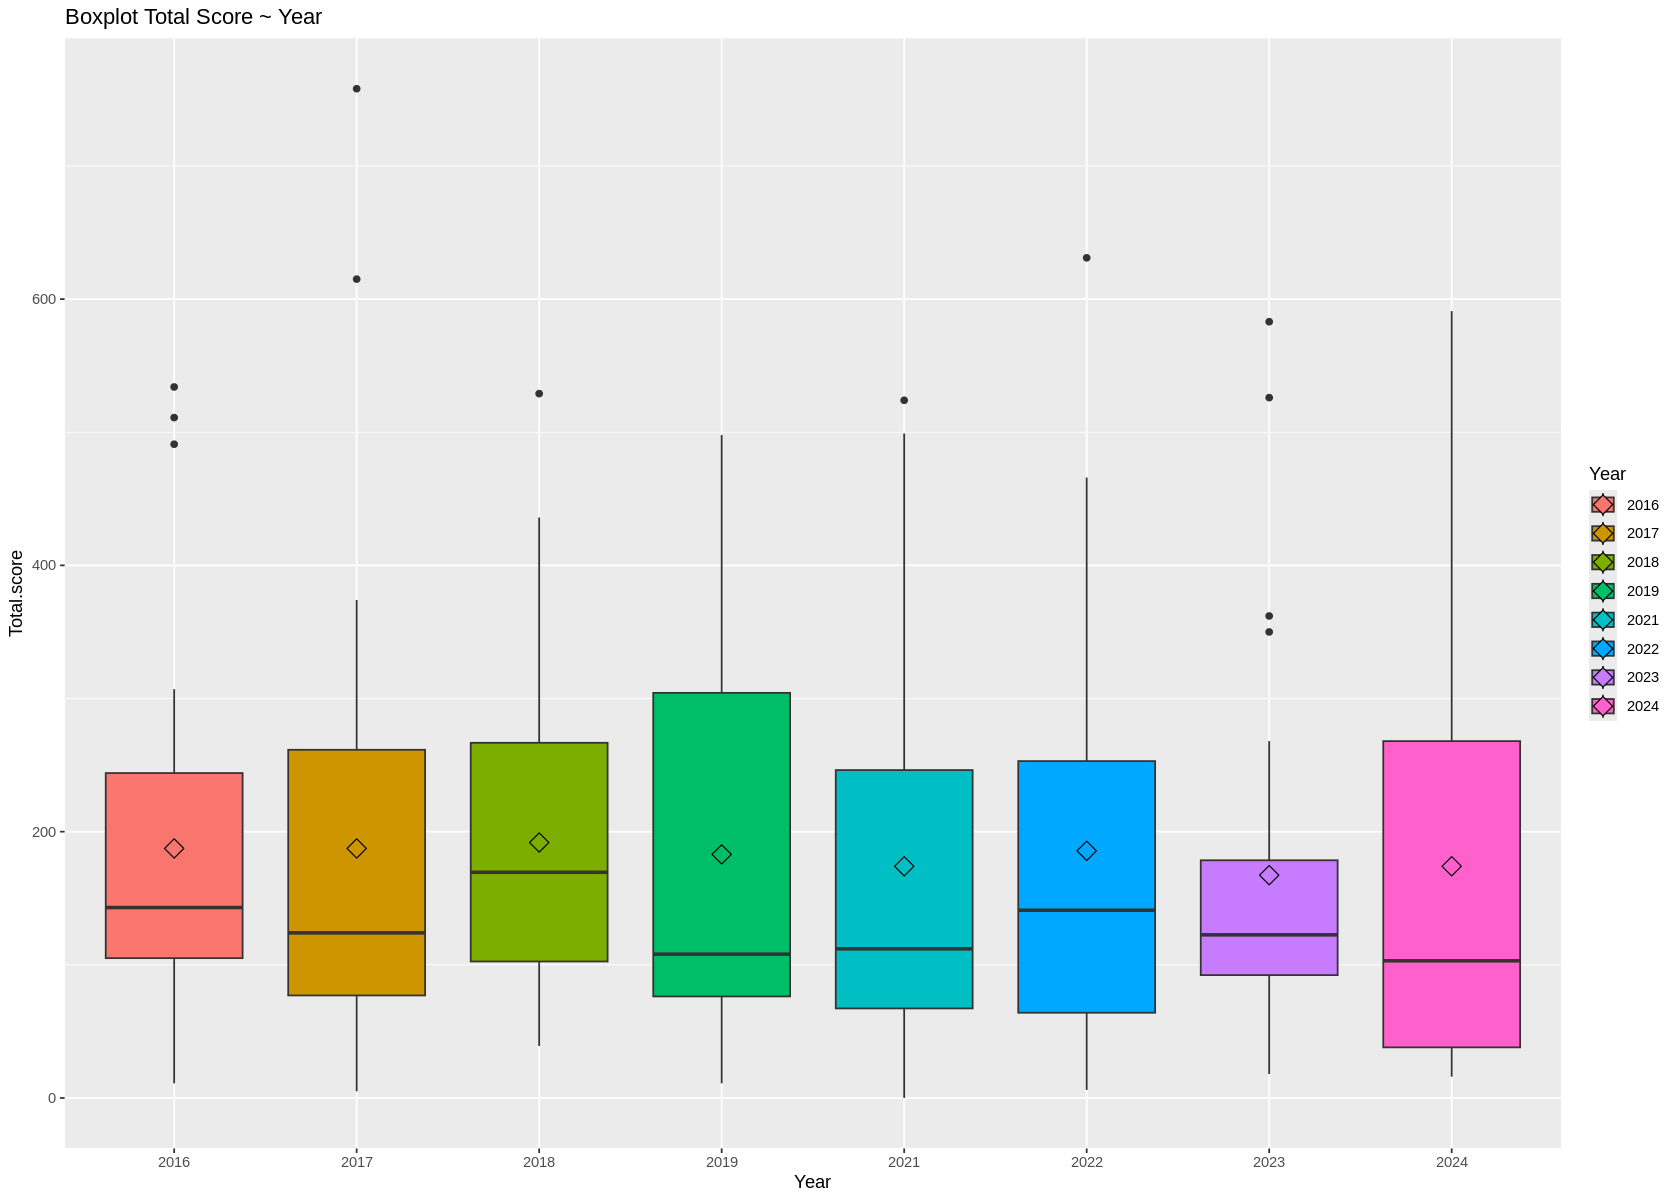

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10) # Sets width to 14 inches, height to 10 inches
ggplot(df, aes(x = Year, y = Total.score, fill=Year)) + geom_boxplot() + ggtitle("Boxplot Total Score ~ Year") + stat_summary(fun.y=mean, geom="point", shape=23, size=4)

La linea negra representa la mediana, los rombos representan la media

## Graficos de Cajas Puntaje Jurado por año

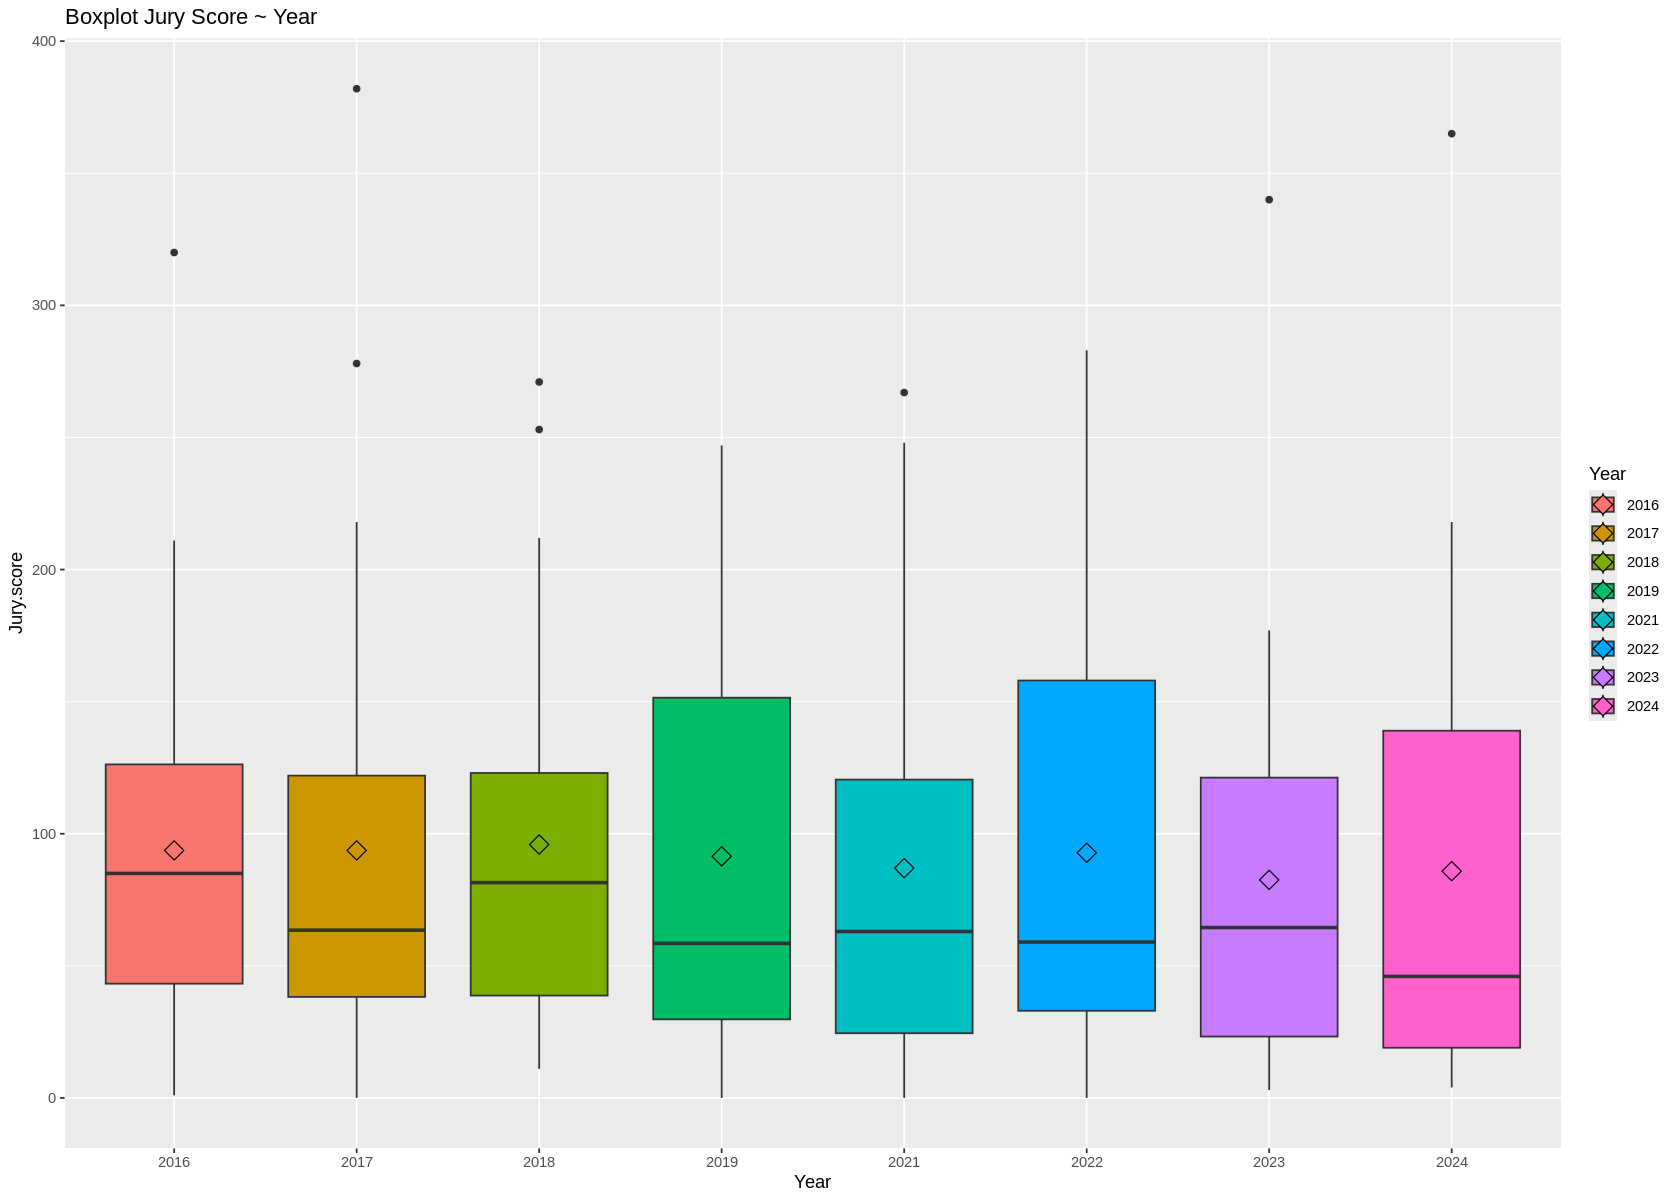

In [ ]:
ggplot(df, aes(x = Year, y = Jury.score, fill = Year)) + geom_boxplot() + ggtitle("Boxplot Jury Score ~ Year") + stat_summary(fun.y=mean, geom="point", shape=23, size=4)

## Graficos de caja Puntaje por Televoto

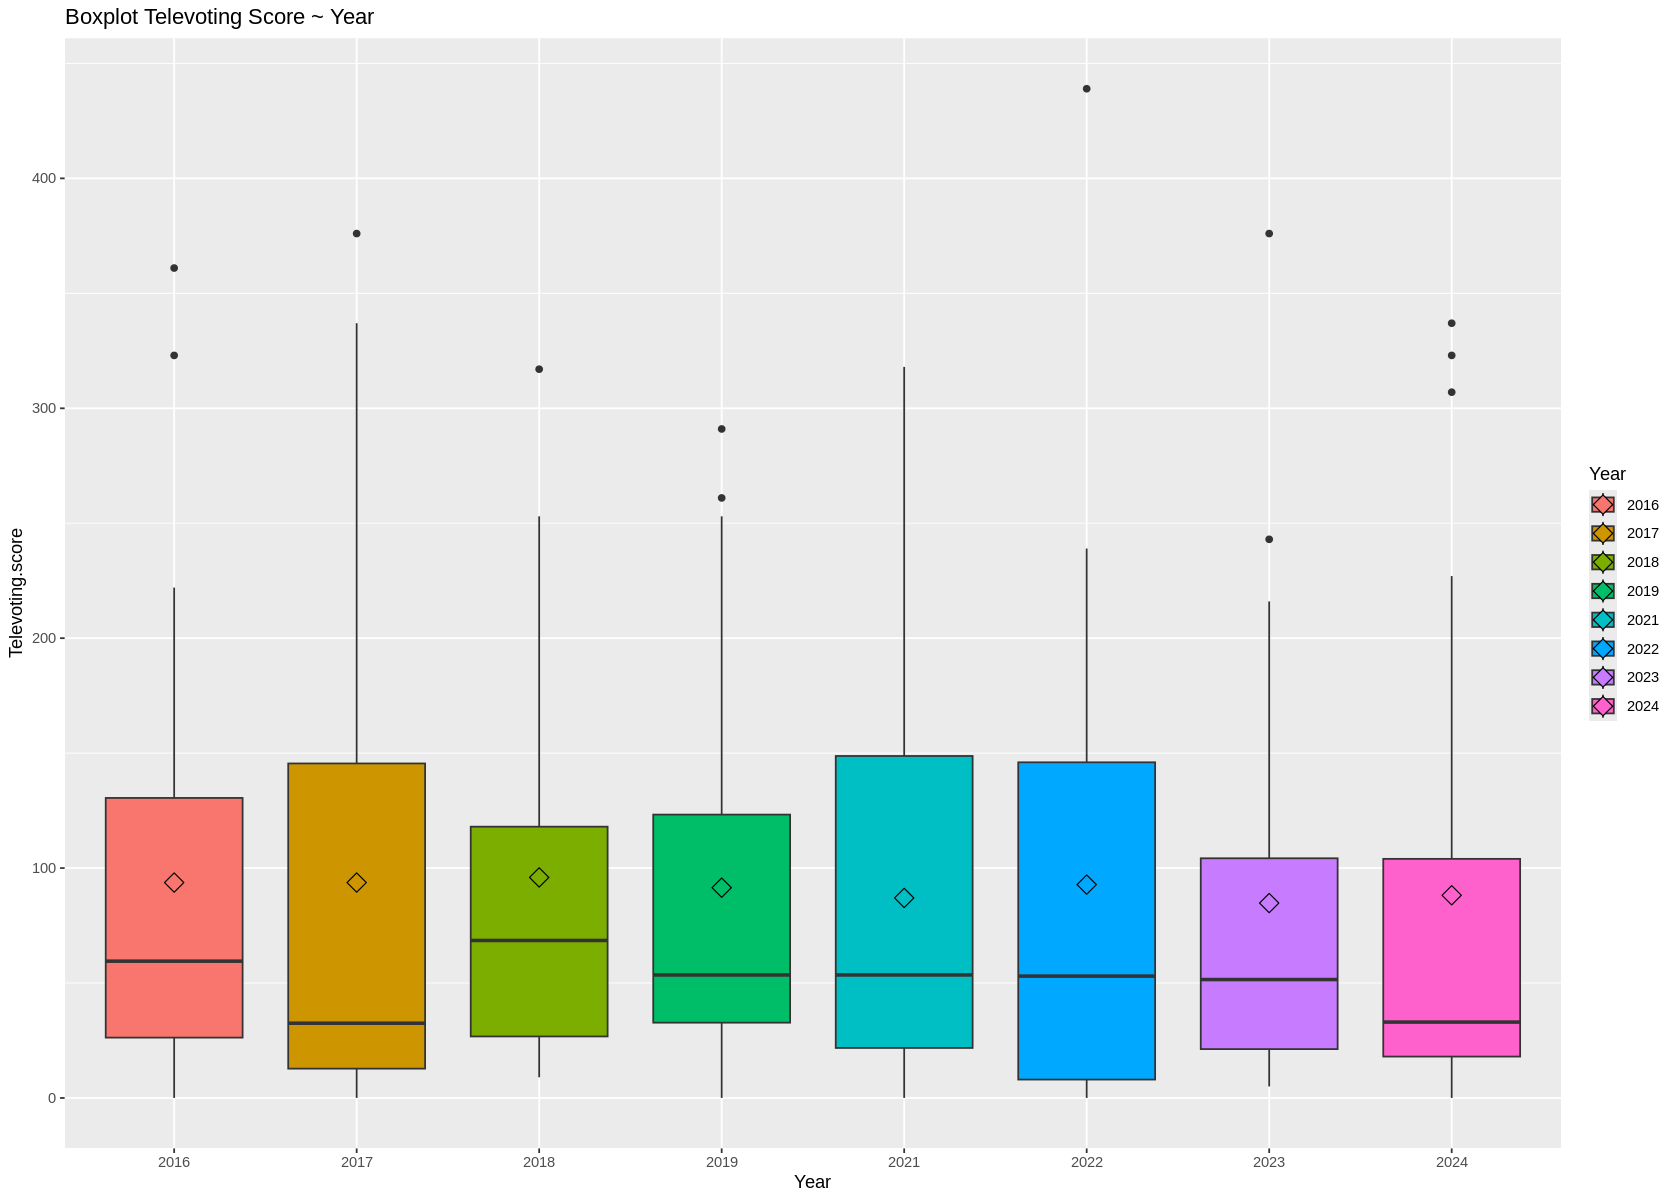

In [ ]:
ggplot(df, aes(x = Year, y = Televoting.score, fill = Year)) + geom_boxplot() + ggtitle("Boxplot Televoting Score ~ Year") + stat_summary(fun.y=mean, geom="point", shape=23, size=4)

### Graficos de Dispersion de los puntajes de cada año

In [ ]:
install.packages("GGally")
library(GGally)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘S7’




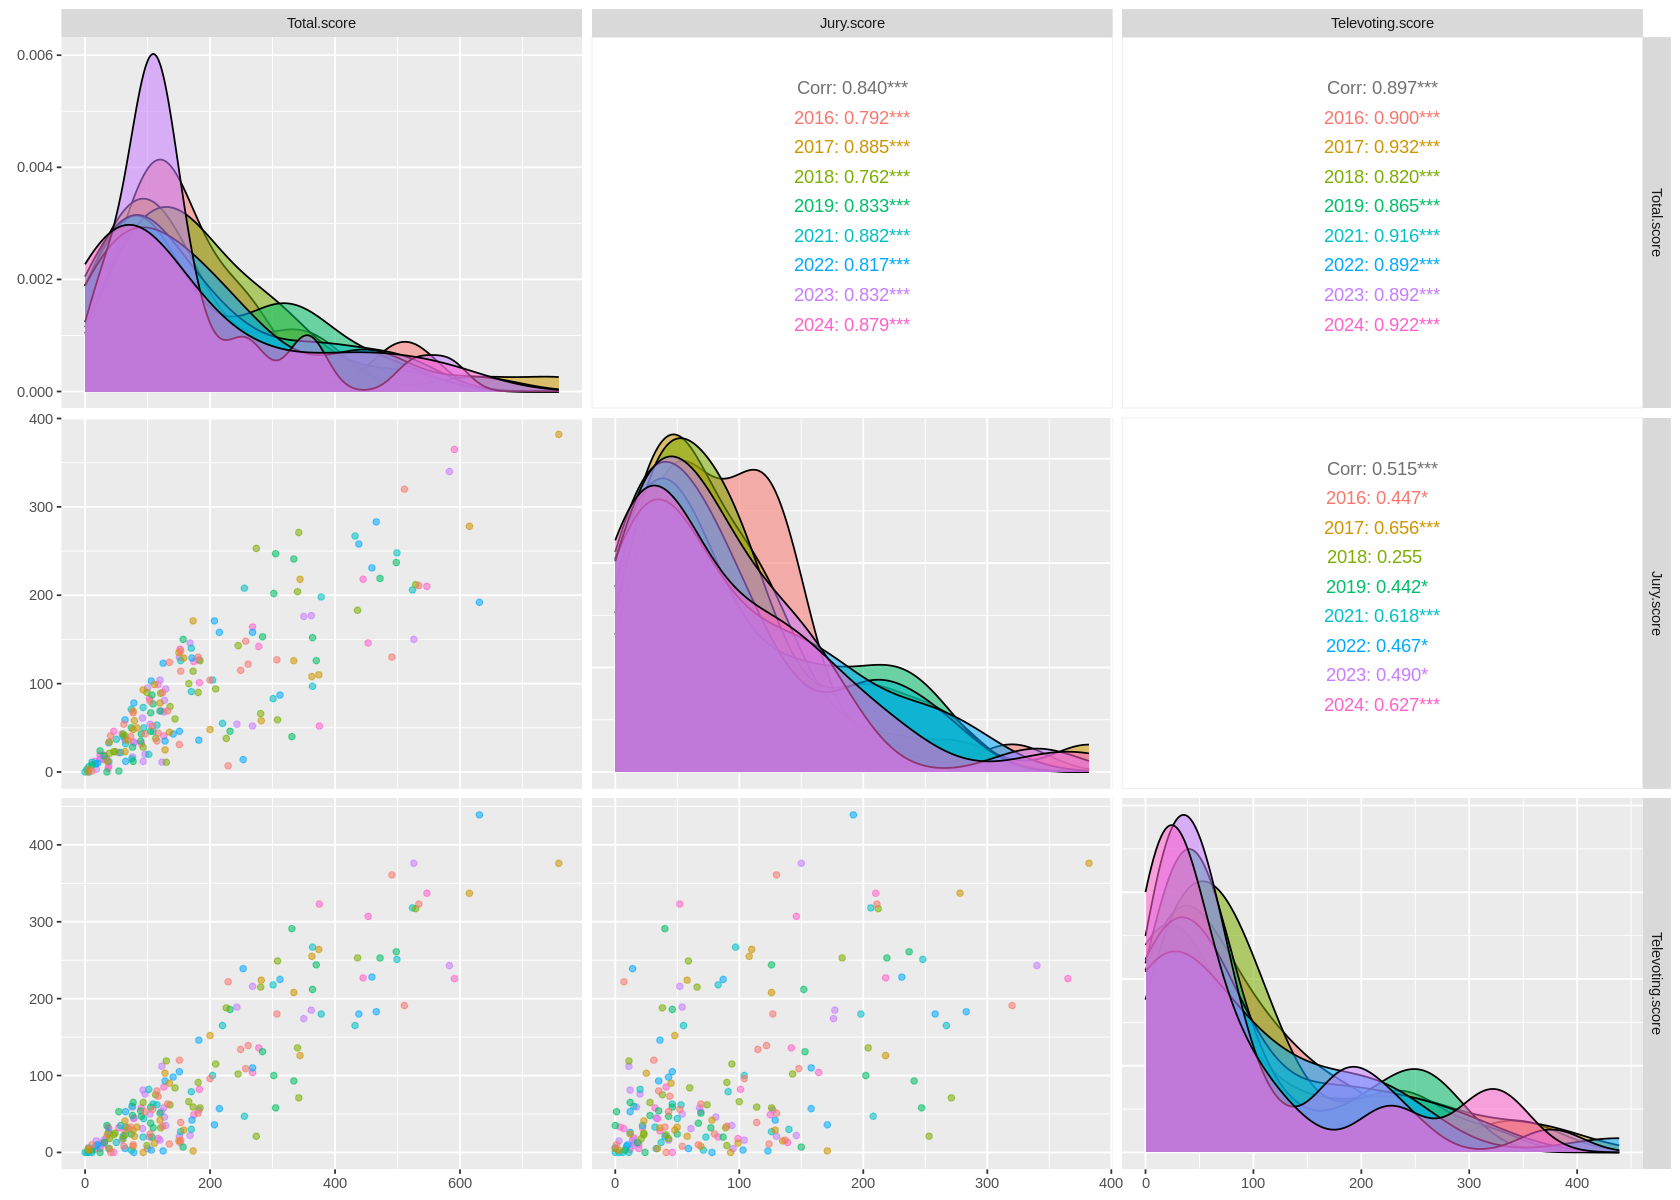

In [ ]:
ggpairs(df, columns = 3:5, ggplot2::aes(colour = Year, alpha = 0.5))

Se puede observar que la puntuacion de los jueces y la del Televoto no suelen estar correlacionado, es decir, los jueces y el publico parecen enfoncarse en cosas diferentes a la hora de hacer su veredicto.

In [ ]:
#@title Realizamos un summary de los puntajes de cada año
by(df[3:5], df$Year, summary)

df$Year: 2016
  Total.score      Jury.score     Televoting.score
 Min.   : 11.0   Min.   :  1.00   Min.   :  0.00  
 1st Qu.:105.0   1st Qu.: 43.25   1st Qu.: 26.25  
 Median :143.0   Median : 85.00   Median : 59.50  
 Mean   :187.4   Mean   : 93.69   Mean   : 93.69  
 3rd Qu.:244.0   3rd Qu.:126.25   3rd Qu.:130.50  
 Max.   :534.0   Max.   :320.00   Max.   :361.00  
------------------------------------------------------------ 
df$Year: 2017
  Total.score      Jury.score     Televoting.score
 Min.   :  5.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 77.0   1st Qu.: 38.25   1st Qu.: 12.75  
 Median :124.0   Median : 63.50   Median : 32.50  
 Mean   :187.4   Mean   : 93.69   Mean   : 93.69  
 3rd Qu.:261.5   3rd Qu.:122.00   3rd Qu.:145.50  
 Max.   :758.0   Max.   :382.00   Max.   :376.00  
------------------------------------------------------------ 
df$Year: 2018
  Total.score      Jury.score     Televoting.score
 Min.   : 39.0   Min.   : 11.00   Min.   :  9.00  
 1st Qu.:102.5   1

Tal como se observo en los graficos de caja, existe una gran diferencia entre la media y la mediana de los puntajes de cada año, esto se debe a los valores atipicos de los puntajes, los cuales suelen representar los concursantes en primer y segundo lugar. Gracias a esto como se puede ver en nuestro grafico hecho por GGPairs, la data se encuentra sesgada a la derecha, para este caso la mediana se toma como una mejor medida de tendencia central dado que no es sensible a estos valores atipicos y proporciona una mejor representancion de los valores tipicos de nuestra data.
Otra cosa que cabe destacar es que en cada año exceptuando 2023 y 2024 la media del puntaje de los jueces y la del televoto suelen ser iguales, y aun en estos casos donde no es igual la diferencia no es tan grande.

Otra cosa a resaltar es que la mediana de la puntuacion del Televoto siempre suele ser menor que la del jurado.

# Modelos de Regresion Simple

##Modelo usando Puntaje de los Jueces

In [ ]:
model_jury <- lm(Total.score ~ Jury.score, data = df)
summary(model_jury)


Call:
lm(formula = Total.score ~ Jury.score, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-172.66  -49.37  -21.81   27.99  283.87 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.85277    8.81103   3.842 0.000163 ***
Jury.score   1.63166    0.07365  22.156  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 82.86 on 204 degrees of freedom
Multiple R-squared:  0.7064,	Adjusted R-squared:  0.705 
F-statistic: 490.9 on 1 and 204 DF,  p-value: < 2.2e-16


##Modelo usando el Puntaje del Televoto

`geom_smooth()` using formula = 'y ~ x'


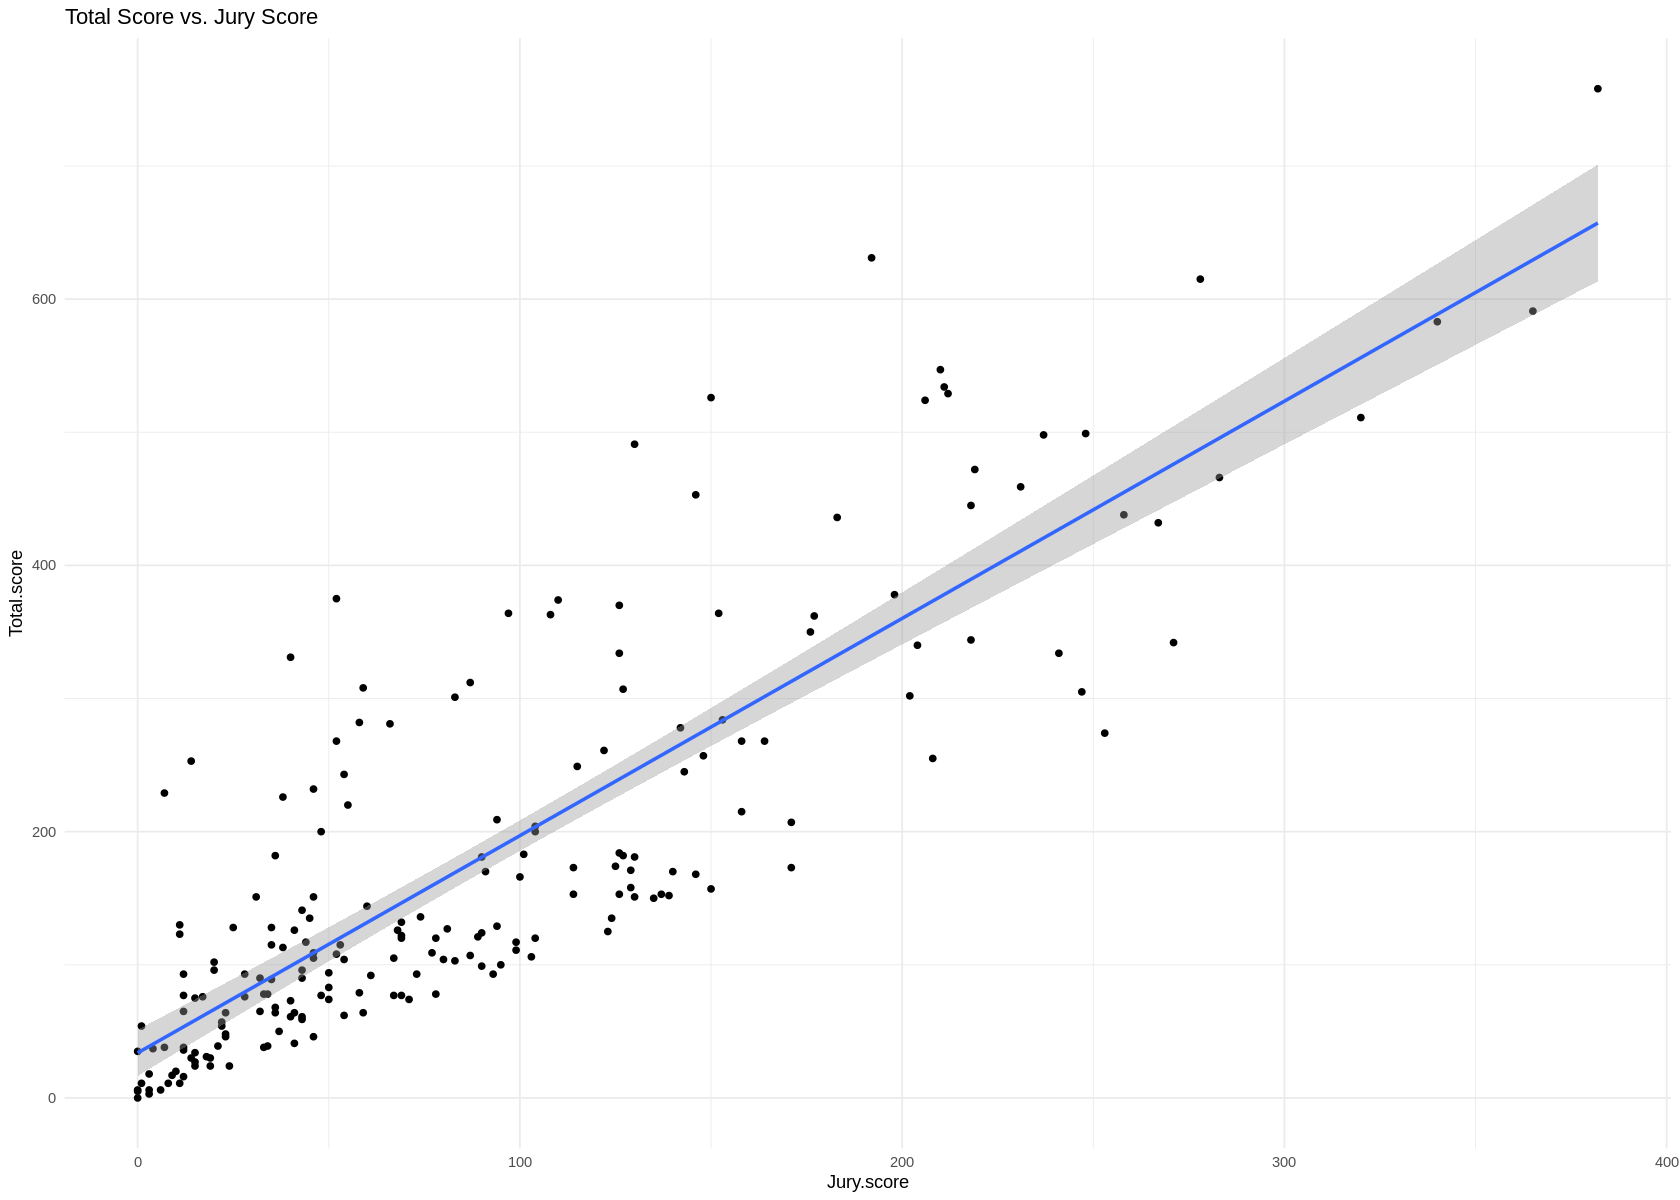

In [ ]:
# Visualize the jury score model
ggplot(df, aes(x = Jury.score, y = Total.score)) +
  geom_point() + # Add data points
  geom_smooth(method = "lm", se = TRUE) + # Add regression line with standard error
  ggtitle("Total Score vs. Jury Score") + # Set title
  theme_minimal() # Use a minimal theme

In [ ]:
model_Televote <- lm(Total.score ~ Televoting.score, data = df)
summary(model_Televote)


Call:
lm(formula = Total.score ~ Televoting.score, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-138.50  -46.54  -16.00   41.50  217.95 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.22037    6.47561   8.064 6.18e-14 ***
Televoting.score  1.41959    0.04892  29.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.54 on 204 degrees of freedom
Multiple R-squared:  0.805,	Adjusted R-squared:  0.804 
F-statistic: 842.1 on 1 and 204 DF,  p-value: < 2.2e-16


El modelo de regresion usando el Televoto posee un mayor R^2 que el del voto del Jurado por lo que esperamos que este sea mucho mas efectivo a la hora de efectuar predicciones.

`geom_smooth()` using formula = 'y ~ x'


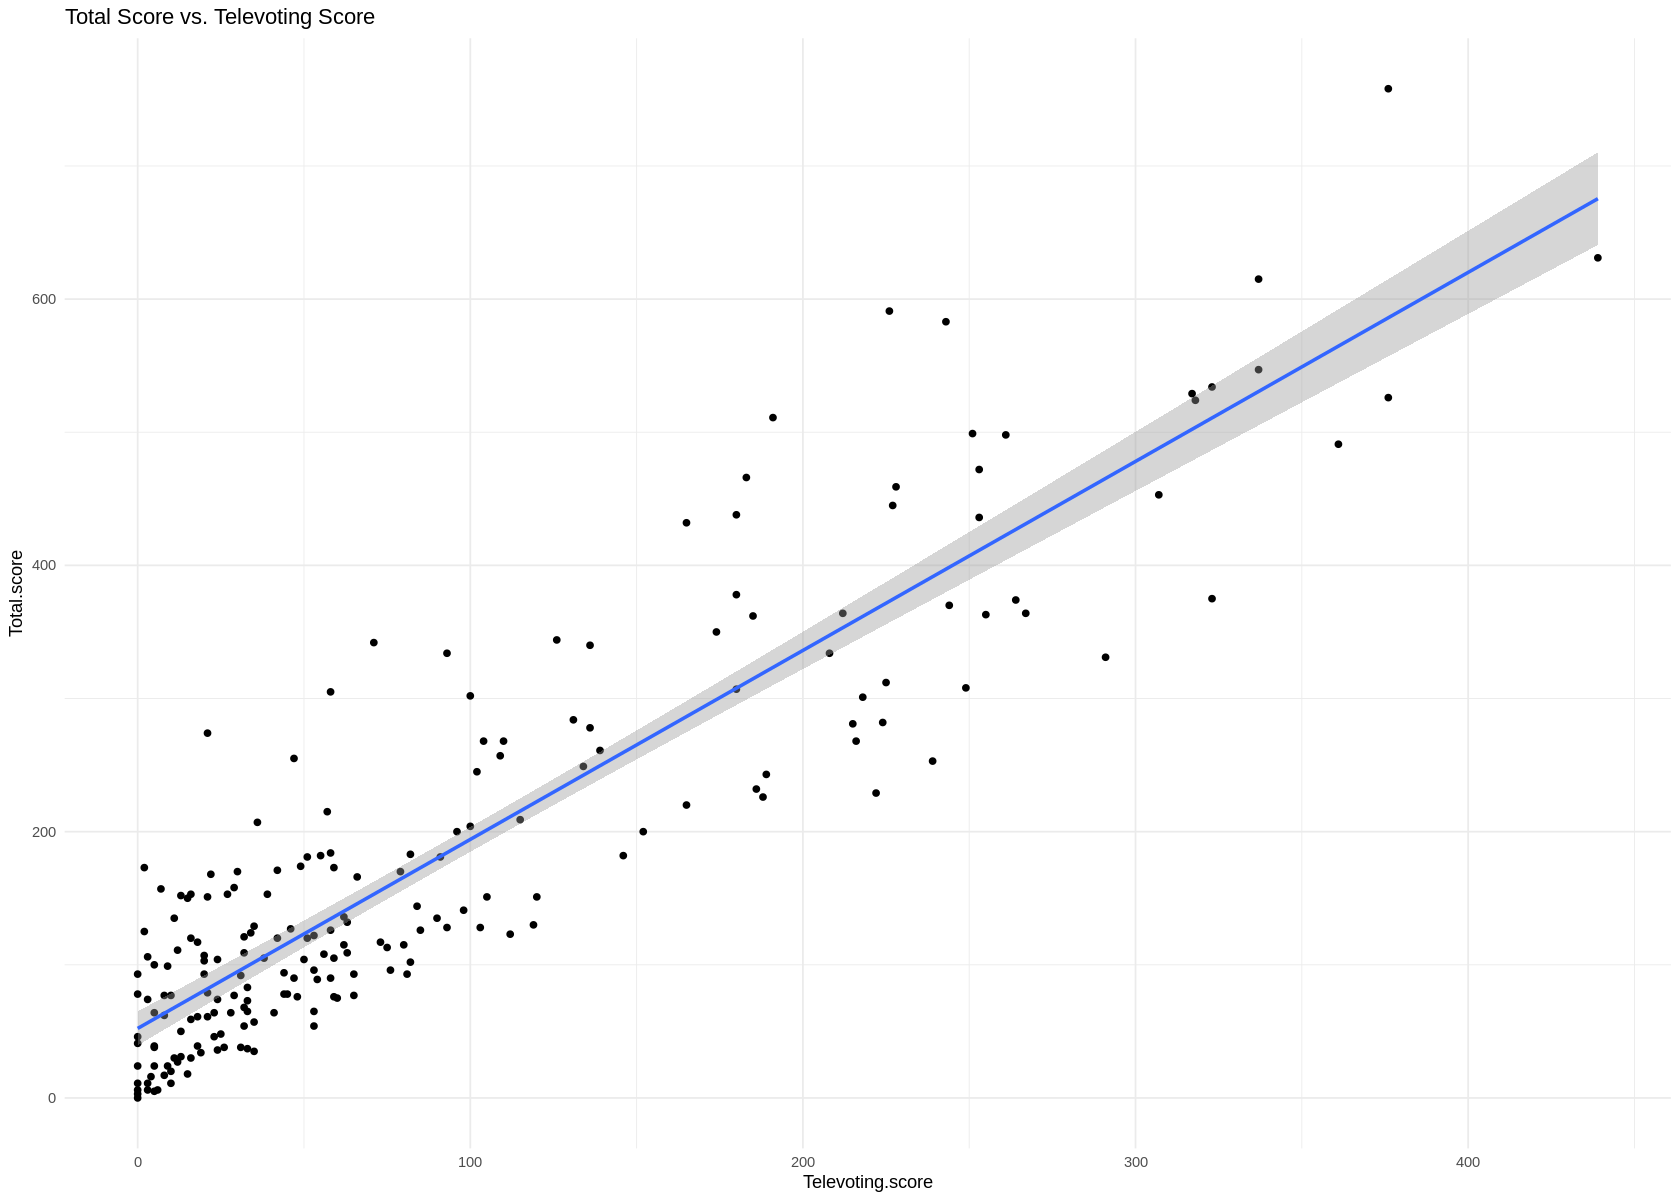

In [ ]:
# Visualize the televoting score model
ggplot(df, aes(x = Televoting.score, y = Total.score)) +
  geom_point() + # Add data points
  geom_smooth(method = "lm", se = TRUE) + # Add regression line with standard error
  ggtitle("Total Score vs. Televoting Score") + # Set title
  theme_minimal() # Use a minimal theme

In [ ]:
data_2025 <- read.csv('https://raw.githubusercontent.com/Rafagars/Eurovision-Analisis/refs/heads/main/2025_jury_results.csv')
data_2025

Contestant     Total.score Jury.score Televoting.score
1  Austria        436         258        178             
2  Israel         357          60        297             
3  Estonia        356          98        258             
4  Sweden         321         126        195             
5  Italy          256         159         97             
6  Greece         231         105        126             
7  France         230         180         50             
8  Albania        218          45        173             
9  Ukraine        218          60        158             
10 Switzerland    214         214          0             
11 Finland        196          88        108             
12 Netherlands    175         133         42             
13 Latvia         158         116         42             
14 Poland         156          17        139             
15 Germany        151          77         74             
16 Lithuania       96          34         62             
17 Malta           91          83          8             
18 Norway          89          22         67             
19 United Kingdom  88          88          0             
20 Armenia         72          42         30             
21 Portugal        50          37         13             
22 Luxembourg      47          23         24             
23 Denmark         47          45          2             
24 Spain           37          27         10             
25 Iceland         33           0         33             
26 San Marino      27           9         18

In [ ]:
# Use the trained models to predict Total.score for 2025 data
predictions_jury_2025 <- predict(model_jury, newdata = data_2025)
predictions_televote_2025 <- predict(model_Televote, newdata = data_2025)

# Add the predictions to the data_2025 data frame
data_2025$Predicted_Total_Jury <- predictions_jury_2025
data_2025$Predicted_Total_Televote <- predictions_televote_2025

# Display the data frame with the predictions
data_2025

Contestant     Total.score Jury.score Televoting.score Predicted_Total_Jury
1  Austria        436         258        178              454.82221           
2  Israel         357          60        297              131.75264           
3  Estonia        356          98        258              193.75589           
4  Sweden         321         126        195              239.44250           
5  Italy          256         159         97              293.28742           
6  Greece         231         105        126              205.17754           
7  France         230         180         50              327.55238           
8  Albania        218          45        173              107.27767           
9  Ukraine        218          60        158              131.75264           
10 Switzerland    214         214          0              383.02897           
11 Finland        196          88        108              177.43924           
12 Netherlands    175         133         42              250.86415           
13 Latvia         158         116         42              223.12585           
14 Poland         156          17        139               61.59107           
15 Germany        151          77         74              159.49094           
16 Lithuania       96          34         62               89.32936           
17 Malta           91          83          8              169.28092           
18 Norway          89          22         67               69.74939           
19 United Kingdom  88          88          0              177.43924           
20 Armenia         72          42         30              102.38268           
21 Portugal        50          37         13               94.22436           
22 Luxembourg      47          23         24               71.38105           
23 Denmark         47          45          2              107.27767           
24 Spain           37          27         10               77.90771           
25 Iceland         33           0         33               33.85277           
26 San Marino      27           9         18               48.53775           
   Predicted_Total_Televote
1  304.90744               
2  473.83868               
3  418.47466               
4  329.04047               
5  189.92062               
6  231.08874               
7  123.19988               
8  297.80948               
9  276.51563               
10  52.22037               
11 205.53612               
12 111.84316               
13 111.84316               
14 249.54342               
15 157.27005               
16 140.23497               
17  63.57709               
18 147.33292               
19  52.22037               
20  94.80808               
21  70.67504               
22  86.29054               
23  55.05955               
24  66.41627               
25  99.06685               
26  77.77299

In [ ]:
data_2025 = subset(data_2025, select = c('Contestant', 'Total.score', 'Predicted_Total_Jury', 'Predicted_Total_Televote'))

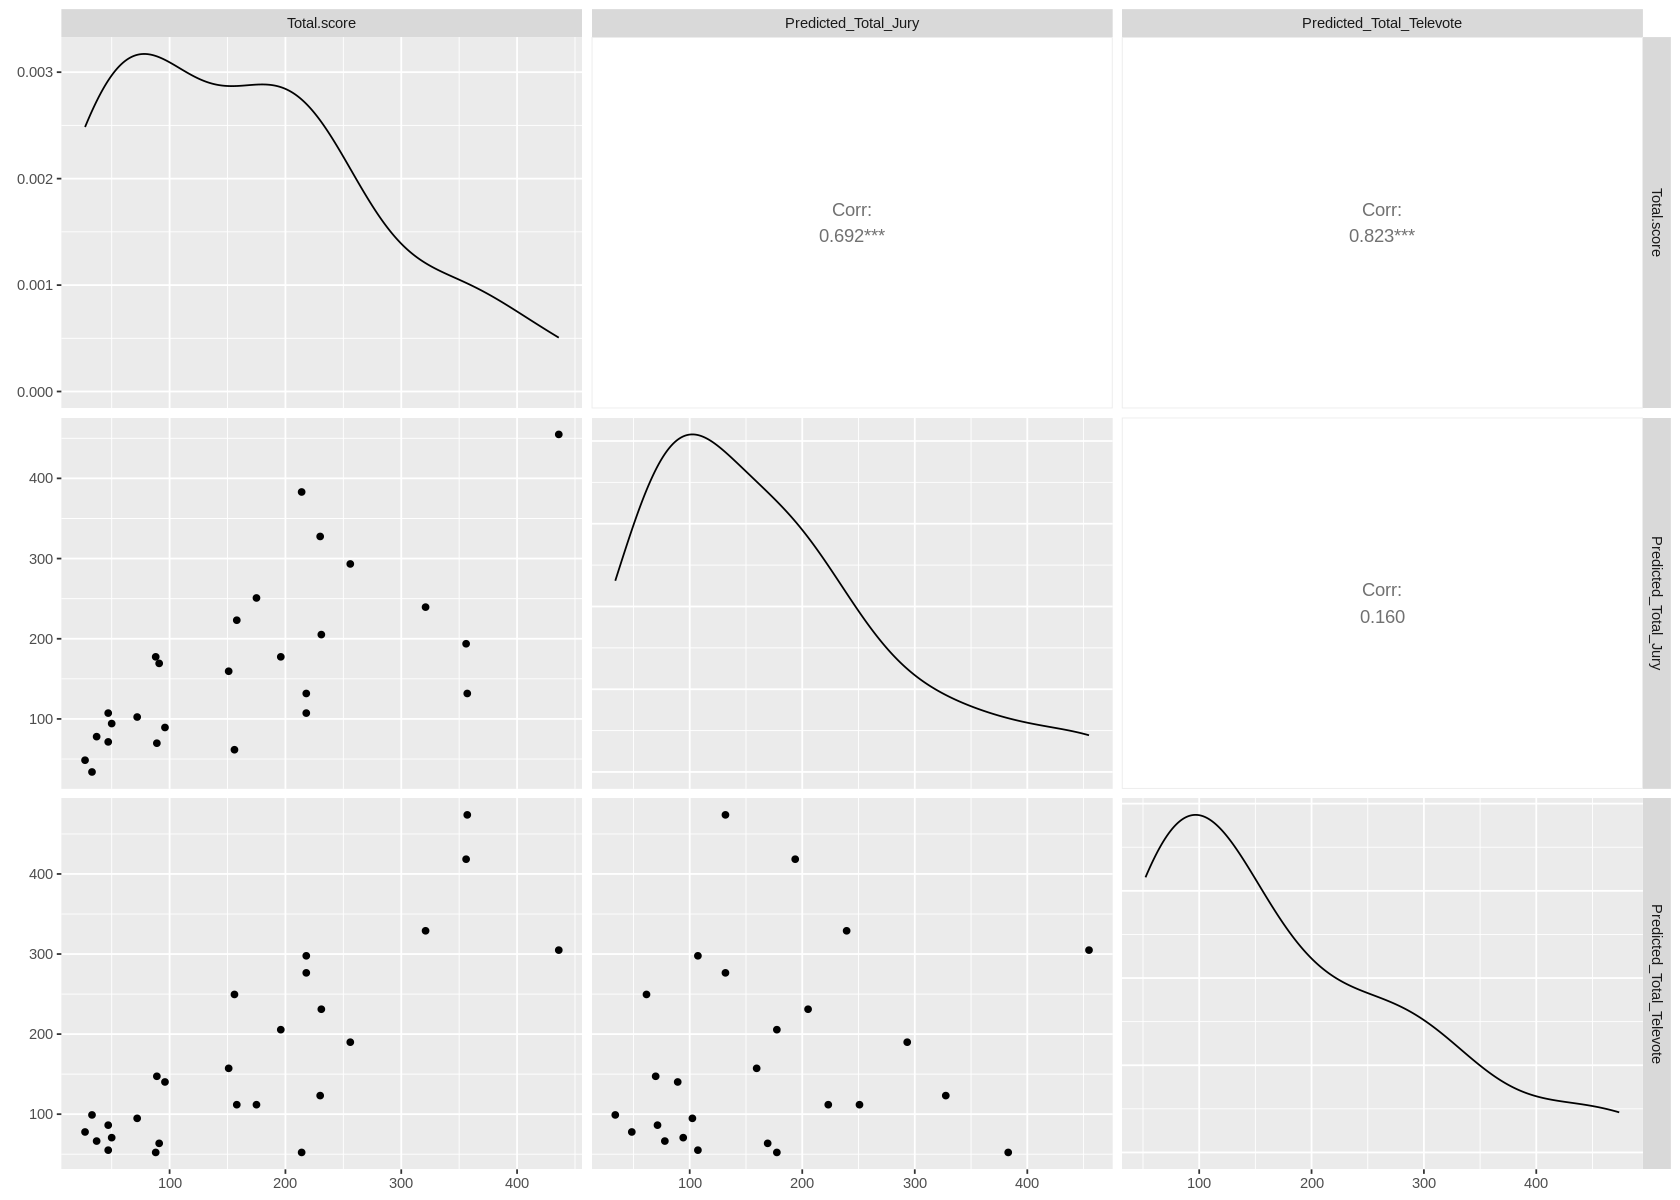

In [ ]:
ggpairs(data_2025, columns = 2:4)

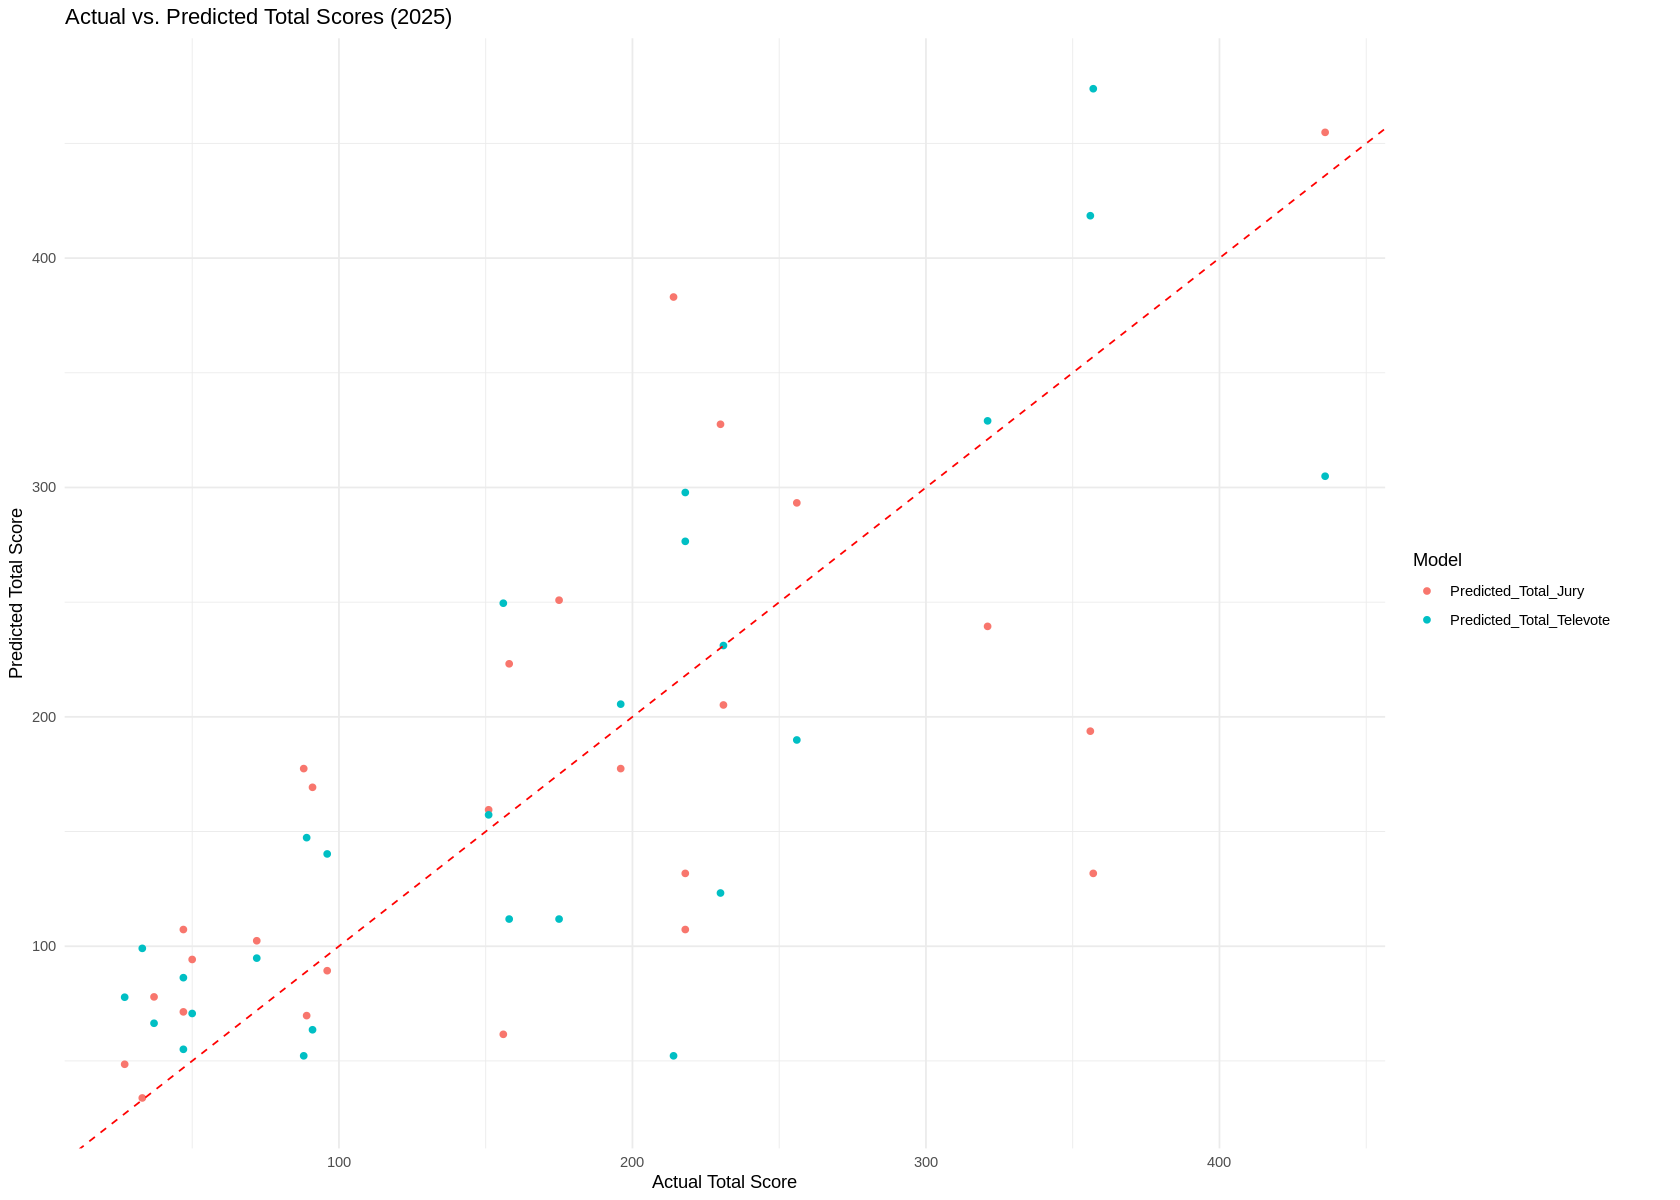

In [ ]:
# Reshape the data for ggplot
data_2025_long <- tidyr::pivot_longer(data_2025,
                                       cols = starts_with("Predicted_Total"),
                                       names_to = "Model",
                                       values_to = "Predicted_Total_Score")

# Create the scatter plot
ggplot(data_2025_long, aes(x = Total.score, y = Predicted_Total_Score, color = Model)) +
  geom_point() + # Add data points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") + # Add a y=x line for comparison
  labs(x = "Actual Total Score", y = "Predicted Total Score",
       title = "Actual vs. Predicted Total Scores (2025)") + # Set labels and title
  theme_minimal() # Use a minimal theme

In [ ]:
# Calculate RMSE for the jury model predictions
rmse_jury_2025 <- sqrt(mean((data_2025$Total.score - data_2025$Predicted_Total_Jury)^2))

# Calculate RMSE for the televoting model predictions
rmse_televote_2025 <- sqrt(mean((data_2025$Total.score - data_2025$Predicted_Total_Televote)^2))

# Calculate R-squared for the jury model predictions
# Formula for R-squared: 1 - (Sum of Squared Residuals / Total Sum of Squares)
ss_residuals_jury <- sum((data_2025$Total.score - data_2025$Predicted_Total_Jury)^2)
ss_total_jury <- sum((data_2025$Total.score - mean(data_2025$Total.score))^2)
r_squared_jury_2025 <- 1 - (ss_residuals_jury / ss_total_jury)

# Calculate R-squared for the televoting model predictions
ss_residuals_televote <- sum((data_2025$Total.score - data_2025$Predicted_Total_Televote)^2)
ss_total_televote <- sum((data_2025$Total.score - mean(data_2025$Total.score))^2)
r_squared_televote_2025 <- 1 - (ss_residuals_televote / ss_total_televote)

# Display the calculated metrics
cat("RMSE for Jury Model (2025):", rmse_jury_2025, "\n")
cat("R-squared for Jury Model (2025):", r_squared_jury_2025, "\n")
cat("RMSE for Televoting Model (2025):", rmse_televote_2025, "\n")
cat("R-squared for Televoting Model (2025):", r_squared_televote_2025, "\n")

RMSE for Jury Model (2025): 84.81233 
R-squared for Jury Model (2025): 0.4187686 
RMSE for Televoting Model (2025): 67.73797 
R-squared for Televoting Model (2025): 0.6292378 


Se puede observar que para este caso, el modelo de regresion usando el puntaje de los jueces no fue nada efectivo, y el modelo usando el puntaje del televoto aunque presento mejores resultados no es tan efectivo como se esperaba. Para el año 2025 nuestros modelos de prediccion no fueron ideales.

## Validación de Modelos con K-fold Cross-Validation

In [ ]:
# Instalar y cargar la libreria
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 1. Definir el control para la validacion cruzada
train_control <- trainControl(method = "cv", number = 10) # 10-fold cross-validation

# 2. Entrenar el modelo de regresion usando la validacion cruzada
# Para el modelo basado en Jury.score
model_jury_cv <- train(Total.score ~ Jury.score, data = df, method = "lm", trControl = train_control)

# Para el modelo basado en Televoting.score
model_televote_cv <- train(Total.score ~ Televoting.score, data = df, method = "lm", trControl = train_control)

# Los resultados de R-squared y RMSE seran el promedio de las 10 iteraciones

### Ver los resultados promedio


In [ ]:
print(model_jury_cv)

Linear Regression 

206 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 185, 186, 186, 184, 185, 186, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  81.40494  0.6910878  62.3336

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
print(model_televote_cv)

Linear Regression 

206 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 186, 184, 185, 185, 186, 186, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  67.44228  0.7990765  54.0325

Tuning parameter 'intercept' was held constant at a value of TRUE


La validacion cruzada nos ha permitido confirmar y respaldar que efectivamente el modelo usando solo el Televoto explica mucho mejor la variabilidad y posee un error menor que el modelo con el voto del Jurado. Se puede ver que el voto del Publico parece influir mas en el resultado final.

# Escalamiento Multi Dimensional

Procedemos a efectuar un Escalamiento Multi Dimensional para intentar encontrar patrones

In [ ]:
df2 <- df
df2[is.na(df2)] <- 0

dist.eurovision <- dist(df2)
cmd.eurovision <- cmdscale(dist.eurovision)

Warning message in dist(df2):
“NAs introduced by coercion”


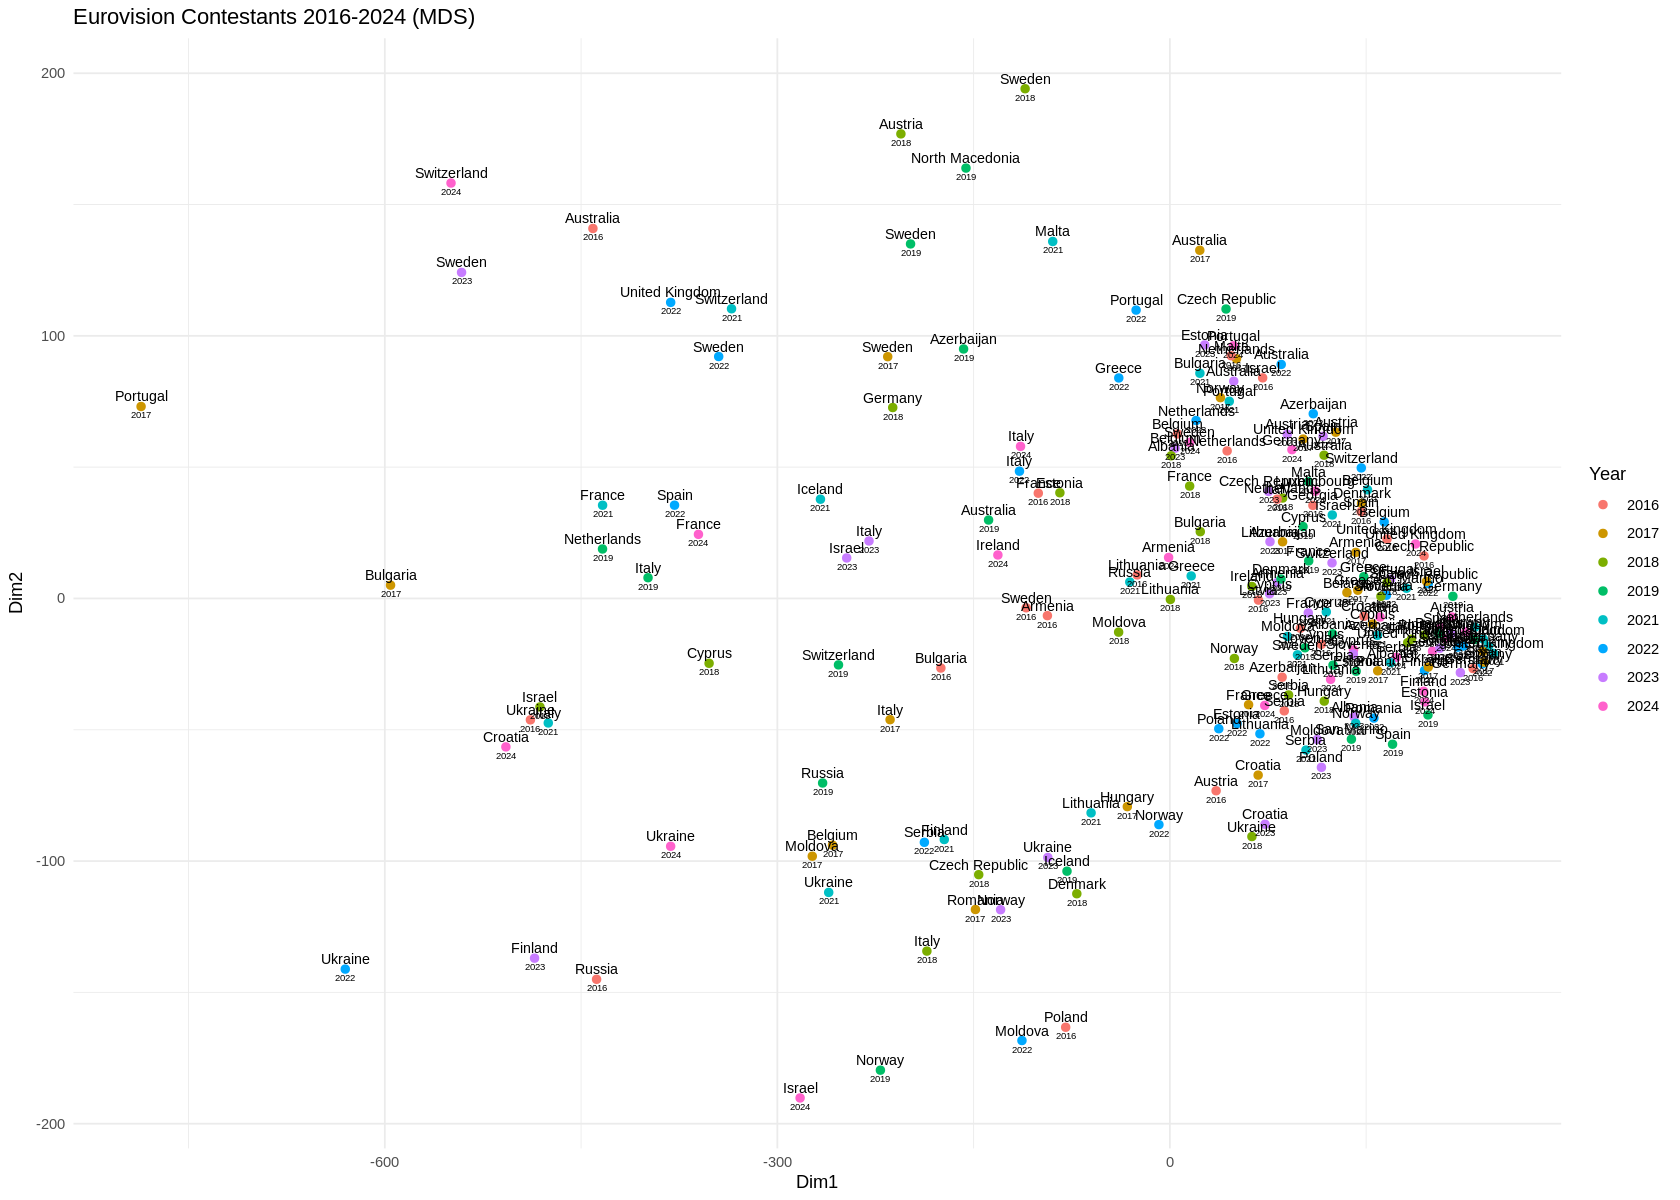

In [ ]:
# Create a data frame with the MDS results and add the Contestant and Year columns
mds_df <- data.frame(cmd.eurovision)
colnames(mds_df) <- c("Dim1", "Dim2")
mds_df$Contestant <- df2$Contestant
mds_df$Year <- df2$Year

# Create the ggplot
ggplot(mds_df, aes(x = Dim1, y = Dim2)) +
  geom_point(aes(color = Year), size = 2) + # Add points, colored by year
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) + # Add contestant labels
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) + # Add year labels
  ggtitle("Eurovision Contestants 2016-2024 (MDS)") + # Set title
  theme_minimal() # Use a minimal theme

Se observa que en el lado izquierdo del grafico se encuentran los concursantes con los mayores puntajes de su respectivo año, aquellos que entraron dentro del Top 3. Ademas se puede observar que aquellos que se encuentran en la parte superior, son los que obtuvieron mas puntos por parte de los jueces, mientras que los de la parte inferior son aquellos que obtuvieron mayor puntaje por parte del Televoto.

In [ ]:
install.packages("NbClust")
library(NbClust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


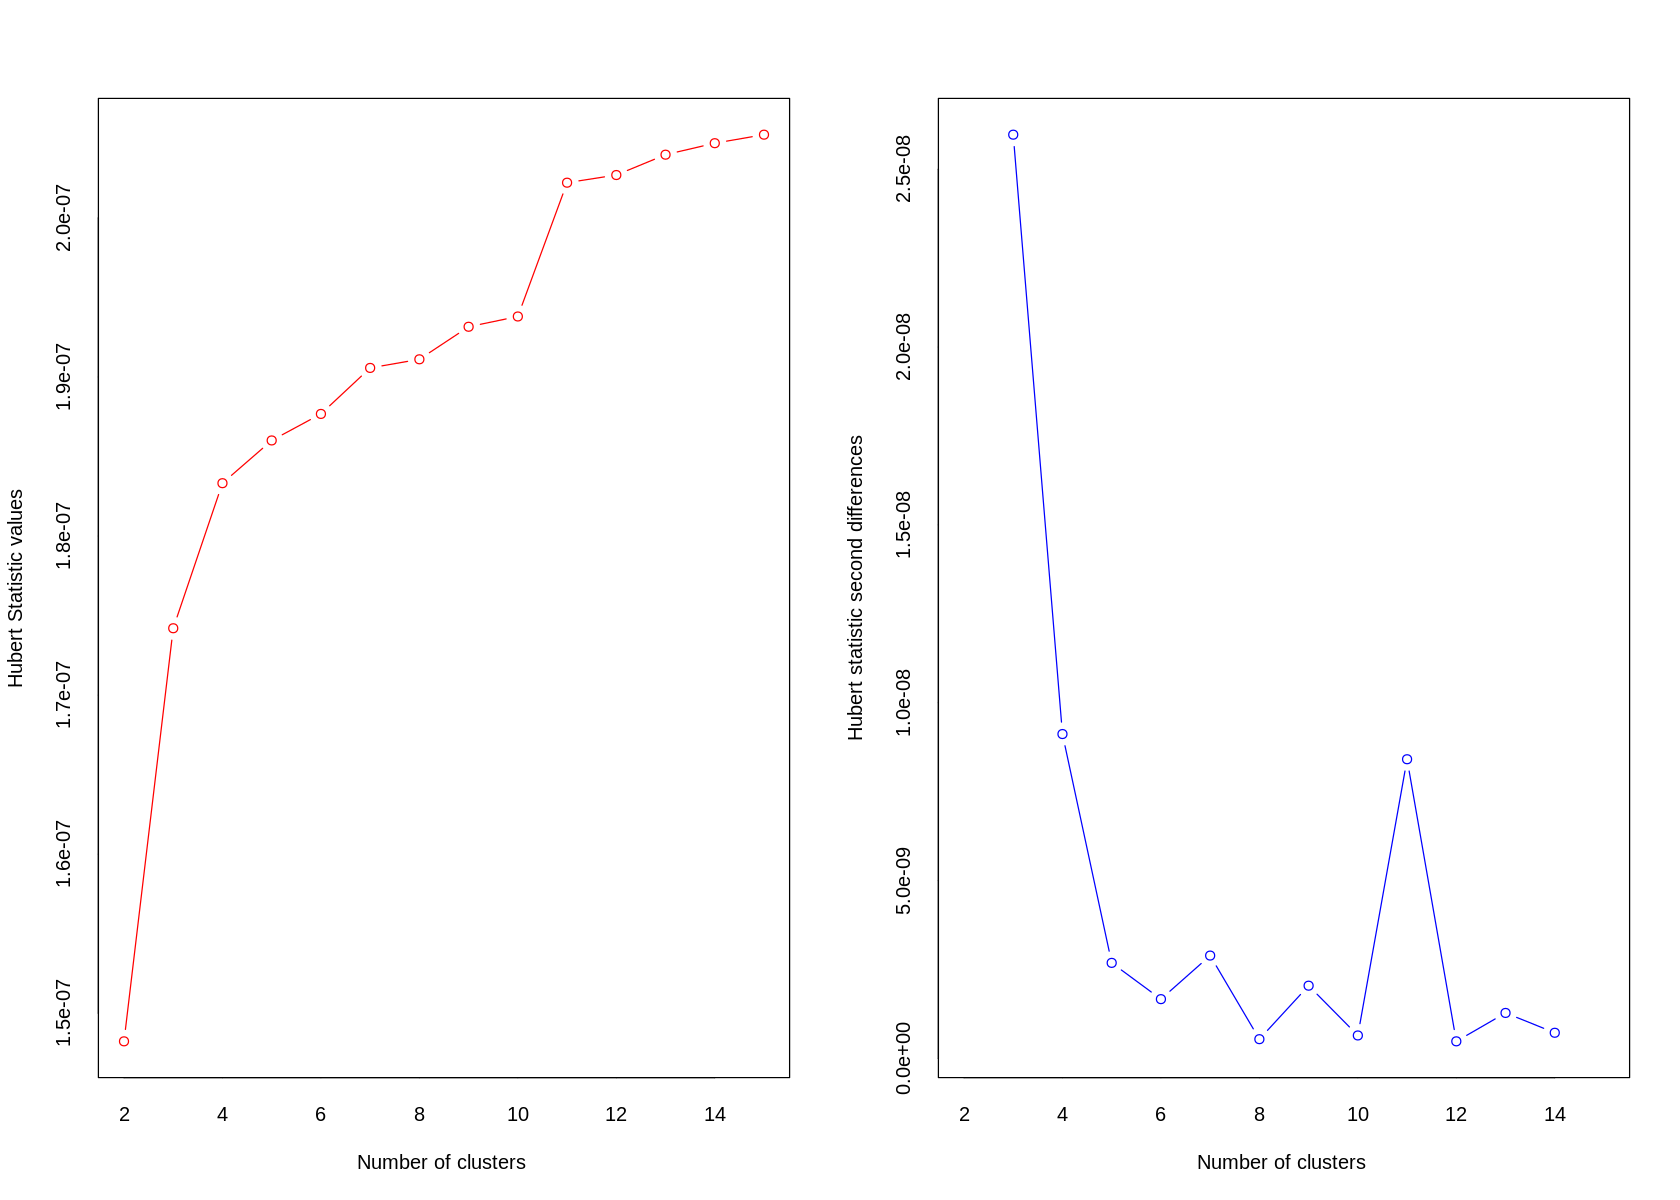

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 8 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 3 proposed 11 as the best number of clusters 
* 2 proposed 14 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


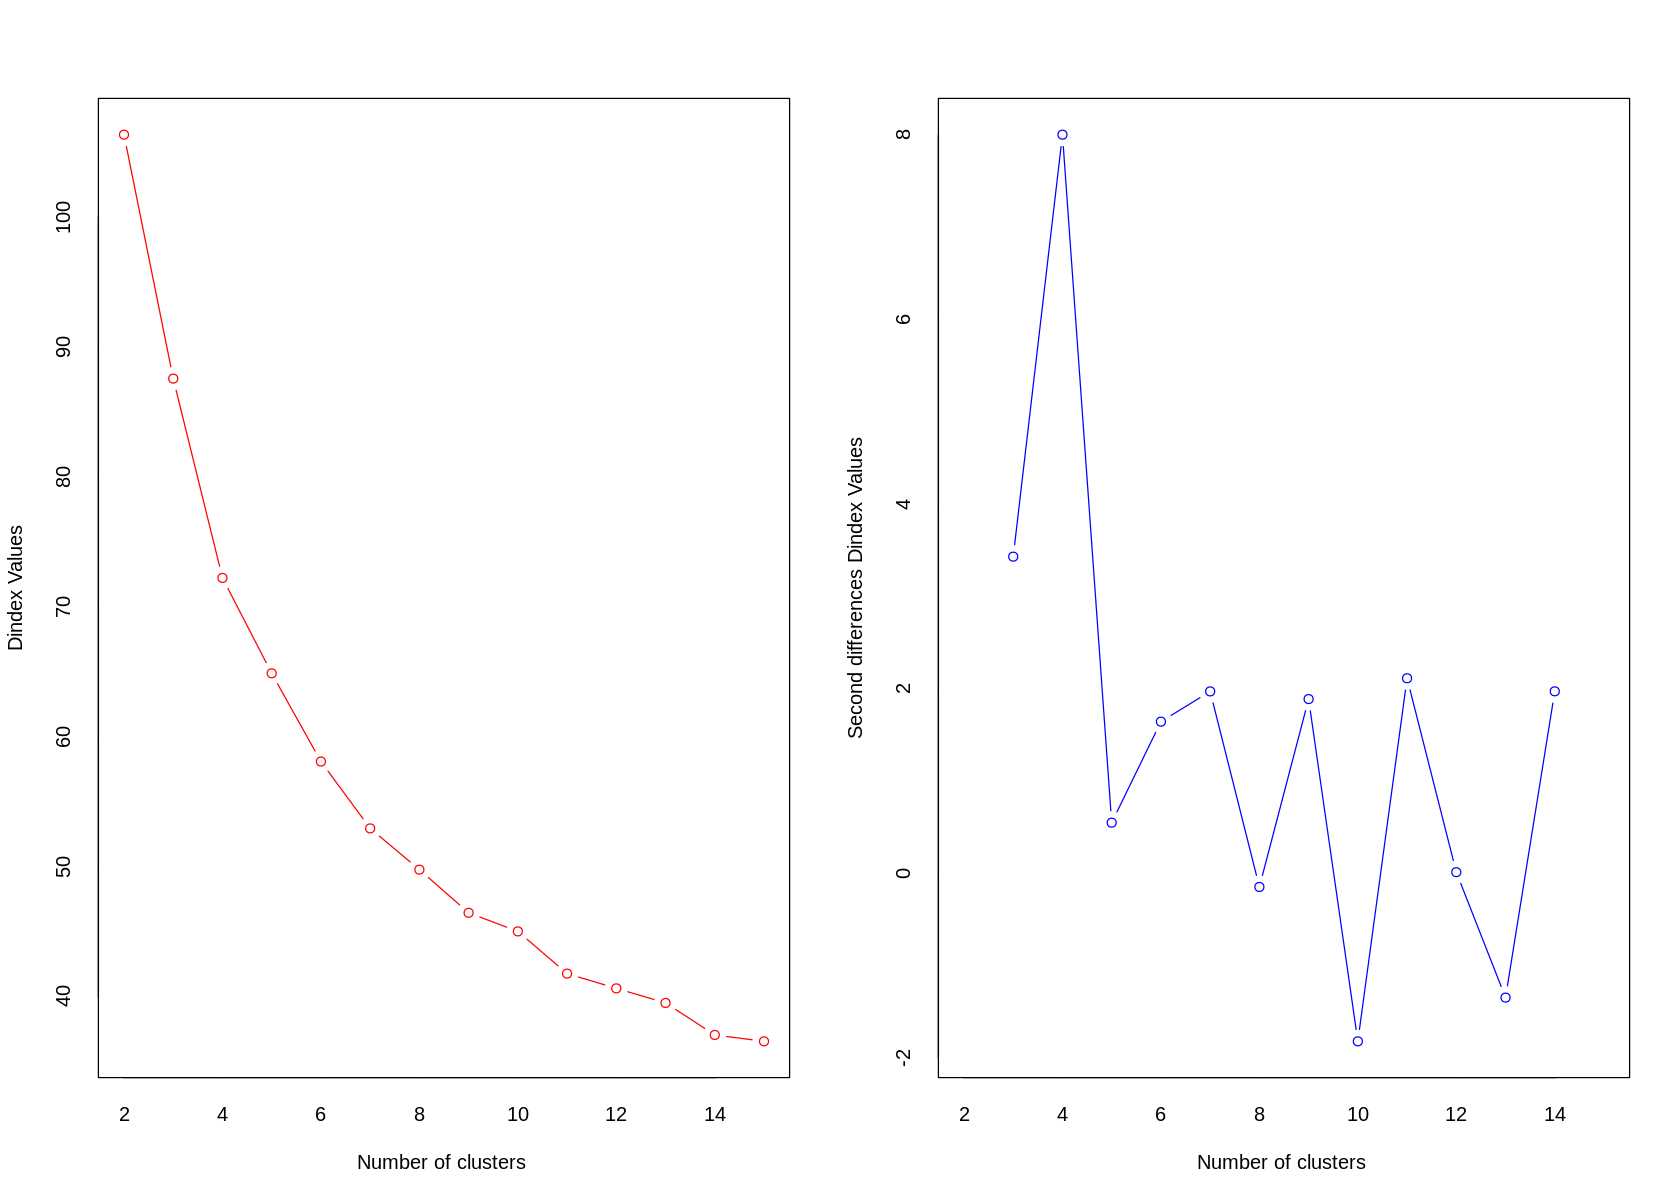

In [ ]:
#@title Utilizamos NbClust para determinar el numero de Clusters
# Consideramos de 2 a 15 clusters
set.seed(123) # Para Reproducibilidad
nb_clust <- NbClust(data = mds_df[, c("Dim1", "Dim2")], distance = "euclidean",
                   min.nc = 2, max.nc = 15, method = "kmeans")

Aunque NbClust nos haya dicho que el numero ideal de cluster es 2, se eligio el siguiente candidato, n = 3, dado que reprensenta mejor la division de los concursantes que entraron dentro del Top 3 en la competencia, que seria los puntos rojos

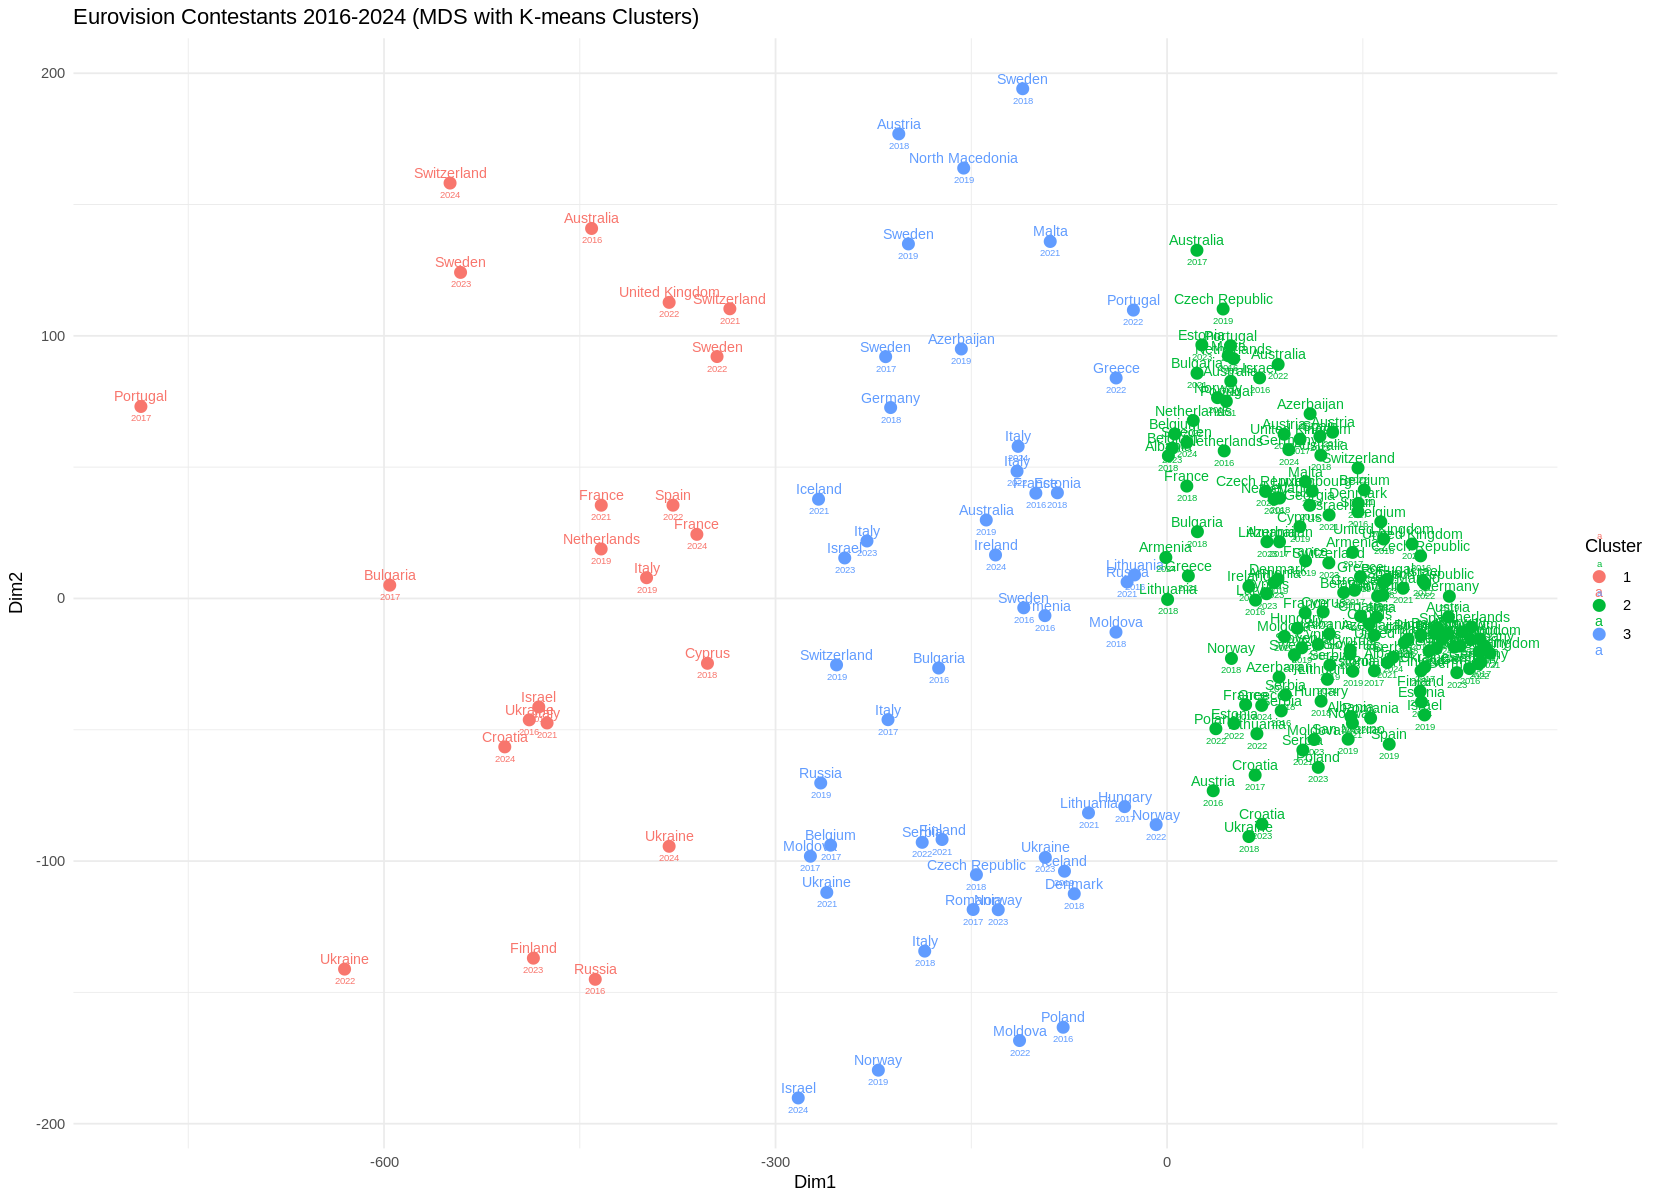

In [ ]:
# Perform K-means clustering on the MDS results
set.seed(123) # for reproducibility
kmeans_result <- kmeans(mds_df[, c("Dim1", "Dim2")], centers = 3)

# Add the cluster assignments to the mds_df
mds_df$Cluster <- as.factor(kmeans_result$cluster)

# Visualize the clusters on the MDS plot
ggplot(mds_df, aes(x = Dim1, y = Dim2, color = Cluster)) +
  geom_point(size = 3) + # Add points, colored by cluster
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) + # Add contestant labels
  geom_text(aes(label = Year), vjust = 2.5, hjust = 0.5, size = 2) + # Add year labels
  ggtitle("Eurovision Contestants 2016-2024 (MDS with K-means Clusters)") + # Set title
  theme_minimal() # Use a minimal theme

# Escalamiento usando t-SNE

Procedemos a hacer un escalamiento ahora usando t-SNE para comparar, dado que t-SNE se enfoca en preservar la estructura local mientras MDS se enfoca en preservar la estructura global

In [ ]:
install.packages("Rtsne")
library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Performing PCA
Read the 206 x 3 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.563531)!
Learning embedding...
Iteration 50: error is 47.212026 (50 iterations in 0.03 seconds)
Iteration 100: error is 47.117180 (50 iterations in 0.02 seconds)
Iteration 150: error is 47.055613 (50 iterations in 0.02 seconds)
Iteration 200: error is 47.195205 (50 iterations in 0.02 seconds)
Iteration 250: error is 47.115490 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.238206 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.196502 (50 iterations in 0.02 seconds)
Iteration 400: error is 0.193697 (50 iterations in 0.02 seconds)
Iteration 450: error is 0.192836 (50 iterations in 0.02 seconds)
Iteration 500: error is 0.191403 (50 iterations in 0.02 seconds)
Fitting performed in 0.23 seconds.


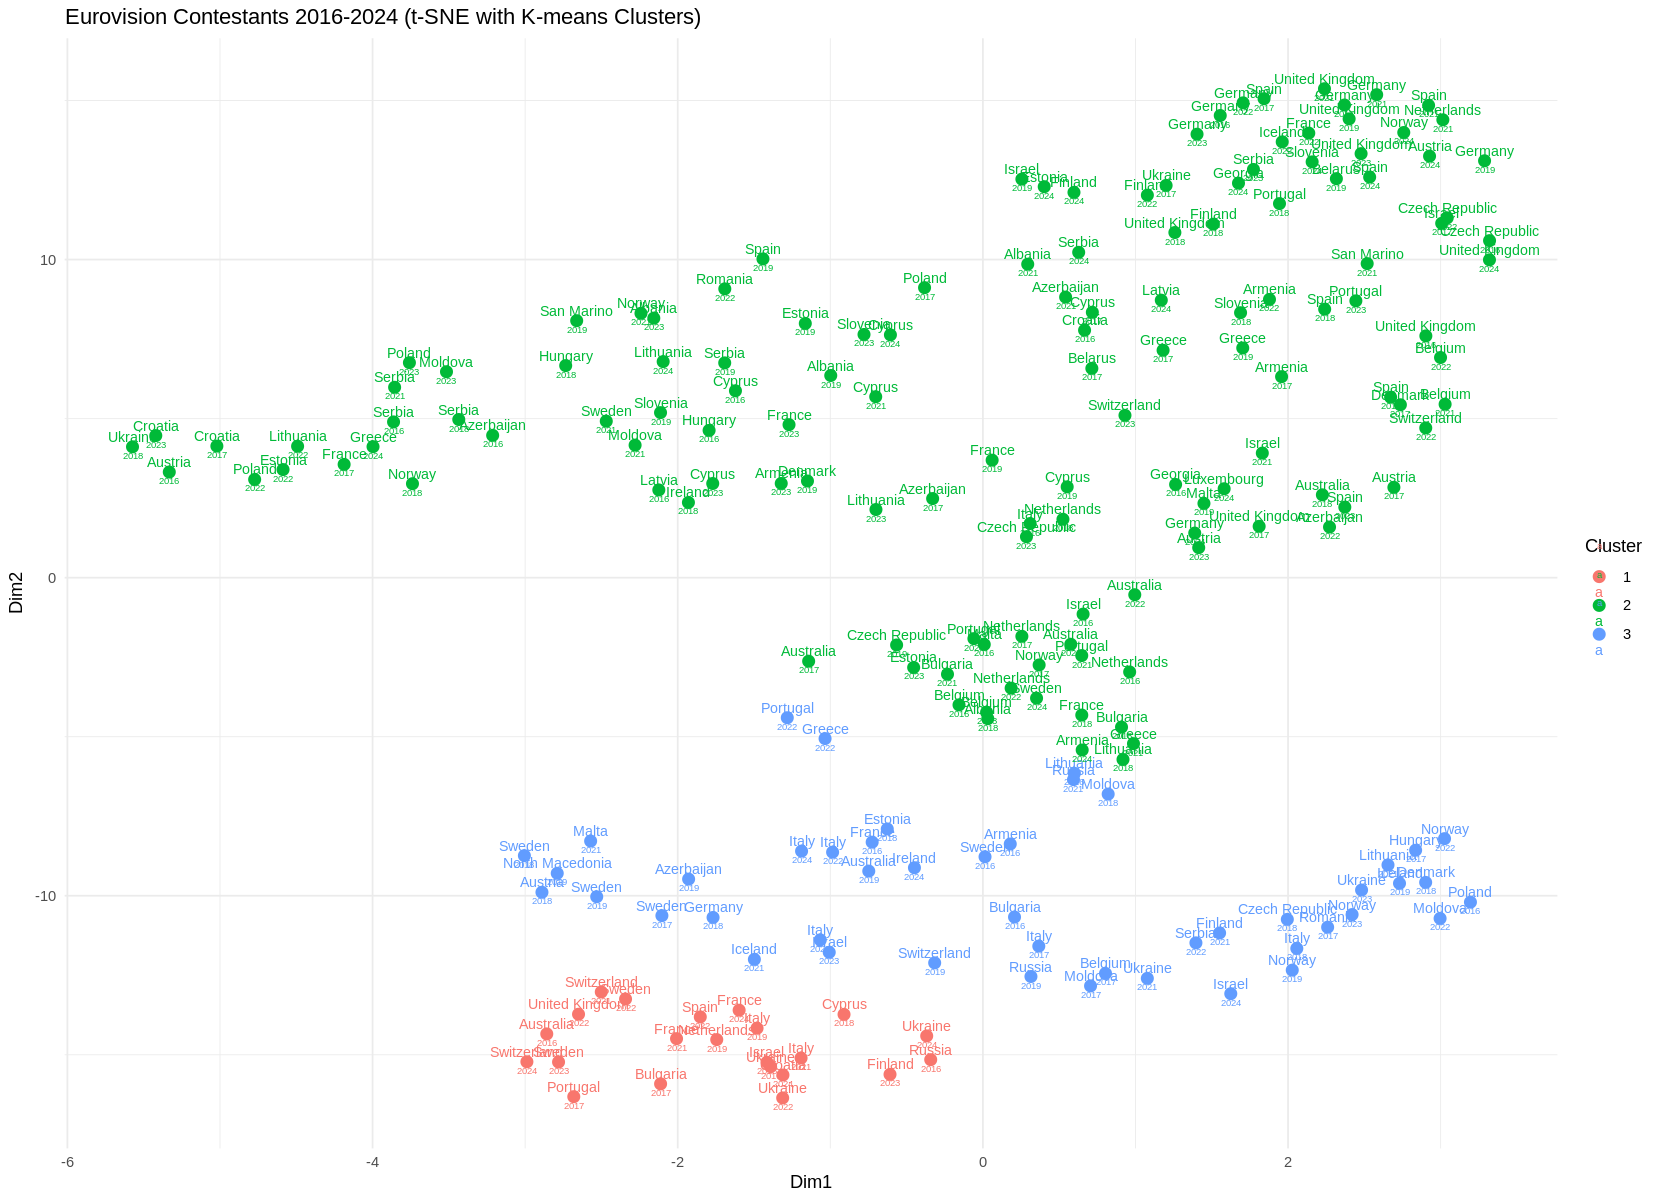

In [ ]:
# Preparamos la data para t-SNE
# For simplicity, let's replace NA with 0 as you did for MDS
df_tsne <- df
df_tsne[is.na(df_tsne)] = 0

# Seleccionamos las columnas para el t-SNE
tsne_data <- df_tsne[, c("Total.score", "Jury.score", "Televoting.score")]

# Efectuamos el t-SNE
set.seed(123)
tsne_results <- Rtsne(tsne_data, dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

# Creamos un data frame con los resultados
tsne_df <- data.frame(tsne_results$Y)
colnames(tsne_df) <- c("Dim1", "Dim2")

# Agregamos de vuelta la informacion de Concursante, año y cluster (esta ultima saldra de nuestro MDS)
tsne_df$Contestant <- df_tsne$Contestant
tsne_df$Year <- df_tsne$Year
# Add the Cluster column from the k-means results to the t-SNE dataframe
tsne_df$Cluster <- mds_df$Cluster


# Visualizamos los resultados usando ggplot

ggplot(tsne_df, aes(x = Dim1, y = Dim2, color = Cluster)) +
  geom_point(size = 3) + # Add points, colored by cluster
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) + # Add contestant labels
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) + # Add year labels
  ggtitle("Eurovision Contestants 2016-2024 (t-SNE with K-means Clusters)") + # Set title
  theme_minimal() # Use a minimal theme

En el primer cluster, el cluster rojo,  se tienen los ganadores y el segundo lugar de cada año, en el cluster azul parecen estar aquellos paises que entraron al top 10. Se puede apreciar que aquellos que estan mas a la derecha son los que tuvieron mayor votos por parte del publico, mientras que los de la izquierda son aquellos que recibieron mayor puntanje del parte del jurado. Para nuestro ultimo cluster esto no parece cumplirse, pero podemos ver como Alemania, España y Reino Unido, 3 de los big five, que usualmente obtienen los peores resultados, se encuentran agrupados en la parte superior derecha.

Al igual que en el MDS, Ucrania 2016, Israel 2019 e Italia 2021 se encuentran agrupados, mostrando que estos ganadores tuvieron compartamientos similares. Tambien podemos ver que al igual que en el MDS, Croacia 2024, el segundo lugar ese año, se encuentra cerca al grupo de ganadores, mostrando que su compartamiento fue similar al de ganadores de años anteriores. En el t-SNE, no se nota de manera drastica la diferencia del voto del jurado o del publico para los ganadores pero se aprecia mejor la diferencia para los ultimos puestos, contrario a lo que se ve en el MDS donde se aprecia mejor la diferencia para los primeros lugares pero no para los ultimos. Por lo que podemos decir que ambos graficos se complementan.

# Task
Analyze the provided Eurovision data. Perform feature engineering by creating new features such as the difference and ratio between jury and televoting scores. Conduct statistical tests to compare the means of jury and televoting scores across different years or groups of countries. Re-evaluate and potentially improve the regression models using the new features. Incorporate the new features into visualizations and dimensionality reduction techniques. Summarize the findings from the analysis and provide potential next steps.

## Ingeniería de Características (Gemini recomendo hacer esto)

### Subtarea:
Crear nuevas características como la diferencia y la razón entre las puntuaciones del jurado y del televoto.

**Razonamiento**:
Calcular la diferencia y la razón entre las puntuaciones del jurado y del televoto y añadirlas como nuevas columnas al dataframe, manejando la posible división por cero para la razón. Luego, mostrar las primeras filas para verificar las nuevas columnas.

In [ ]:
# Calculate the difference between Jury.score and Televoting.score
df$Score_Difference <- df$Jury.score - df$Televoting.score

# Calculate the ratio of Jury.score to Televoting.score
# Handle division by zero by replacing Inf with NA and then replacing NA with 0
df$Score_Ratio <- df$Jury.score / df$Televoting.score
df$Score_Ratio[is.infinite(df$Score_Ratio)] <- NA
df$Score_Ratio[is.nan(df$Score_Ratio)] <- NA
df$Score_Ratio[is.na(df$Score_Ratio)] <- 0 # Replacing NA with 0, adjust if a different value is needed

# Display the first few rows of the updated dataframe
head(df)

Year Contestant  Total.score Jury.score Televoting.score Score_Difference
182 2024 Switzerland 591         365        226               139            
183 2024 Croatia     547         210        337              -127            
184 2024 Ukraine     453         146        307              -161            
185 2024 France      445         218        227                -9            
186 2024 Israel      375          52        323              -271            
187 2024 Ireland     278         142        136                 6            
    Score_Ratio
182 1.6150442  
183 0.6231454  
184 0.4755700  
185 0.9603524  
186 0.1609907  
187 1.0441176

## Pruebas estadísticas (Tambien recomendacion de Gemini)

### Subtarea:
Realizar pruebas estadísticas para comparar las medias de las puntuaciones del jurado y del televoto en diferentes años o grupos de países.

**Razonamiento**:
Para comparar las medias de las puntuaciones del jurado y del televoto para cada año, iteraré a través de los años únicos en el dataframe y realizaré una prueba t independiente.

In [ ]:
# Perform independent t-tests for Jury.score and Televoting.score for each year
unique_years <- unique(df$Year)
t_test_results_yearly <- list()

for (year in unique_years) {
  cat("Performing t-test for year:", year, "\n")
  data_year <- subset(df, Year == year)

  # Perform the t-test
  # Assuming unequal variances (Welch's t-test) as it is generally safer
  test_result <- t.test(data_year$Jury.score, data_year$Televoting.score, paired = FALSE, var.equal = FALSE)

  # Store the results
  t_test_results_yearly[[as.character(year)]] <- test_result

  # Print a summary of the test
  print(test_result)
  cat("\n")
}

Performing t-test for year: 2024 

	Welch Two Sample t-test

data:  data_year$Jury.score and data_year$Televoting.score
t = -0.083832, df = 46.067, p-value = 0.9336
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -58.02321  53.38321
sample estimates:
mean of x mean of y 
    85.84     88.16 


Performing t-test for year: 2023 

	Welch Two Sample t-test

data:  data_year$Jury.score and data_year$Televoting.score
t = -0.096451, df = 48.049, p-value = 0.9236
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -48.73278  44.27124
sample estimates:
mean of x mean of y 
 82.53846  84.76923 


Performing t-test for year: 2022 

	Welch Two Sample t-test

data:  data_year$Jury.score and data_year$Televoting.score
t = 0, df = 45.431, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -54.91933  54.91933
sample estimates:
mean of x mean o

**Razonamiento**:
Ahora realizaré una prueba t independiente para comparar la media de la puntuación del jurado y la puntuación del televoto para dos grupos de países basándome en su puntuación total promedio histórica. Definiré los países con "puntuación alta" como aquellos con una puntuación total promedio por encima de la puntuación total promedio general en todos los años y los países con "puntuación baja" como aquellos con una puntuación total promedio por debajo o igual al promedio general.

In [ ]:
# Calculate the average total score for each country across all years
average_scores_by_country <- aggregate(Total.score ~ Contestant, data = df, FUN = mean, na.rm = TRUE)

# Calculate the overall average total score across all countries and years
overall_average_score <- mean(df$Total.score, na.rm = TRUE)

# Define high and low scoring countries
high_scoring_countries <- subset(average_scores_by_country, Total.score > overall_average_score)$Contestant
low_scoring_countries <- subset(average_scores_by_country, Total.score <= overall_average_score)$Contestant

# Create dataframes for high and low scoring countries
df_high_scoring <- subset(df, Contestant %in% high_scoring_countries)
df_low_scoring <- subset(df, Contestant %in% low_scoring_countries)

# Perform independent t-tests comparing Jury.score and Televoting.score for the two groups
cat("Performing t-test for High Scoring Countries (Jury vs Televoting):\n")
t_test_high <- t.test(df_high_scoring$Jury.score, df_high_scoring$Televoting.score, paired = FALSE, var.equal = FALSE)
print(t_test_high)
cat("\n")

cat("Performing t-test for Low Scoring Countries (Jury vs Televoting):\n")
t_test_low <- t.test(df_low_scoring$Jury.score, df_low_scoring$Televoting.score, paired = FALSE, var.equal = FALSE)
print(t_test_low)
cat("\n")

Performing t-test for High Scoring Countries (Jury vs Televoting):

	Welch Two Sample t-test

data:  df_high_scoring$Jury.score and df_high_scoring$Televoting.score
t = -0.30045, df = 163.5, p-value = 0.7642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35.27920  25.96102
sample estimates:
mean of x mean of y 
 127.0455  131.7045 


Performing t-test for Low Scoring Countries (Jury vs Televoting):

	Welch Two Sample t-test

data:  df_low_scoring$Jury.score and df_low_scoring$Televoting.score
t = 0.31404, df = 229.29, p-value = 0.7538
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.14087  18.12393
sample estimates:
mean of x mean of y 
 63.03390  60.54237 




Con todo esto se puede concluir que no hay diferencia significativa estadisticamente entre la media del puntaje del jurado y la del televoto, hemos confirmado esto para cada año.

Luego, comparando los paises con puntajes con los puntajes mas altos y los paises con puntajes mas bajos, tampoco encontramos diferencia significativa, el intervalo de confianza incluye al 0 en ambos grupos. Estos resultados soportan la observacion de los pairs plot de que el voto del jurado y el del televoto no estan fuertemente correlacionadas y representan prefencias diferentes a la hora de puntuar.

## Análisis Adicional con Nuevas Características

Ahora incorporaremos las nuevas características (`Score_Difference` y `Score_Ratio`) en visualizaciones y técnicas de reducción de dimensionalidad para ver si revelan nuevos patrones.

### Visualizaciones con Nuevas Características

Creemos algunas visualizaciones para explorar la relación entre las nuevas características y la puntuación total, así como su variación a lo largo de los años.

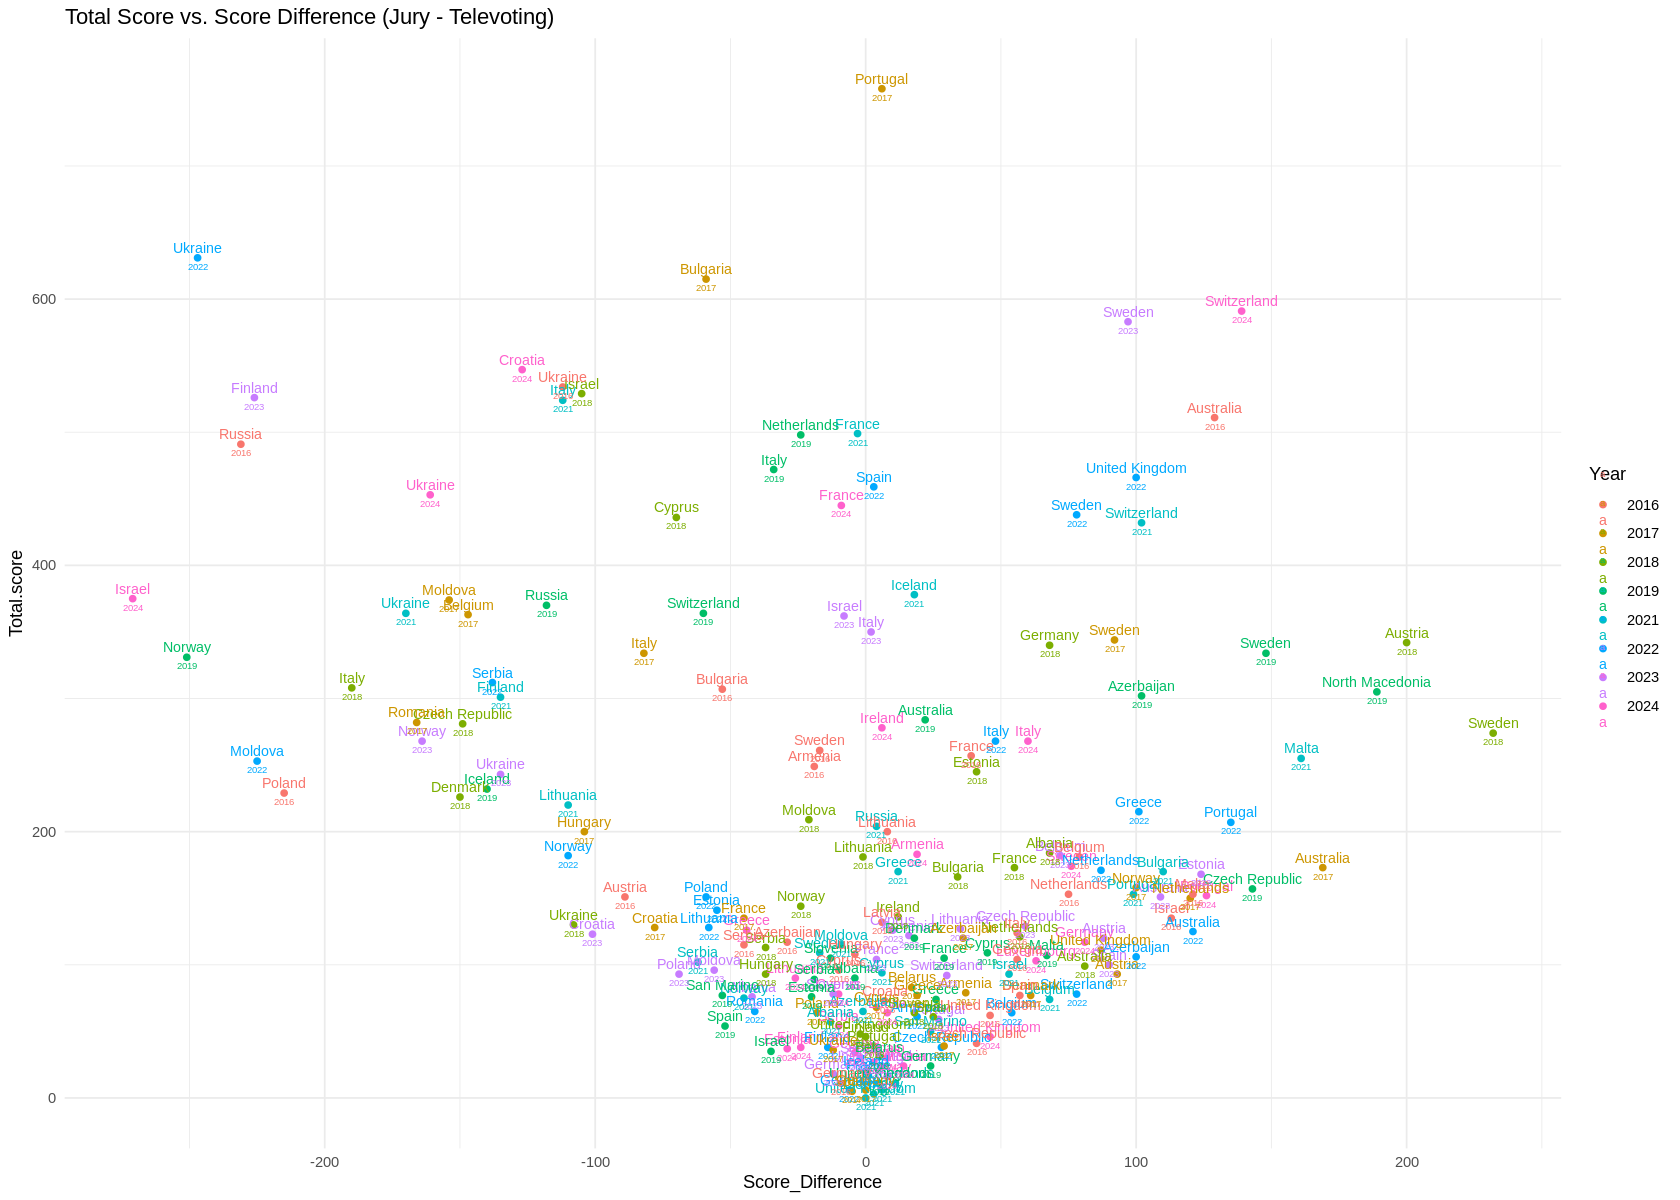

In [ ]:
# Create scatter plots of Total.score vs. Score_Difference and Total.score vs. Score_Ratio
ggplot(df, aes(x = Score_Difference, y = Total.score, color = Year)) +
  geom_point() +
  ggtitle("Total Score vs. Score Difference (Jury - Televoting)") +
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) +
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) +
  theme_minimal()

Notemos como nuestro grafico de Total Score vs Score Difference es el mismo grafico del MDS pero con los ejes cambiados

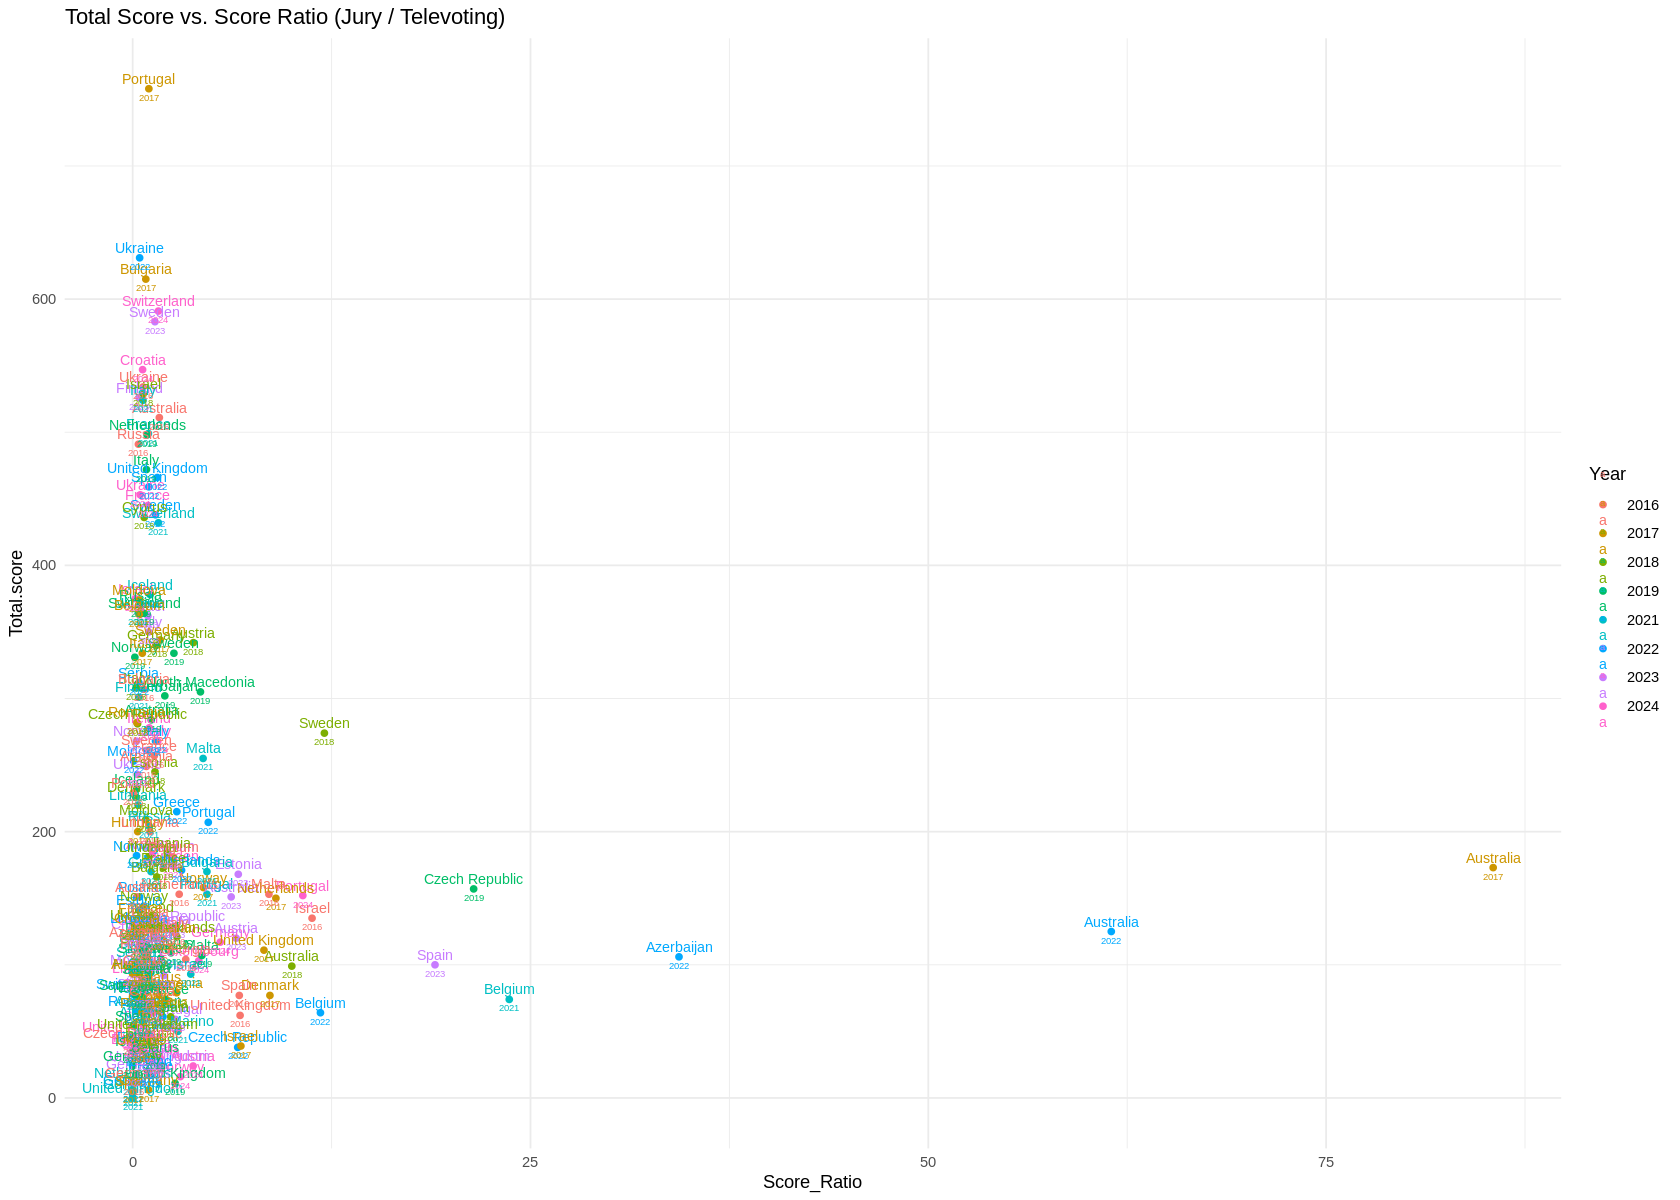

In [ ]:
ggplot(df, aes(x = Score_Ratio, y = Total.score, color = Year)) +
  geom_point() +
  ggtitle("Total Score vs. Score Ratio (Jury / Televoting)") +
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) +
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) +
  theme_minimal()

Notemos como Australia 2017 es el que presenta el mayor Score Ratio, de mas de 80, seguido por el mismo pais pero en el 2022. Para el primero, Australia logro entrar al top 10 solo con el voto del Jurado. Estos valores atipicos son casos en los que el publico dio puntuaciones muy bajas a presentacion con buenas puntuaciones de parte del jurado

In [ ]:
australia_2017_score <- df %>%
  filter(Contestant == "Australia" & Year == 2017) %>%
  select(Total.score, Jury.score, Televoting.score, Score_Ratio)

print(australia_2017_score)

  Total.score Jury.score Televoting.score Score_Ratio
1         173        171                2        85.5


### Reducción de Dimensionalidad con Nuevas Características

Ahora ejecutemos nuevamente el MDS y t-SNE con las características `Score_Difference` y `Score_Ratio` añadidas para ver cómo cambian las agrupaciones de países.

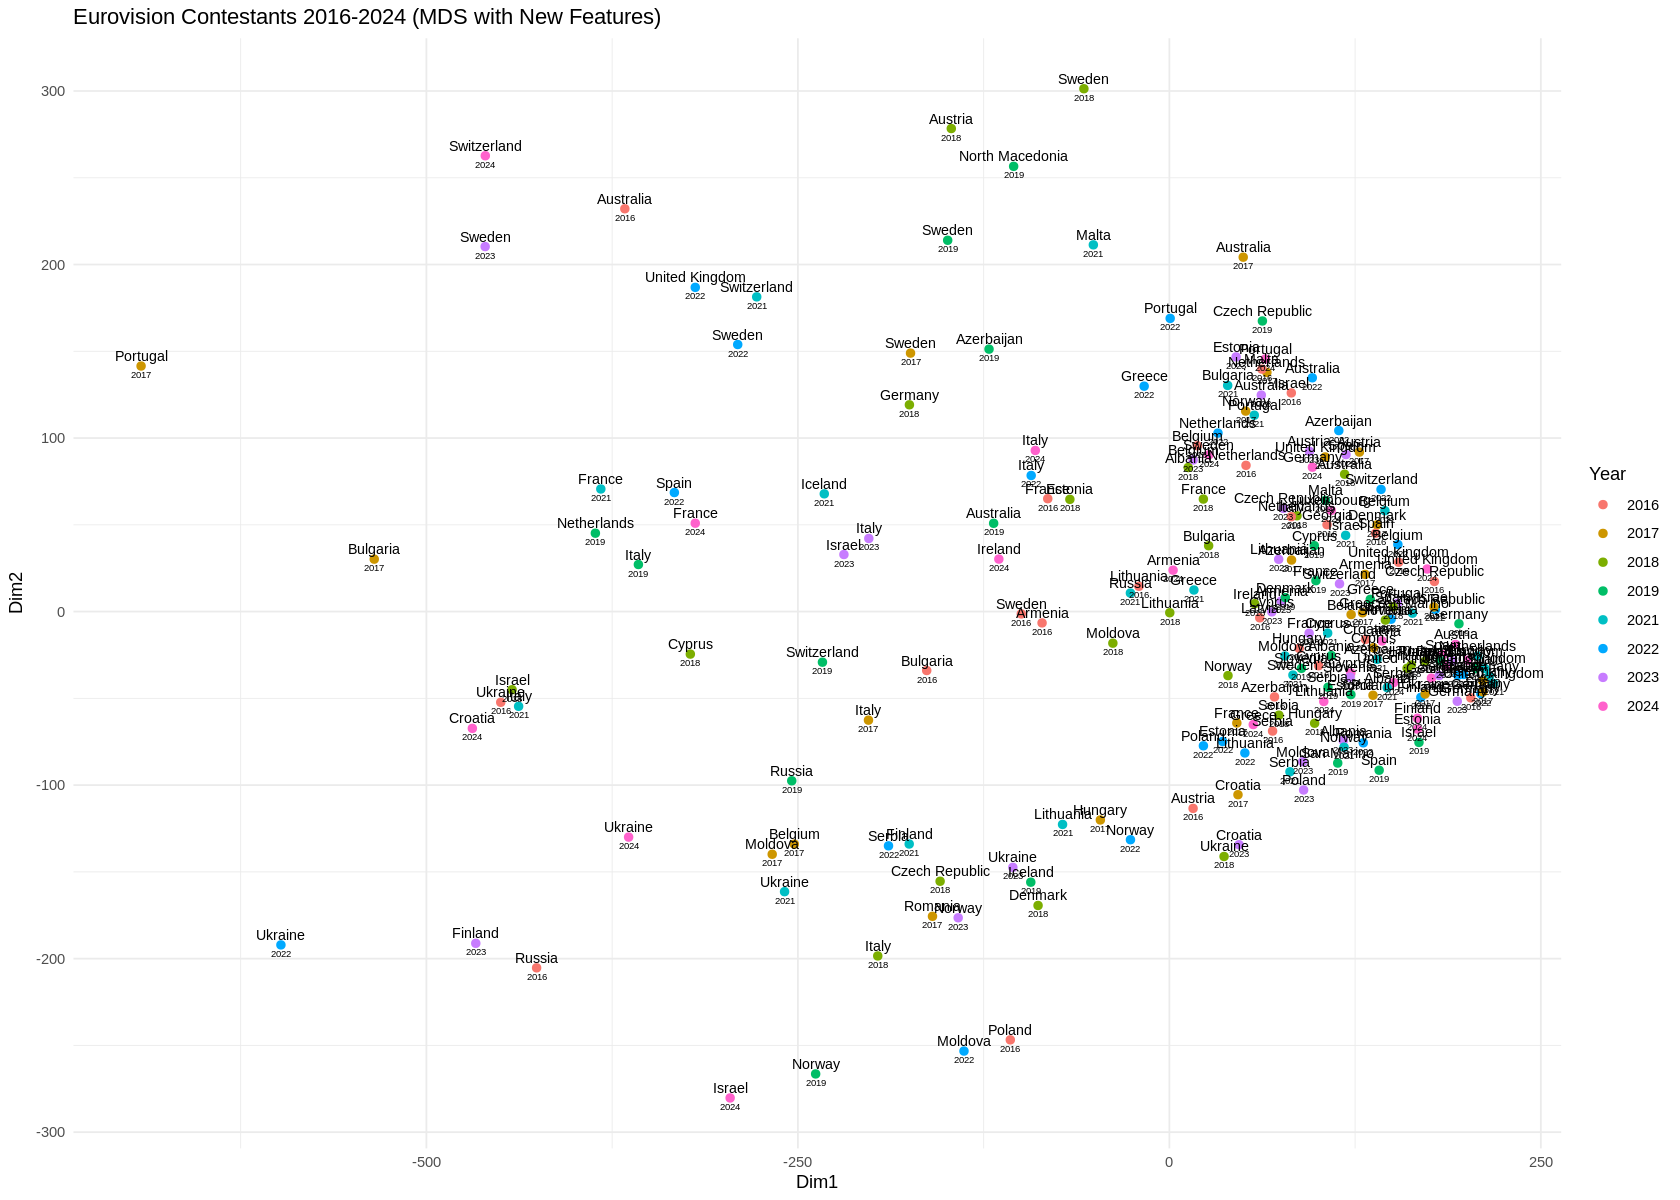

In [ ]:
# Prepare data for MDS and t-SNE with new features
df_dim_reduction <- df
df_dim_reduction[is.na(df_dim_reduction)] <- 0

# Select columns for dimensionality reduction including new features
dim_reduction_data <- df_dim_reduction[, c("Total.score", "Jury.score", "Televoting.score", "Score_Difference", "Score_Ratio")]

# Perform MDS with new features
dist.eurovision_new <- dist(dim_reduction_data)
cmd.eurovision_new <- cmdscale(dist.eurovision_new)

# Create a data frame with the new MDS results
mds_df_new <- data.frame(cmd.eurovision_new)
colnames(mds_df_new) <- c("Dim1", "Dim2")
mds_df_new$Contestant <- df_dim_reduction$Contestant
mds_df_new$Year <- df_dim_reduction$Year

# Visualize the new MDS results
ggplot(mds_df_new, aes(x = Dim1, y = Dim2)) +
  geom_point(aes(color = Year), size = 2) +
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) +
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) +
  ggtitle("Eurovision Contestants 2016-2024 (MDS with New Features)") +
  theme_minimal()

No afecta en nada al grafico que se tenia anterioremente, tal vez porque MDS representa distancia global o tal vez por lo que vimos anterioremente de que este grafico parece representar Diferencia entre los puntajes vs Puntaje Total

Performing PCA
Read the 206 x 5 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.03 seconds (sparsity = 0.569234)!
Learning embedding...
Iteration 50: error is 49.458728 (50 iterations in 0.03 seconds)
Iteration 100: error is 48.966417 (50 iterations in 0.03 seconds)
Iteration 150: error is 48.967317 (50 iterations in 0.02 seconds)
Iteration 200: error is 49.069592 (50 iterations in 0.02 seconds)
Iteration 250: error is 49.010424 (50 iterations in 0.03 seconds)
Iteration 300: error is 0.217635 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.208864 (50 iterations in 0.02 seconds)
Iteration 400: error is 0.208387 (50 iterations in 0.02 seconds)
Iteration 450: error is 0.207832 (50 iterations in 0.02 seconds)
Iteration 500: error is 0.208715 (50 iterations in 0.02 seconds)
Fitting performed in 0.24 seconds.


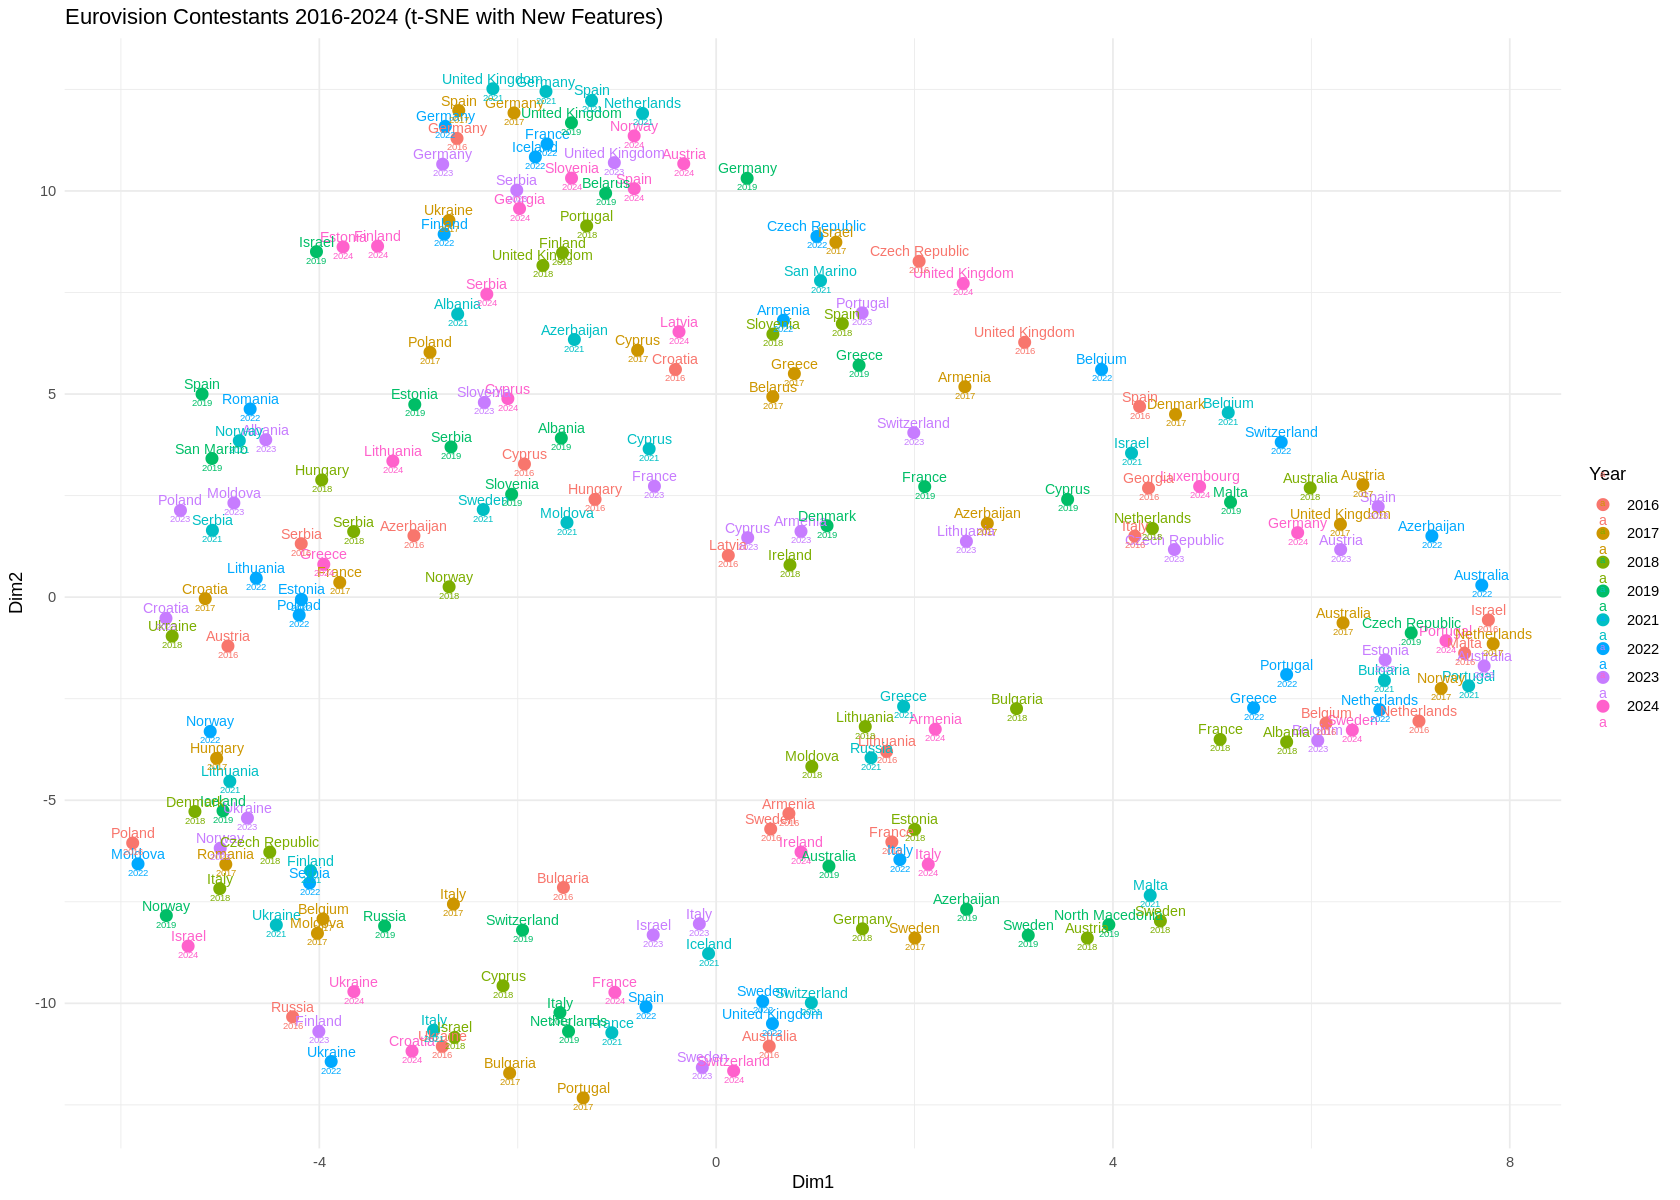

In [ ]:
# Perform t-SNE with new features
set.seed(123) # for reproducibility
tsne_results_new <- Rtsne(dim_reduction_data, dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

# Create a data frame with the new t-SNE results
tsne_df_new <- data.frame(tsne_results_new$Y)
colnames(tsne_df_new) <- c("Dim1", "Dim2")

# Add Contestant and Year information
tsne_df_new$Contestant <- df_dim_reduction$Contestant
tsne_df_new$Year <- df_dim_reduction$Year


# Visualize the new t-SNE results
ggplot(tsne_df_new, aes(x = Dim1, y = Dim2, color = Year)) +
  geom_point(size = 3) +
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) +
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) +
  ggtitle("Eurovision Contestants 2016-2024 (t-SNE with New Features)") +
  theme_minimal()

Para nuestro t-SNE si podemos notar nuevas agrupaciones que merecen ser analizadas con mas detalle

### Clustering en los resultados del nuevo t-SNE

Ahora aplicaremos un algoritmo de clustering (K-means) a las dimensiones de los resultados del t-SNE que incluyen las nuevas características para ver cómo se agrupan los países en este espacio reducido.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


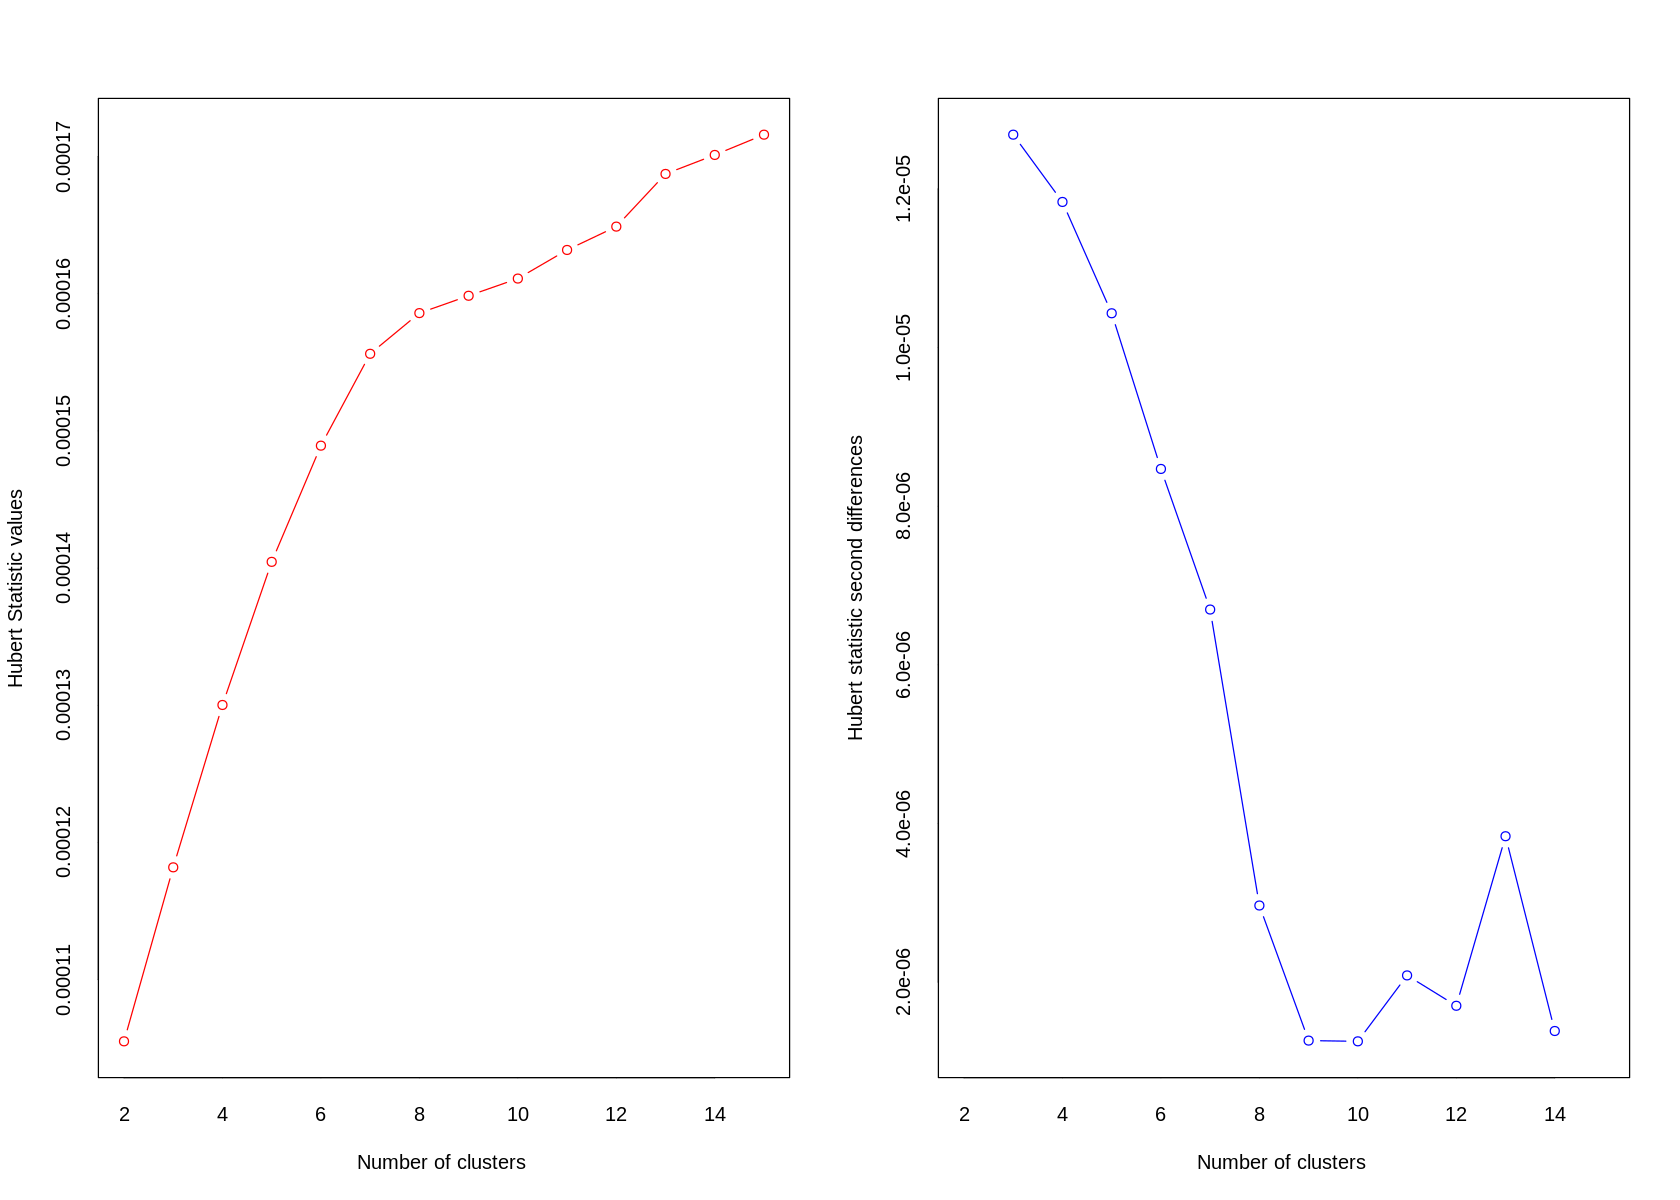

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 7 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 4 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


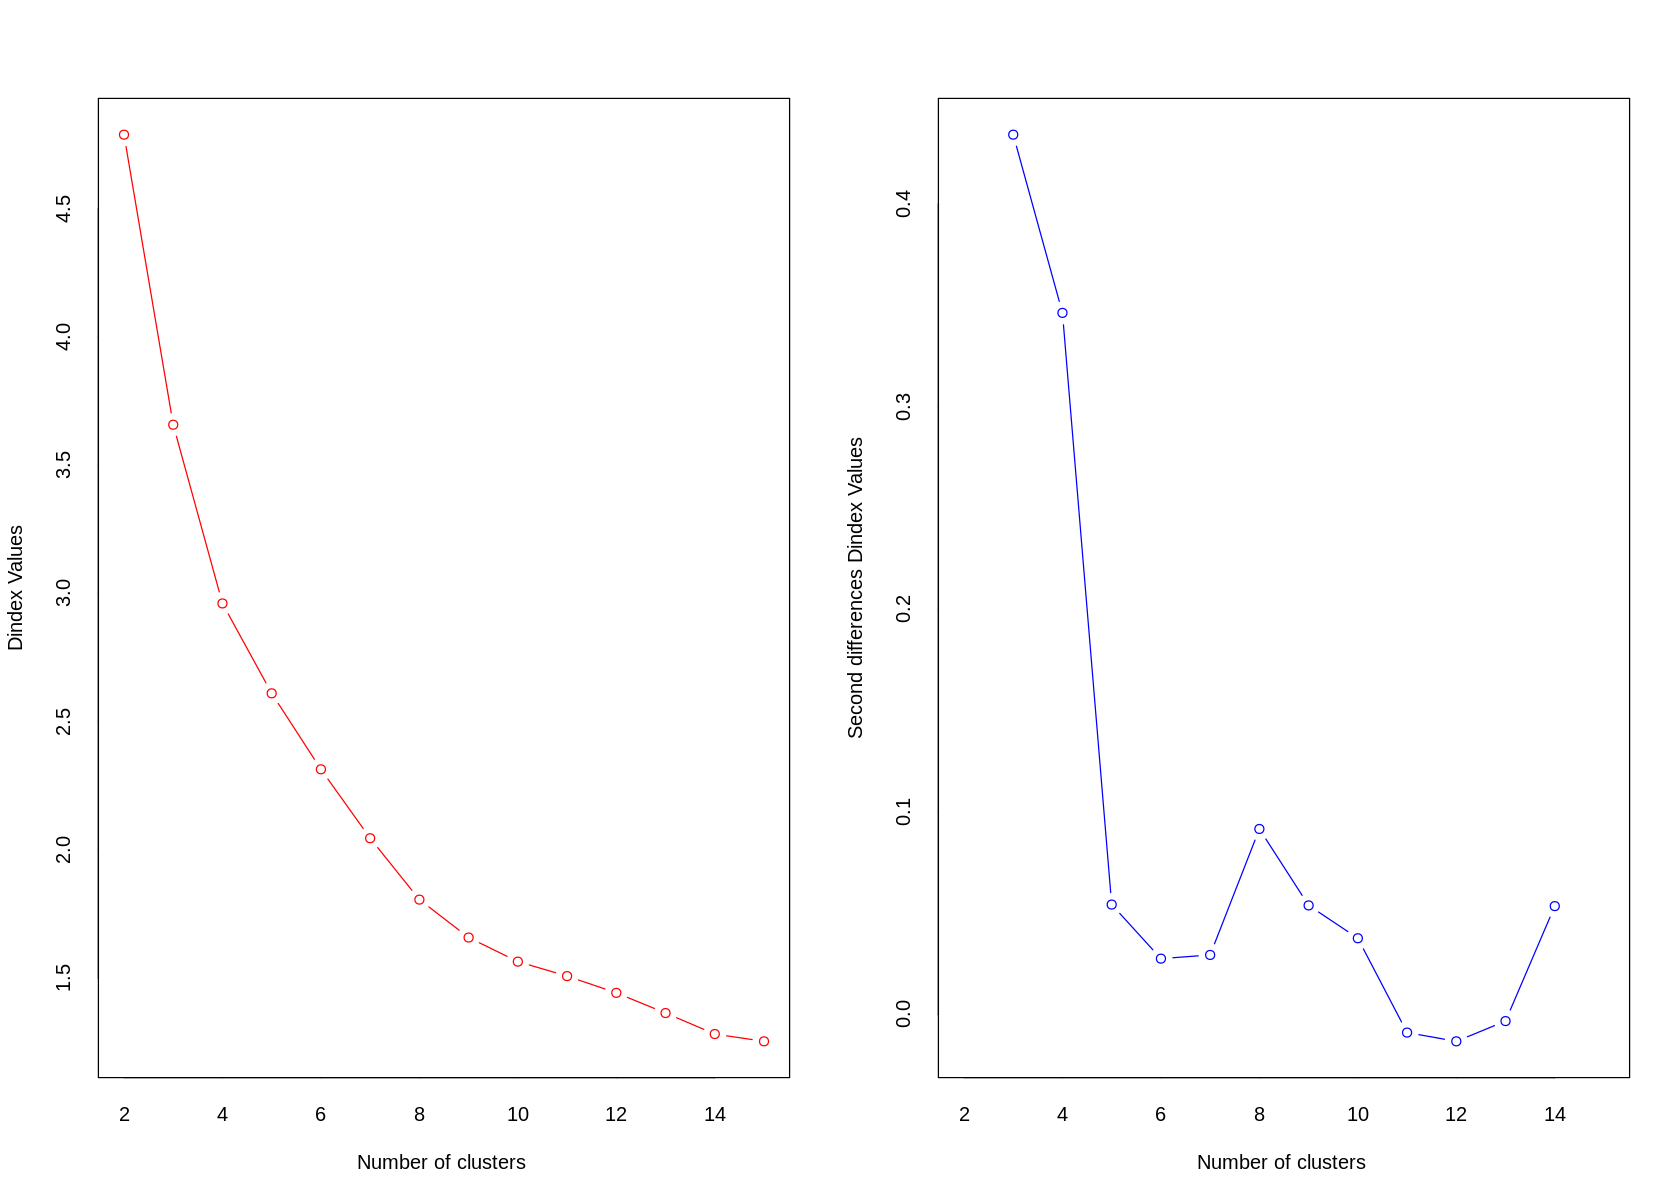

In [ ]:
# Determine the optimal number of clusters using NbClust on the new t-SNE results
# Consider 2 to 15 clusters
set.seed(123) # For reproducibility
nb_clust_tsne_new <- NbClust(data = tsne_df_new[, c("Dim1", "Dim2")], distance = "euclidean",
                            min.nc = 2, max.nc = 15, method = "kmeans")

Observa el resultado de `NbClust` para determinar el número recomendado de clusters basado en la mayoría de los índices.

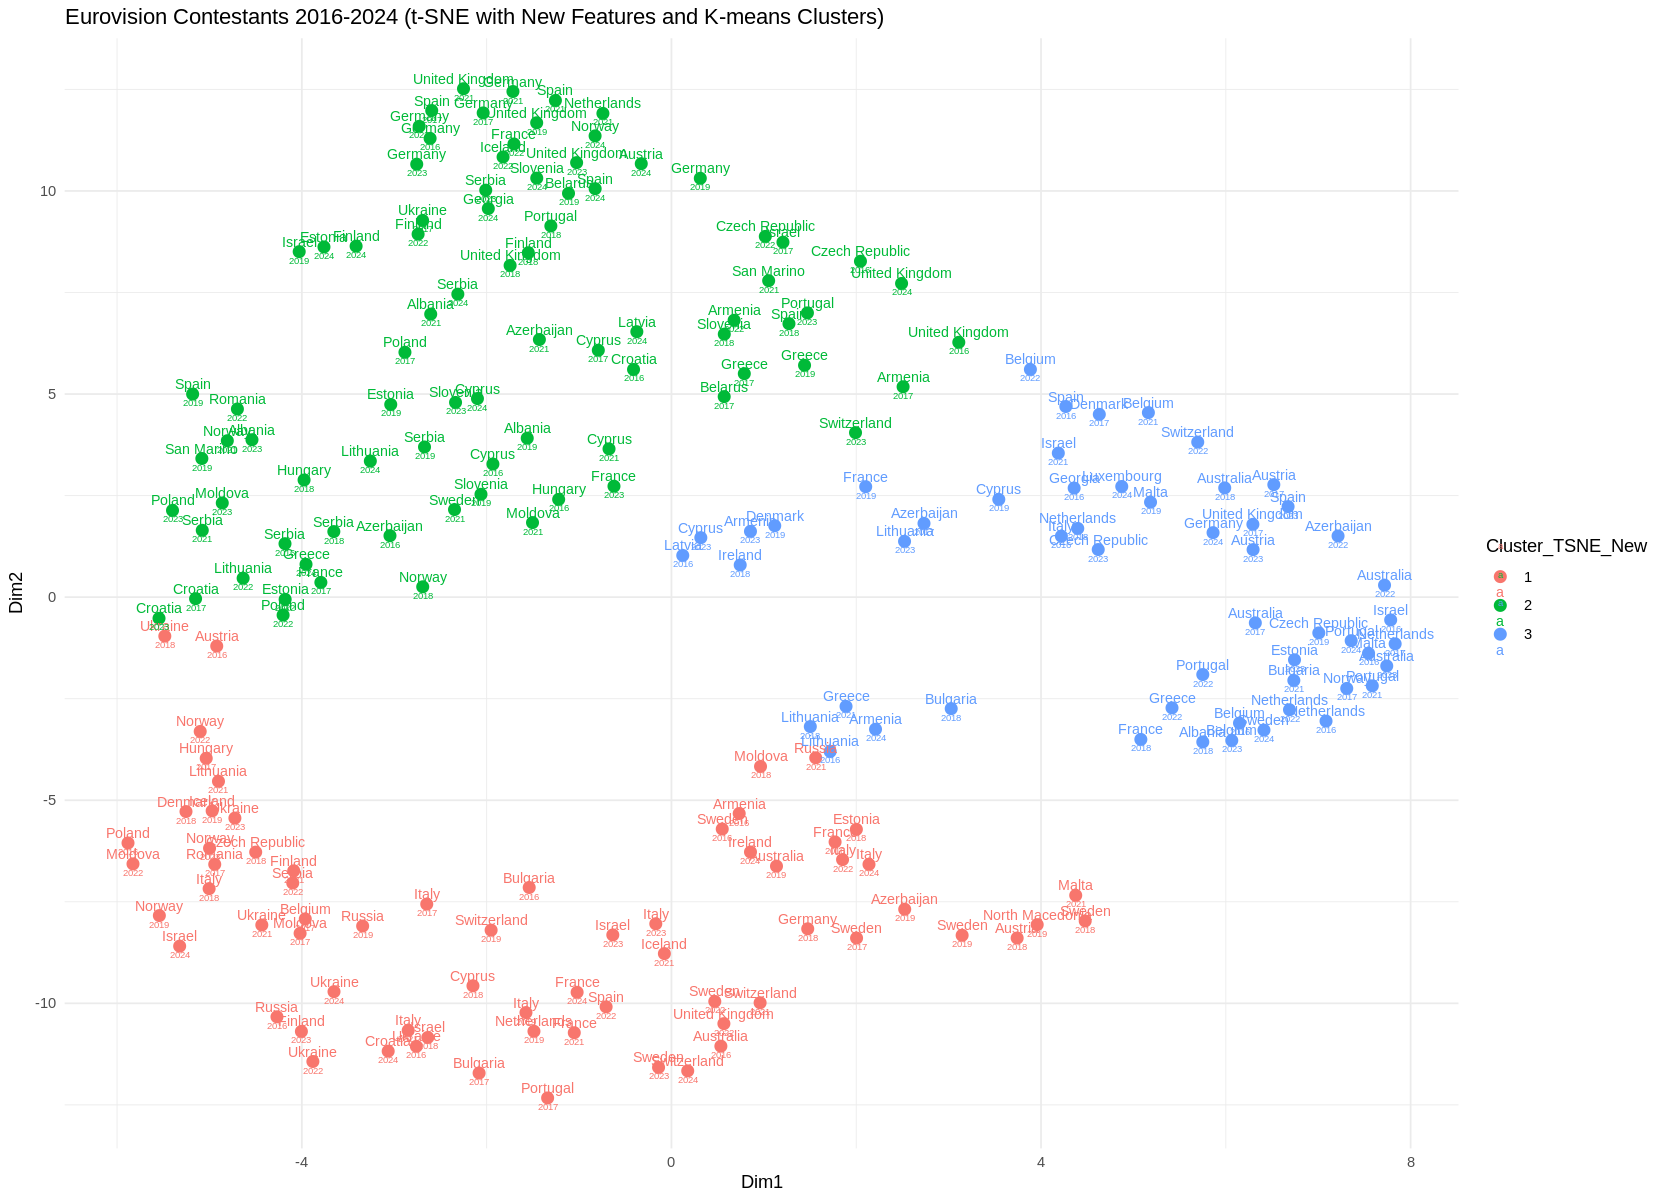

In [ ]:
# Perform K-means clustering on the new t-SNE results using the chosen number of clusters
# Replace 'chosen_number_of_clusters' with the number suggested by NbClust or based on your interpretation
set.seed(123) # for reproducibility
kmeans_result_tsne_new <- kmeans(tsne_df_new[, c("Dim1", "Dim2")], centers = 3) # Using 3 centers as before, but you can change this

# Add the cluster assignments to the tsne_df_new dataframe
tsne_df_new$Cluster_TSNE_New <- as.factor(kmeans_result_tsne_new$cluster)

# Visualize the clusters on the new t-SNE plot
ggplot(tsne_df_new, aes(x = Dim1, y = Dim2, color = Cluster_TSNE_New)) +
  geom_point(size = 3) + # Add points, colored by cluster
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) + # Add contestant labels
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) + # Add year labels
  ggtitle("Eurovision Contestants 2016-2024 (t-SNE with New Features and K-means Clusters)") + # Set title
  theme_minimal() # Use a minimal theme

## Con 4 clusters para comparar

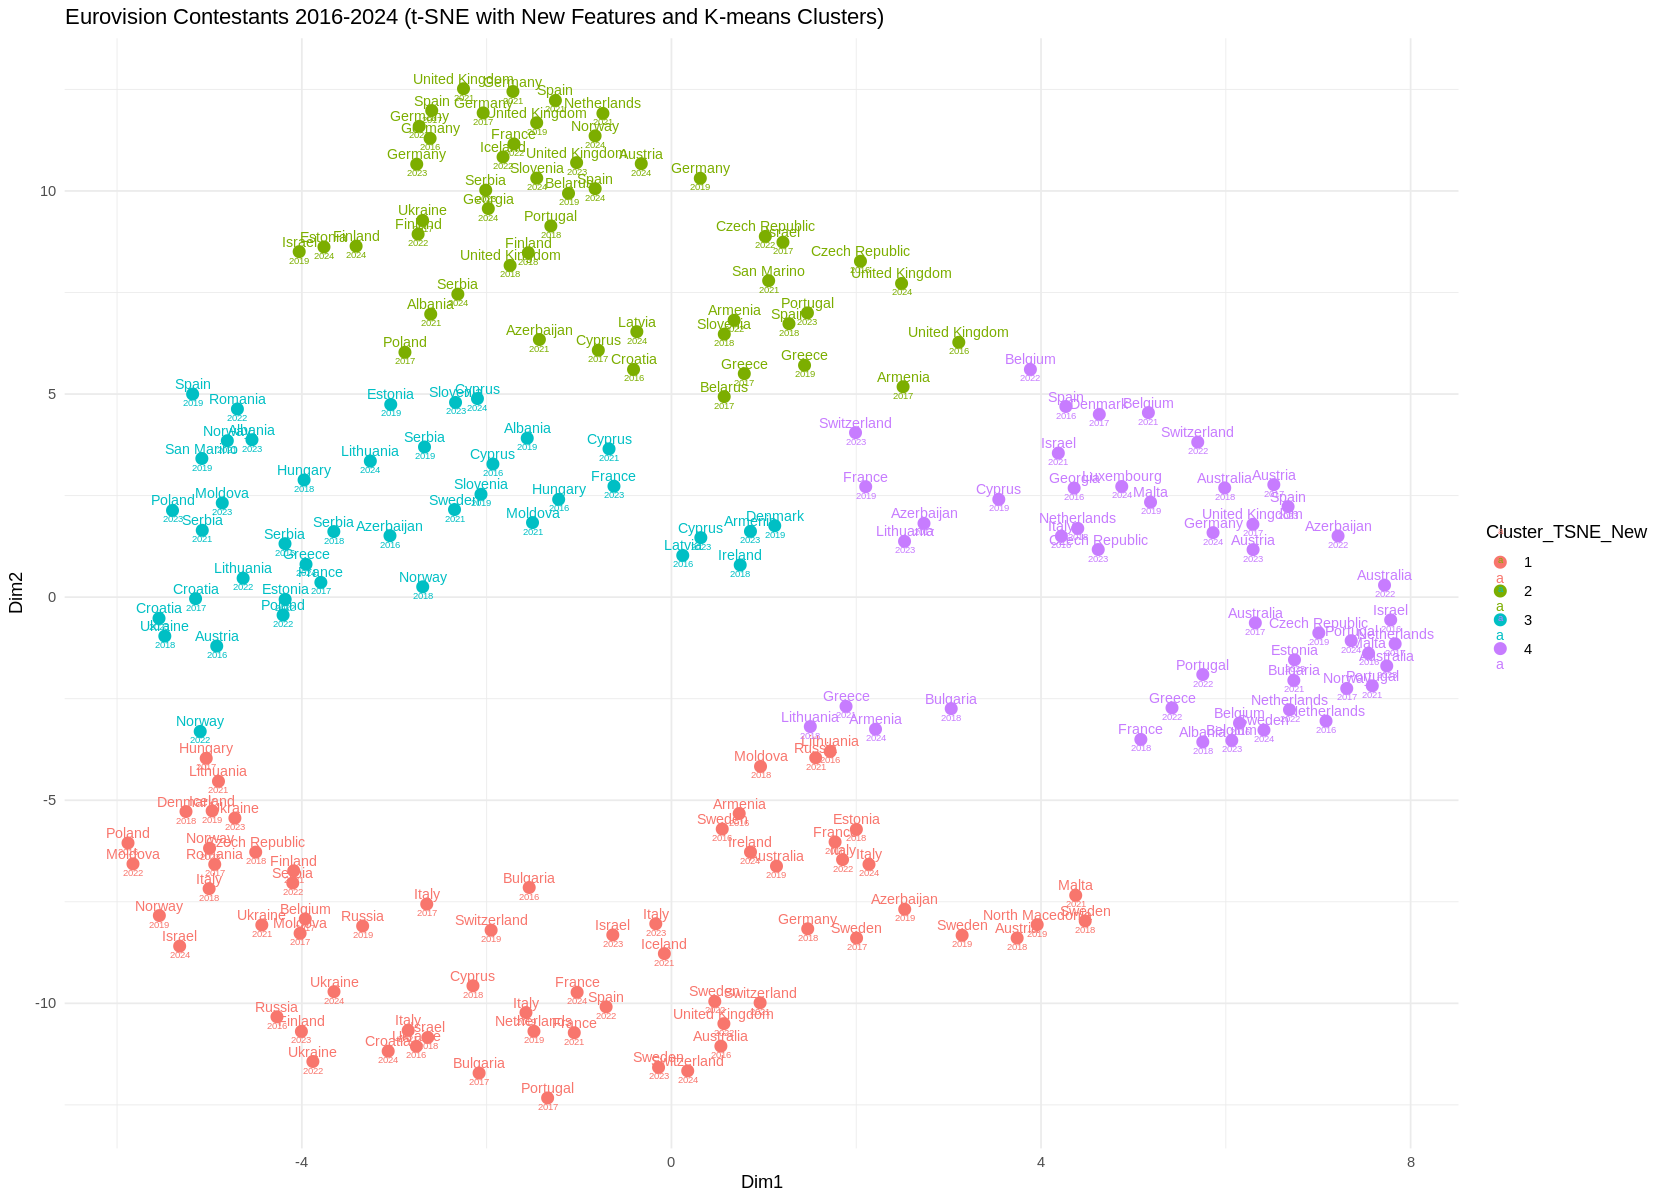

In [ ]:
# Perform K-means clustering on the new t-SNE results using the chosen number of clusters
# Replace 'chosen_number_of_clusters' with the number suggested by NbClust or based on your interpretation
set.seed(123) # for reproducibility
kmeans_result_tsne_new <- kmeans(tsne_df_new[, c("Dim1", "Dim2")], centers = 4)

# Add the cluster assignments to the tsne_df_new dataframe
tsne_df_new$Cluster_TSNE_New <- as.factor(kmeans_result_tsne_new$cluster)

# Visualize the clusters on the new t-SNE plot
ggplot(tsne_df_new, aes(x = Dim1, y = Dim2, color = Cluster_TSNE_New)) +
  geom_point(size = 3) + # Add points, colored by cluster
  geom_text(aes(label = Contestant), vjust = -0.5, hjust = 0.5, size = 3) + # Add contestant labels
  geom_text(aes(label = Year), vjust = 2, hjust = 0.5, size = 2) + # Add year labels
  ggtitle("Eurovision Contestants 2016-2024 (t-SNE with New Features and K-means Clusters)") + # Set title
  theme_minimal() # Use a minimal theme

Nos quedaremos con n = 4, dado que nos da un grupo con los concursantes que entraron al top 10. Un grupo con los concursantes en los ultimos 5 puestos, y luego dos grupos con los concursantes intermedios, en donde el cluster de la izquierda representa los que fueron preferidos por el publico y el de la derecha los preferidos por el jurado.

# Task
Analyze the clusters from the t-SNE visualization with new features to understand their characteristics and interpret their meaning in the context of Eurovision voting dynamics.

## Assign clusters to data

### Subtask:
Add the cluster assignments from the t-SNE with new features analysis back to the original dataframe.


**Reasoning**:
Add the cluster assignments from the t-SNE with new features analysis back to the original dataframe and display the updated dataframe.



In [ ]:
# Add the cluster assignments from the new t-SNE results to the original dataframe
# Ensure the order of rows is consistent between tsne_df_new and df.
# Since tsne_df_new was created directly from df_dim_reduction which was a copy of df,
# the order should be consistent.
df$Cluster_TSNE_New <- tsne_df_new$Cluster_TSNE_New

# Display the first few rows of the updated dataframe
head(df)

Year Contestant  Total.score Jury.score Televoting.score Score_Difference
182 2024 Switzerland 591         365        226               139            
183 2024 Croatia     547         210        337              -127            
184 2024 Ukraine     453         146        307              -161            
185 2024 France      445         218        227                -9            
186 2024 Israel      375          52        323              -271            
187 2024 Ireland     278         142        136                 6            
    Score_Ratio Cluster_TSNE_New
182 1.6150442   1               
183 0.6231454   1               
184 0.4755700   1               
185 0.9603524   1               
186 0.1609907   1               
187 1.0441176   1

## Analyze cluster characteristics

### Subtask:
Calculate summary statistics (mean, median, etc.) for key variables (Total.score, Jury.score, Televoting.score, Score_Difference, Score_Ratio) for each cluster.


**Reasoning**:
Calculate summary statistics for key variables within each cluster and display the results.



In [ ]:
# Group by the new t-SNE cluster and calculate summary statistics
cluster_summary <- df %>%
  group_by(Cluster_TSNE_New) %>%
  summarise(
    across(c(Total.score, Jury.score, Televoting.score, Score_Difference, Score_Ratio),
           list(mean = mean, median = median, sd = sd, min = min, max = max),
           na.rm = TRUE)
  )

# Display the summary statistics
cluster_summary

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(...)`.
ℹ In group 1: `Cluster_TSNE_New = 1`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


Cluster_TSNE_New Total.score_mean Total.score_median Total.score_sd
1 1                367.9394         341                125.26303     
2 2                 39.0000          38                 23.04034     
3 3                109.3415         109                 26.89945     
4 4                135.4082         129                 38.01640     
  Total.score_min Total.score_max Jury.score_mean Jury.score_median
1 200             758             162.62121       152.5            
2   0              83              22.72000        20.0            
3  54             182              37.46341        36.0            
4  64             215             106.38776       100.0            
  Jury.score_sd Jury.score_min ⋯ Score_Difference_mean Score_Difference_median
1 87.44629       7             ⋯ -42.69697             -29.0                  
2 16.77953       0             ⋯   6.44000               4.5                  
3 18.52849       1             ⋯ -34.41463             -37.0                  
4 29.12961      59             ⋯  77.36735              76.0                  
  Score_Difference_sd Score_Difference_min Score_Difference_max
1 123.11870           -271                 232                 
2  18.04774            -35                  46                 
3  33.69345           -110                  18                 
4  35.84149             -1                 169                 
  Score_Ratio_mean Score_Ratio_median Score_Ratio_sd Score_Ratio_min
1 1.1561238        0.8415674           1.618896      0.03153153     
2 1.4244995        1.0000000           1.650513      0.00000000     
3 0.5885403        0.5066667           0.364403      0.01886792     
4 8.8206128        4.1500000          15.181339      0.00000000     
  Score_Ratio_max
1 12.047619      
2  6.800000      
3  1.352941      
4 85.500000

## Identify key countries in clusters

### Subtask:
List the countries and years that fall into each cluster to identify notable participants.


**Reasoning**:
To list the countries and years within each cluster, I will group the dataframe by the cluster assignment and print the Contestant and Year columns for each group.



In [ ]:
# Explicitly add the cluster assignments from the new t-SNE results to the dataframe
df$Cluster_TSNE_New <- tsne_df_new$Cluster_TSNE_New

# Group the dataframe by the new t-SNE cluster
clustered_countries <- df %>%
  group_by(Cluster_TSNE_New)

# Print the countries and years for each cluster
print("Countries and Years in Each Cluster:")
clustered_countries %>%
  group_walk(~ {
    cat("Cluster:", .$Cluster_TSNE_New[1], "\n")
    print(select(., Contestant, Year))
    cat("\n")
  })

[1] "Countries and Years in Each Cluster:"


Warning message:
“Unknown or uninitialised column: `Cluster_TSNE_New`.”


Cluster: 
# A tibble: 66 × 2
   Contestant  Year 
   <chr>       <fct>
 1 Switzerland 2024 
 2 Croatia     2024 
 3 Ukraine     2024 
 4 France      2024 
 5 Israel      2024 
 6 Ireland     2024 
 7 Italy       2024 
 8 Sweden      2023 
 9 Finland     2023 
10 Israel      2023 
# ℹ 56 more rows



Warning message:
“Unknown or uninitialised column: `Cluster_TSNE_New`.”


Cluster: 
# A tibble: 50 × 2
   Contestant     Year 
   <chr>          <fct>
 1 Latvia         2024 
 2 Serbia         2024 
 3 United Kingdom 2024 
 4 Finland        2024 
 5 Estonia        2024 
 6 Georgia        2024 
 7 Spain          2024 
 8 Slovenia       2024 
 9 Austria        2024 
10 Norway         2024 
# ℹ 40 more rows



Warning message:
“Unknown or uninitialised column: `Cluster_TSNE_New`.”


Cluster: 
# A tibble: 41 × 2
   Contestant Year 
   <chr>      <fct>
 1 Greece     2024 
 2 Lithuania  2024 
 3 Cyprus     2024 
 4 Cyprus     2023 
 5 Croatia    2023 
 6 Armenia    2023 
 7 France     2023 
 8 Moldova    2023 
 9 Poland     2023 
10 Slovenia   2023 
# ℹ 31 more rows



Warning message:
“Unknown or uninitialised column: `Cluster_TSNE_New`.”


Cluster: 
# A tibble: 49 × 2
   Contestant     Year 
   <chr>          <fct>
 1 Armenia        2024 
 2 Sweden         2024 
 3 Portugal       2024 
 4 Germany        2024 
 5 Luxembourg     2024 
 6 Belgium        2023 
 7 Estonia        2023 
 8 Australia      2023 
 9 Czech Republic 2023 
10 Lithuania      2023 
# ℹ 39 more rows



## Visualize cluster characteristics

### Subtask:
Create visualizations (e.g., box plots, bar plots) to compare the distributions of key variables across the clusters.


**Reasoning**:
Create box plots for the key variables across the clusters to visualize their distributions.



In [ ]:
# Create box plots for key variables across the clusters
plot_total_score <- ggplot(df, aes(x = Cluster_TSNE_New, y = Total.score, fill = Cluster_TSNE_New)) +
  geom_boxplot() +
  ggtitle("Total Score Distribution by Cluster") +
  xlab("Cluster") +
  ylab("Total Score") +
  theme_minimal()

plot_jury_score <- ggplot(df, aes(x = Cluster_TSNE_New, y = Jury.score, fill = Cluster_TSNE_New)) +
  geom_boxplot() +
  ggtitle("Jury Score Distribution by Cluster") +
  xlab("Cluster") +
  ylab("Jury Score") +
  theme_minimal()

plot_televoting_score <- ggplot(df, aes(x = Cluster_TSNE_New, y = Televoting.score, fill = Cluster_TSNE_New)) +
  geom_boxplot() +
  ggtitle("Televoting Score Distribution by Cluster") +
  xlab("Cluster") +
  ylab("Televoting Score") +
  theme_minimal()

plot_score_difference <- ggplot(df, aes(x = Cluster_TSNE_New, y = Score_Difference, fill = Cluster_TSNE_New)) +
  geom_boxplot() +
  ggtitle("Score Difference (Jury - Televoting) Distribution by Cluster") +
  xlab("Cluster") +
  ylab("Score Difference") +
  theme_minimal()

plot_score_ratio <- ggplot(df, aes(x = Cluster_TSNE_New, y = Score_Ratio, fill = Cluster_TSNE_New)) +
  geom_boxplot() +
  ggtitle("Score Ratio (Jury / Televoting) Distribution by Cluster") +
  xlab("Cluster") +
  ylab("Score Ratio") +
  theme_minimal()


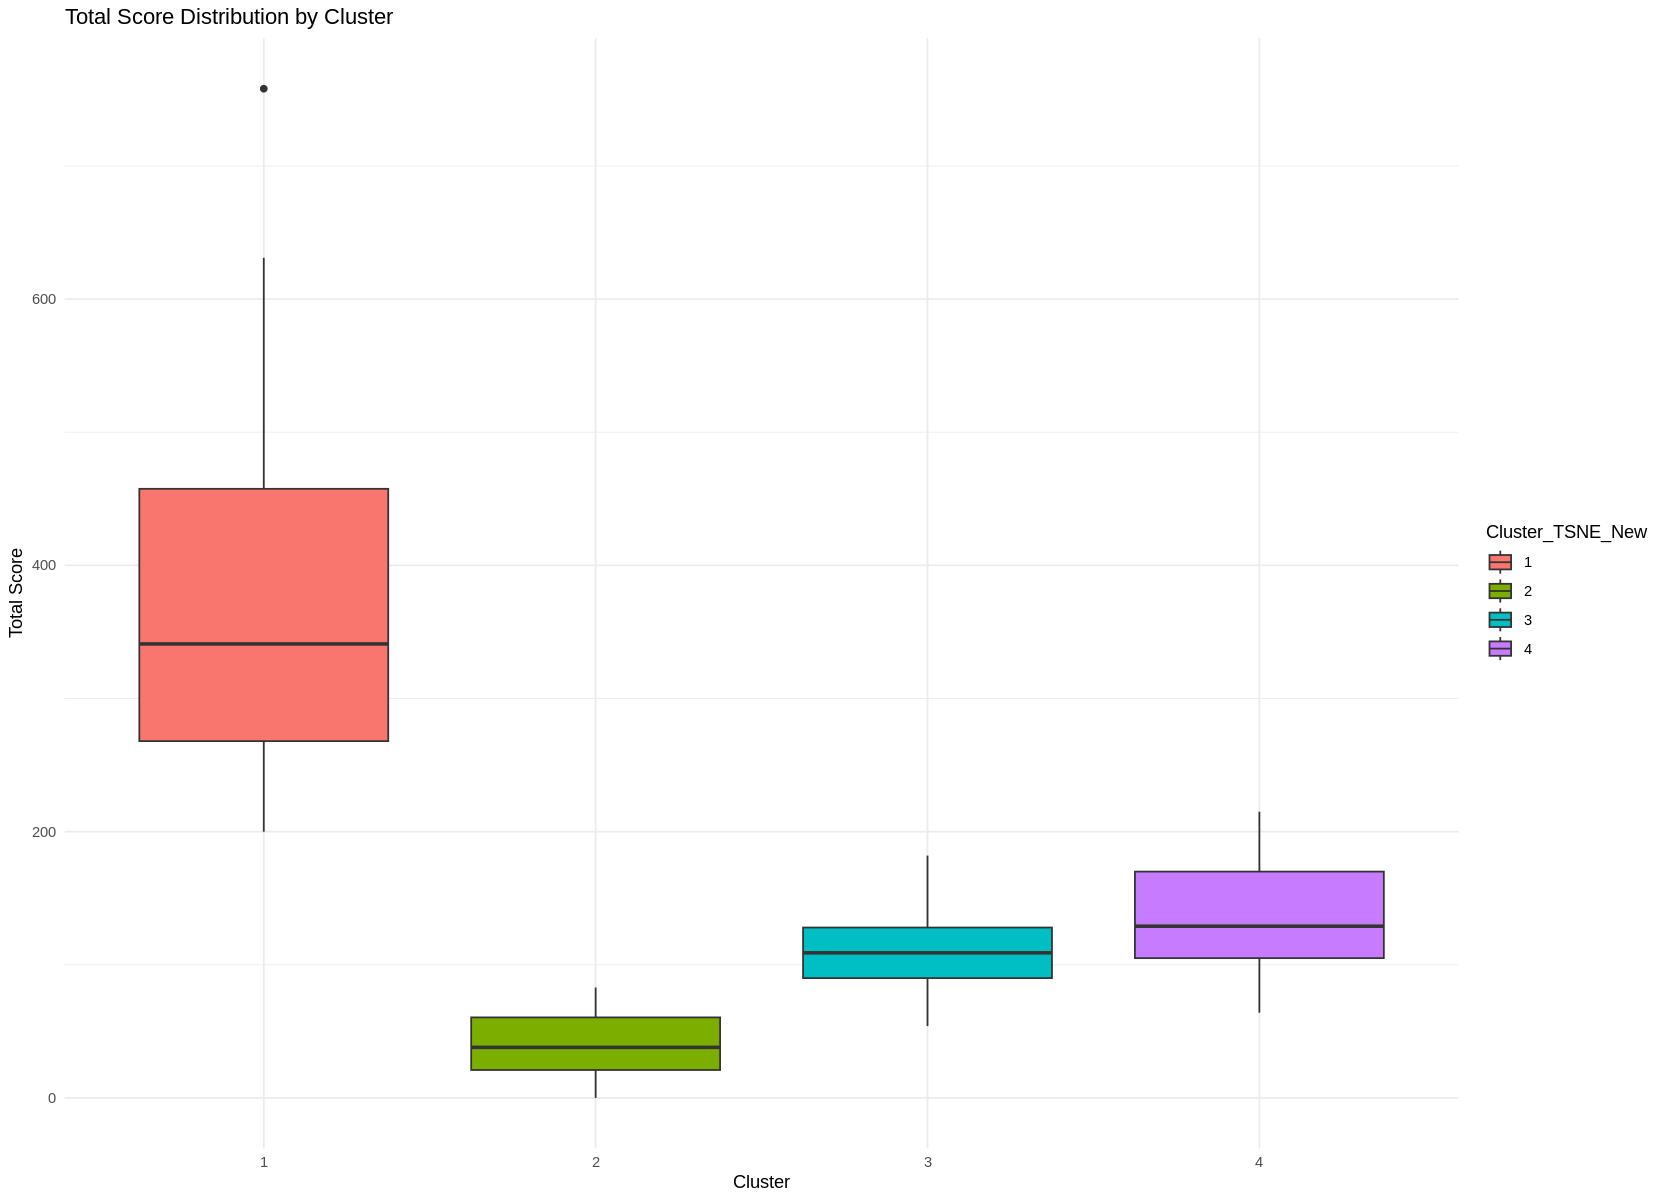

In [ ]:
# Display the plots
print(plot_total_score)

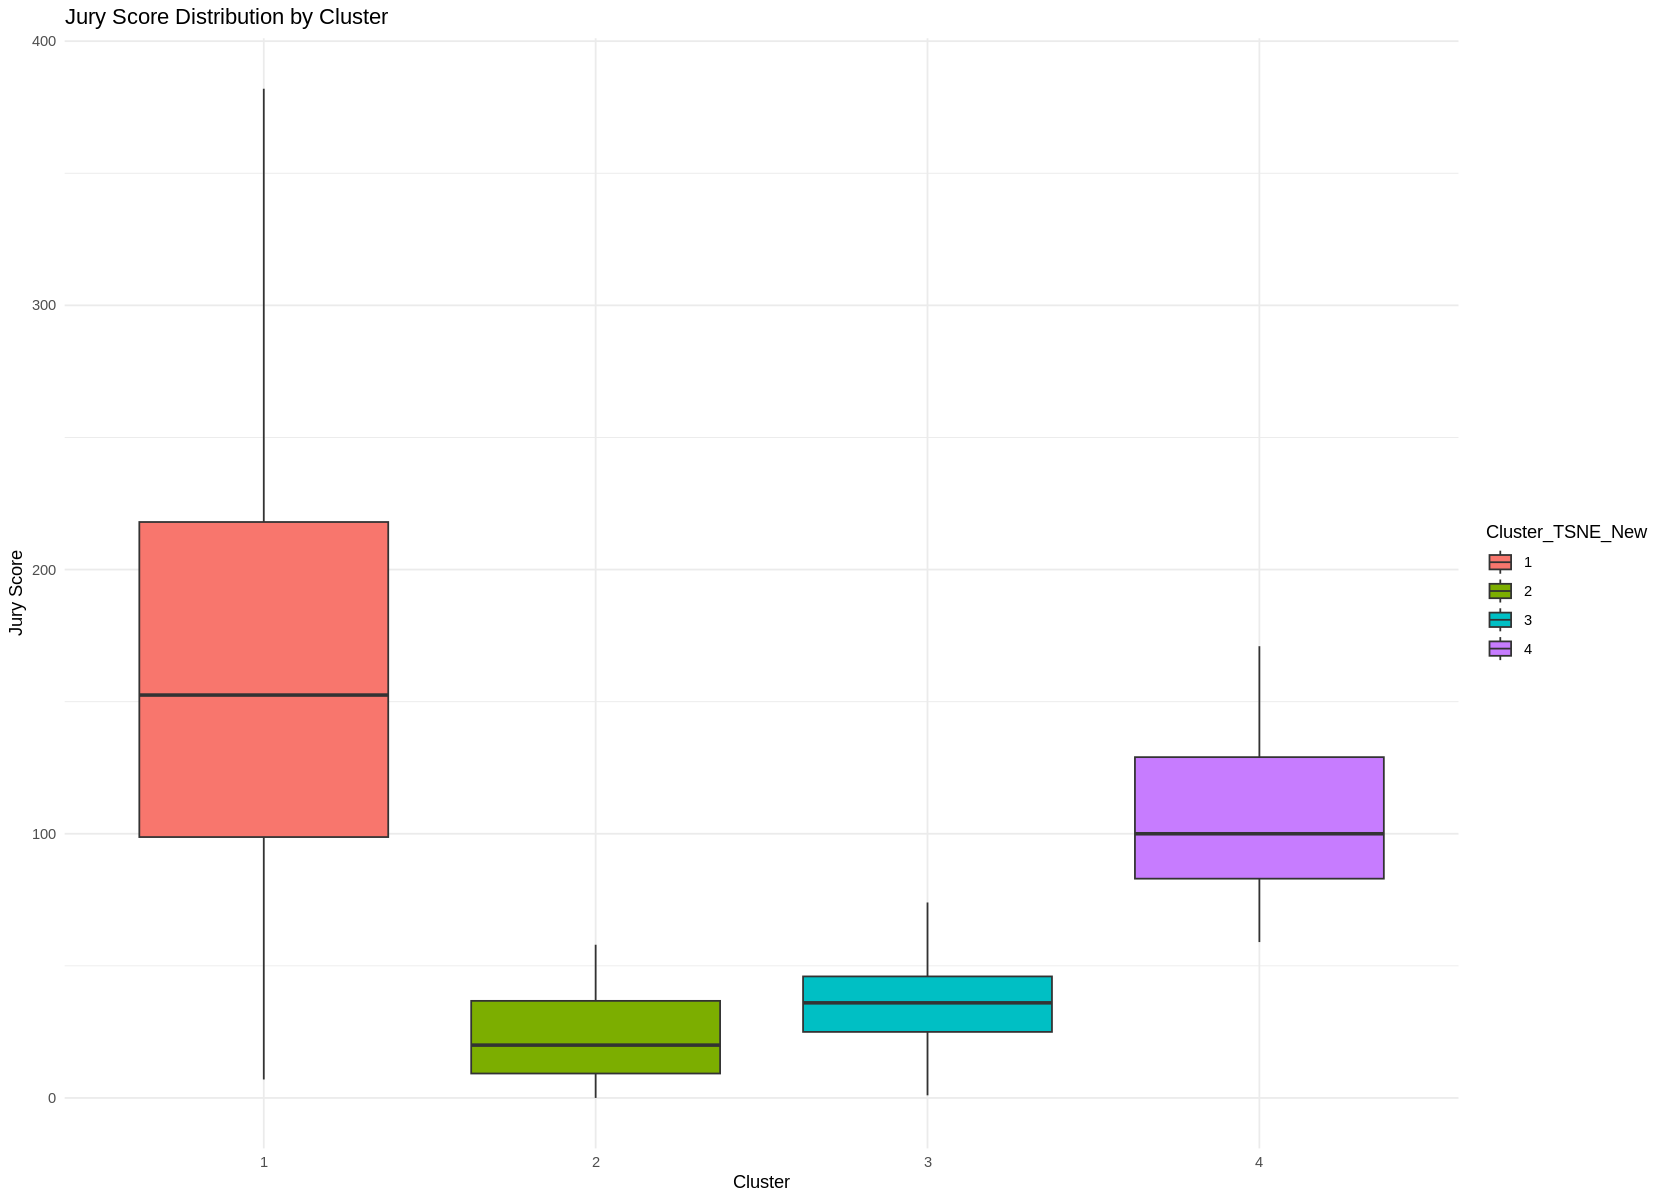

In [ ]:
print(plot_jury_score)

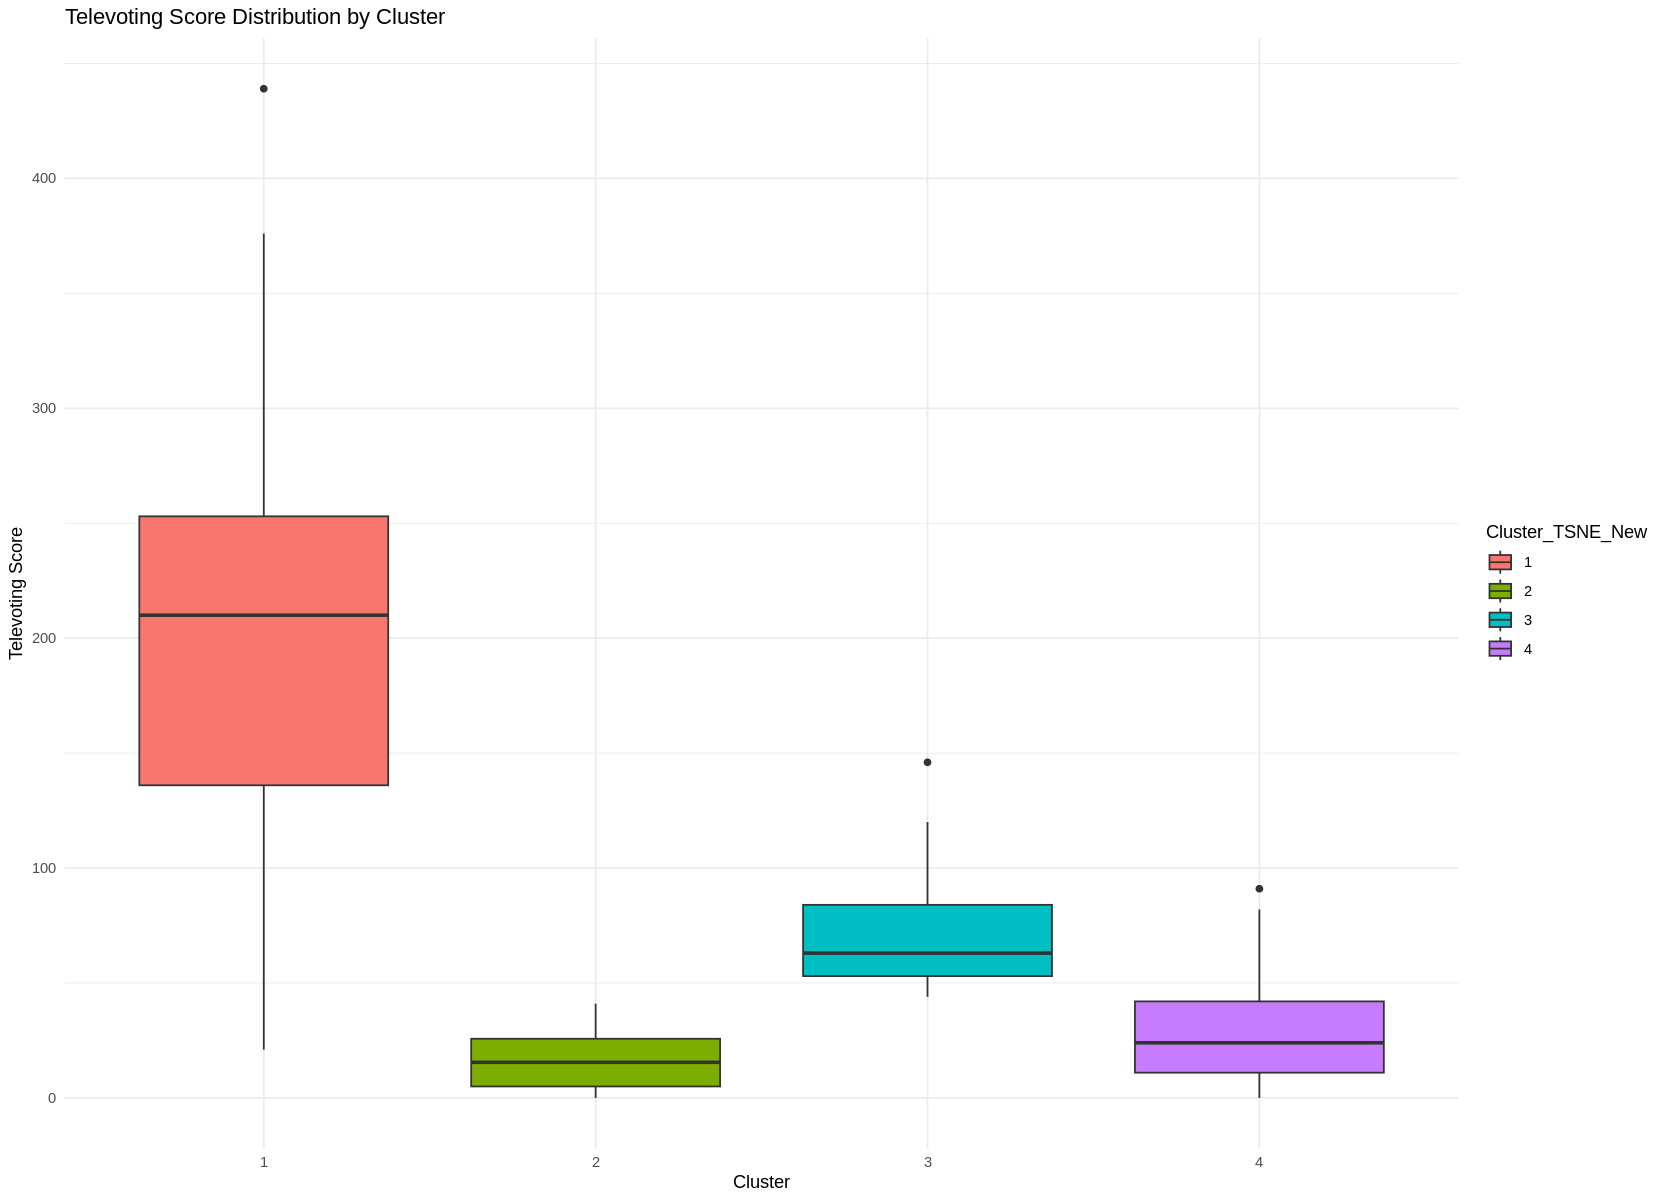

In [ ]:
print(plot_televoting_score)

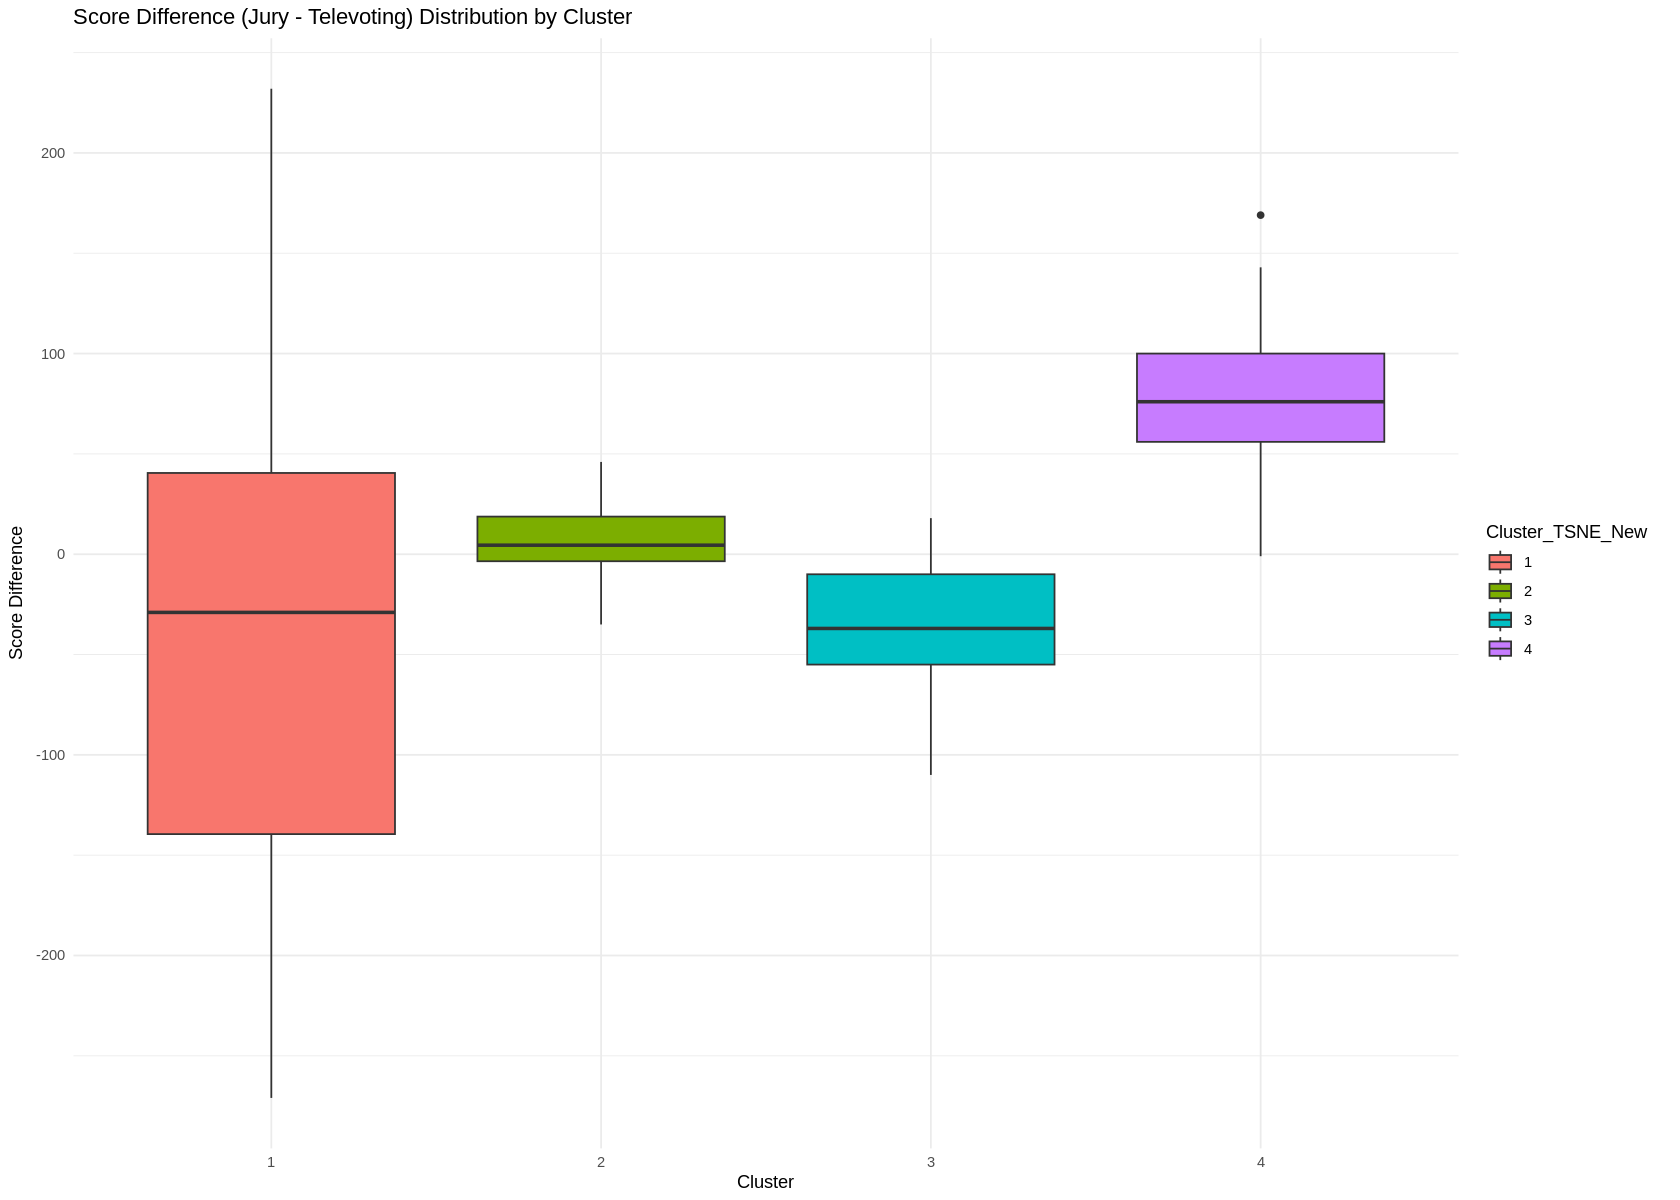

In [ ]:
print(plot_score_difference)

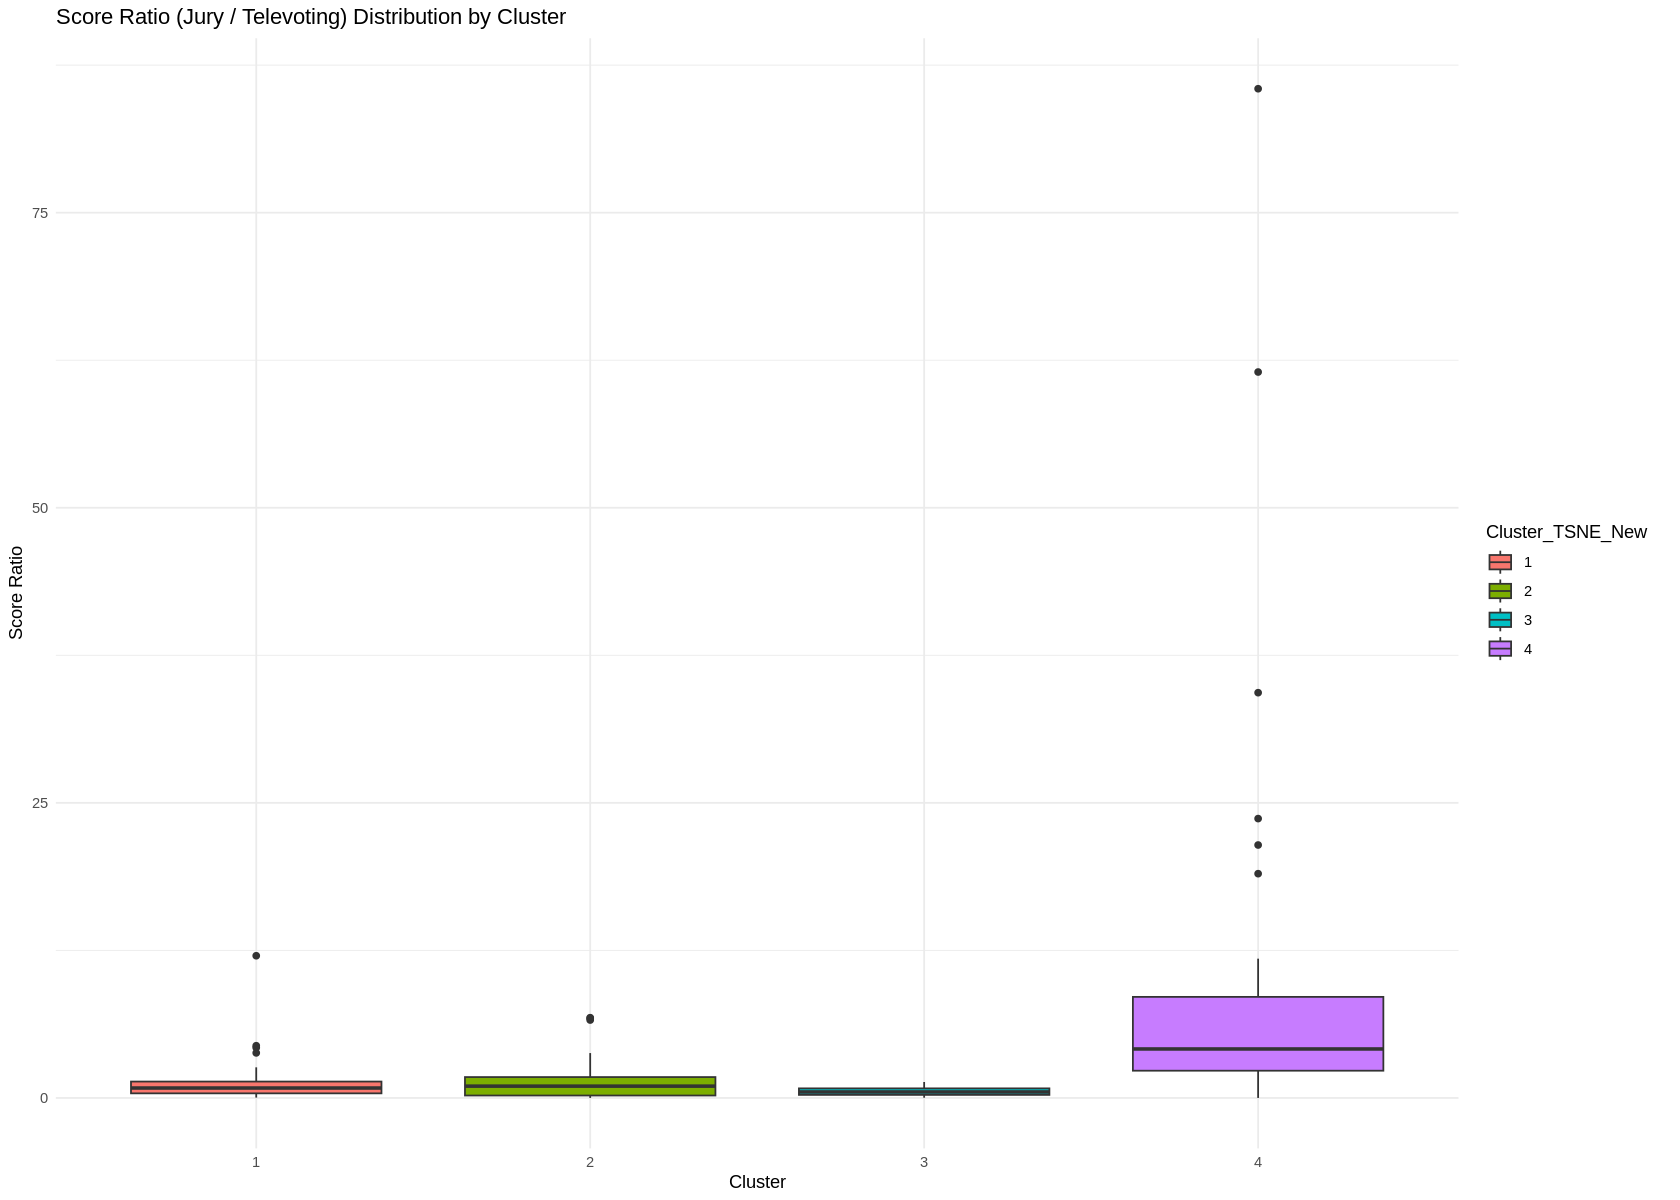

In [ ]:
print(plot_score_ratio)

## Summarize cluster interpretations

### Subtask:
Based on the analysis, describe the characteristics that define each cluster and what insights they provide about Eurovision voting dynamics.


## Summary:

### Data Analysis Key Findings

*   Four clusters were identified in the t-SNE visualization with new features (Score\_Difference and Score\_Ratio).
*   Cluster 1 is characterized by high average Total, Jury, and Televoting scores, suggesting it represents entries that performed well overall, receiving strong support from both juries and televoters.
*   Cluster 2 is defined by very low average Total, Jury, and Televoting scores, indicating entries that performed poorly and received low scores from both voting bodies.
*   Cluster 3 shows moderate average scores across the board, with a relatively balanced contribution from both jury and televoting.
*   Cluster 4 exhibits a very high average Score\_Ratio, implying a significant disparity between jury and televoting scores, with televoting scores being considerably higher than jury scores for the entries in this cluster.

### Insights or Next Steps

*   The clusters reveal distinct patterns in voting behavior: successful entries (Cluster 1), unsuccessful entries (Cluster 2), moderately performing and balanced entries (Cluster 3), and entries strongly favored by televoters over juries (Cluster 4).
*   Further investigation into the specific countries and years within Cluster 4 could provide insights into potential biases or trends in televoting versus jury voting for certain participants or time periods.


Podemos observar que los boxplots y las conclusiones de Gemini reafirman en buena parte mis propias conclusiones sobre la division de los clusters. Notemos como los boxplots resaltan la diferencia entre la forma de votar del publico a la del jurado, los concursantes en el cluster 4 que poseen mayor puntaje del jurado son tambien los que tienen mayor diferencia de puntaje entre televoto y jurado.



## Analizar la frecuencia en la que sale cada pais en los clusters

In [ ]:
# Contar la frecuencia de paises por cluster
cluster_counts <- df %>%
  group_by(Contestant, Cluster_TSNE_New) %>%
  summarise(Count = n()) %>%
  ungroup() %>%
  pivot_wider(names_from = Cluster_TSNE_New, values_from = Count, values_fill = 0)

print(cluster_counts)

`summarise()` has grouped output by 'Contestant'. You can override using the
`.groups` argument.


# A tibble: 43 × 5
   Contestant   `2`   `3`   `4`   `1`
   <chr>      <int> <int> <int> <int>
 1 Albania        1     2     1     0
 2 Armenia        2     1     1     1
 3 Australia      0     0     4     2
 4 Austria        1     1     2     1
 5 Azerbaijan     1     1     2     1
 6 Belarus        2     0     0     0
 7 Belgium        0     0     4     1
 8 Bulgaria       0     0     2     2
 9 Croatia        1     2     0     1
10 Cyprus         1     4     1     1
# ℹ 33 more rows


In [ ]:
# Get the names of the cluster columns (excluding 'Contestant')
cluster_cols <- colnames(cluster_counts)[-1]

# Create variables to store the top 5 contestants for each cluster
for (cluster_col in cluster_cols) {
  cat("Top 5 Contestants in Cluster:", cluster_col, "\n")

  # Order the dataframe by the current cluster count in descending order
  top_contestants <- cluster_counts %>%
    arrange(desc(!!sym(cluster_col))) %>%
    head(5) # Select the top 5

  # Assign the result to a variable with a dynamic name
  assign(paste0("top_5_cluster_", cluster_col), top_contestants)

  # Print the top 5 for the current cluster
  print(top_contestants)
  cat("\n")
}

Top 5 Contestants in Cluster: 2 
# A tibble: 5 × 5
  Contestant       `2`   `3`   `4`   `1`
  <chr>          <int> <int> <int> <int>
1 Germany            6     0     1     1
2 United Kingdom     6     0     1     1
3 Spain              4     1     2     1
4 Finland            3     0     0     2
5 Armenia            2     1     1     1

Top 5 Contestants in Cluster: 3 
# A tibble: 5 × 5
  Contestant   `2`   `3`   `4`   `1`
  <chr>      <int> <int> <int> <int>
1 Cyprus         1     4     1     1
2 Serbia         2     4     0     1
3 Norway         1     3     1     2
4 Albania        1     2     1     0
5 Croatia        1     2     0     1

Top 5 Contestants in Cluster: 4 
# A tibble: 5 × 5
  Contestant    `2`   `3`   `4`   `1`
  <chr>       <int> <int> <int> <int>
1 Australia       0     0     4     2
2 Belgium         0     0     4     1
3 Netherlands     1     0     4     1
4 Portugal        2     0     3     1
5 Austria         1     1     2     1

Top 5 Contestants in Cluster: 1 

In [ ]:
top_5_cluster_1 = subset(top_5_cluster_1, select = c('Contestant', '1'))
colnames(top_5_cluster_1)[colnames(top_5_cluster_1) == '1'] = "Top 10"
top_5_cluster_1

Contestant Top 10
1 Italy      7     
2 Sweden     6     
3 Ukraine    5     
4 France     3     
5 Israel     3

In [ ]:
top_5_cluster_2 = subset(top_5_cluster_2, select = c('Contestant', '2'))
colnames(top_5_cluster_2)[colnames(top_5_cluster_2) == '2'] = "Last Five"
top_5_cluster_2

Contestant     Last Five
1 Germany        6        
2 United Kingdom 6        
3 Spain          4        
4 Finland        3        
5 Armenia        2

In [ ]:
top_5_cluster_3 = subset(top_5_cluster_3, select = c('Contestant', '3'))
colnames(top_5_cluster_3)[colnames(top_5_cluster_3) == '3'] = "Public's Underdogs"
top_5_cluster_3

Contestant Public's Underdogs
1 Cyprus     4                 
2 Serbia     4                 
3 Norway     3                 
4 Albania    2                 
5 Croatia    2

In [ ]:
top_5_cluster_4 = subset(top_5_cluster_4, select = c('Contestant', '4'))
colnames(top_5_cluster_4)[colnames(top_5_cluster_4) == '4'] = "Jury's Underdogs"
top_5_cluster_4

Contestant  Jury's Underdogs
1 Australia   4               
2 Belgium     4               
3 Netherlands 4               
4 Portugal    3               
5 Austria     2

Con esto podemos notar que Italia, Suecia e Italia suelen quedar entre los primeros puesto mientras que Reino Unido, Alemania y España suelen quedar en los ultimos puestos. Tambien podemos notar que el hecho de que Australia sea el principal Underdog del Jurado se relaciona con nuestro grafico de Puntuacion Total VS Score Ratio, donde Australia era el pais con mayores Score Ratio.